# Problem Statement:

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made.

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')
#importing all the necessary libraries

In [3]:
#importing the dataset
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")

In [3]:
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

In [4]:
df.head(10)

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   
5                 256   39         104594       12-10-2006           OH   
6                 137   34         413978       04-06-2000           IN   
7                 165   37         429027       03-02-1990           IL   
8                  27   33         485665       05-02-1997           IL   
9                 212   42         636550       25-07-2011           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   
5    250/500               1000                1351.10               0   
6    250/500               1000                1333.35               0   
7    100/300               1000                1137.03               0   
8    100/300                500                1442.99               0   
9    100/300                500                1315.68               0   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   
5       478456  ...                      NO              64100         6410   
6       441716  ...                       ?              78650        21450   
7       603195  ...                     YES              51590         9380   
8       601734  ...                     YES              27700         2770   
9       600983  ...                       ?              42300         4700   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   
5           6410         51280       Saab          95      2003   
6           7150         50050     Nissan  Pathfinder      2012   
7           9380         32830       Audi          A5      2015   
8           2770         22160     Toyota       Camry      2012   
9           4700         32900       Saab         92x      1996   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  
5              Y  NaN  
6              N  NaN  
7              N  NaN  
8              N  NaN  
9              N  NaN  

[10 rows x 40 columns]

In [5]:
df.tail(10)

months_as_customer  age  policy_number policy_bind_date policy_state  \
990                 286   43         663190       05-02-1994           IL   
991                 257   44         109392       12-07-2006           OH   
992                  94   26         215278       24-10-2007           IN   
993                 124   28         674570       08-12-2001           OH   
994                 141   30         681486       24-03-2007           IN   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
990    100/300                500                1564.43         3000000   
991    100/300               1000                1280.88               0   
992    100/300                500                 722.66               0   
993    250/500               1000                1235.14               0   
994   500/1000               1000                1347.04               0   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
990       477644  ...                     YES              34290         3810   
991       433981  ...                      NO              46980            0   
992       433696  ...                     YES              36700         3670   
993       443567  ...                       ?              60200         6020   
994       430665  ...                     YES               6480          540   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make      auto_model auto_year  \
990           3810         26670        Jeep  Grand Cherokee      2013   
991           5220         41760      Accura              TL      2002   
992           7340         25690      Nissan      Pathfinder      2010   
993           6020         48160  Volkswagen          Passat      2012   
994           1080          4860       Honda           Civic      1996   
995           8720         61040       Honda          Accord      2006   
996          18080         72320  Volkswagen          Passat      2015   
997           7500         52500      Suburu         Impreza      1996   
998           5220         36540        Audi              A5      1998   
999            920          3680    Mercedes            E400      2007   

    fraud_reported _c39  
990              N  NaN  
991              N  NaN  
992              N  NaN  
993              N  NaN  
994              N  NaN  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[10 rows x 40 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
df.shape

(1000, 40)

# We can see that we have 1000 rows and 40 columns in our dataset

In [4]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [9]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [10]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [11]:
df.isnull()

months_as_customer    age  policy_number  policy_bind_date  policy_state  \
0                 False  False          False             False         False   
1                 False  False          False             False         False   
2                 False  False          False             False         False   
3                 False  False          False             False         False   
4                 False  False          False             False         False   
..                  ...    ...            ...               ...           ...   
995               False  False          False             False         False   
996               False  False          False             False         False   
997               False  False          False             False         False   
998               False  False          False             False         False   
999               False  False          False             False         False   

     policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0         False              False                  False           False   
1         False              False                  False           False   
2         False              False                  False           False   
3         False              False                  False           False   
4         False              False                  False           False   
..          ...                ...                    ...             ...   
995       False              False                  False           False   
996       False              False                  False           False   
997       False              False                  False           False   
998       False              False                  False           False   
999       False              False                  False           False   

     insured_zip  ...  police_report_available  total_claim_amount  \
0          False  ...                    False               False   
1          False  ...                    False               False   
2          False  ...                    False               False   
3          False  ...                    False               False   
4          False  ...                    False               False   
..           ...  ...                      ...                 ...   
995        False  ...                    False               False   
996        False  ...                    False               False   
997        False  ...                    False               False   
998        False  ...                    False               False   
999        False  ...                    False               False   

     injury_claim  property_claim  vehicle_claim  auto_make  auto_model  \
0           False           False          False      False       False   
1           False           False          False      False       False   
2           False           False          False      False       False   
3           False           False          False      False       False   
4           False           False          False      False       False   
..            ...             ...            ...        ...         ...   
995         False           False          False      False       False   
996         False           False          False      False       False   
997         False           False          False      False       False   
998         False           False          False      False       False   
999         False           False          False      False       False   

     auto_year  fraud_reported  _c39  
0        False           False  True  
1        False           False  True  
2        False           False  True  
3        False           False  True  
4        False           False  True  
..         ...             ...   ...  
995      False           False  True  
996      False           False  True  
997      False

<AxesSubplot:>

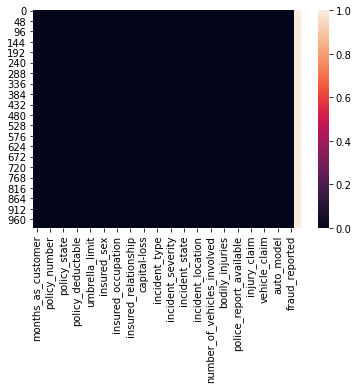

In [12]:
sn.heatmap(df.isnull())

In [13]:
# percentage of data missing from each column of the dataframe
df.isnull().mean()

months_as_customer             0.0
age                            0.0
policy_number                  0.0
policy_bind_date               0.0
policy_state                   0.0
policy_csl                     0.0
policy_deductable              0.0
policy_annual_premium          0.0
umbrella_limit                 0.0
insured_zip                    0.0
insured_sex                    0.0
insured_education_level        0.0
insured_occupation             0.0
insured_hobbies                0.0
insured_relationship           0.0
capital-gains                  0.0
capital-loss                   0.0
incident_date                  0.0
incident_type                  0.0
collision_type                 0.0
incident_severity              0.0
authorities_contacted          0.0
incident_state                 0.0
incident_city                  0.0
incident_location              0.0
incident_hour_of_the_day       0.0
number_of_vehicles_involved    0.0
property_damage                0.0
bodily_injuries     

In [14]:
df.describe().T

count          mean           std         min  \
months_as_customer           1000.0  2.039540e+02  1.151132e+02        0.00   
age                          1000.0  3.894800e+01  9.140287e+00       19.00   
policy_number                1000.0  5.462386e+05  2.570630e+05   100804.00   
policy_deductable            1000.0  1.136000e+03  6.118647e+02      500.00   
policy_annual_premium        1000.0  1.256406e+03  2.441674e+02      433.33   
umbrella_limit               1000.0  1.101000e+06  2.297407e+06 -1000000.00   
insured_zip                  1000.0  5.012145e+05  7.170161e+04   430104.00   
capital-gains                1000.0  2.512610e+04  2.787219e+04        0.00   
capital-loss                 1000.0 -2.679370e+04  2.810410e+04  -111100.00   
incident_hour_of_the_day     1000.0  1.164400e+01  6.951373e+00        0.00   
number_of_vehicles_involved  1000.0  1.839000e+00  1.018880e+00        1.00   
bodily_injuries              1000.0  9.920000e-01  8.201272e-01        0.00   
witnesses                    1000.0  1.487000e+00  1.111335e+00        0.00   
total_claim_amount           1000.0  5.276194e+04  2.640153e+04      100.00   
injury_claim                 1000.0  7.433420e+03  4.880952e+03        0.00   
property_claim               1000.0  7.399570e+03  4.824726e+03        0.00   
vehicle_claim                1000.0  3.792895e+04  1.888625e+04       70.00   
auto_year                    1000.0  2.005103e+03  6.015861e+00     1995.00   
_c39                            0.0           NaN           NaN         NaN   

                                     25%       50%         75%          max  
months_as_customer              115.7500     199.5     276.250       479.00  
age                              32.0000      38.0      44.000        64.00  
policy_number                335980.2500  533135.0  759099.750    999435.00  
policy_deductable               500.0000    1000.0    2000.000      2000.00  
policy_annual_premium          1089.6075    1257.2    1415.695      2047.59  
umbrella_limit                    0.0000       0.0       0.000  10000000.00  
insured_zip                  448404.5000  466445.5  603251.000    620962.00  
capital-gains                     0.0000       0.0   51025.000    100500.00  
capital-loss                 -51500.0000  -23250.0       0.000         0.00  
incident_hour_of_the_day          6.0000      12.0      17.000        23.00  
number_of_vehicles_involved       1.0000       1.0       3.000         4.00  
bodily_injuries                   0.0000       1.0       2.000         2.00  
witnesses                         1.0000       1.0       2.000         3.00  
total_claim_amount            41812.5000   58055.0   70592.500    114920.00  
injury_claim                   4295.0000    6775.0   11305.000     21450.00  
property_claim                 4445.0000    6750.0   10885.000     23670.00  
vehicle_claim                 30292.5000   42100.0   50822.500     79560.00  
auto_year                      2000.0000    2005.0    2010.000      2015.00  
_c39                                 NaN       NaN         NaN          NaN

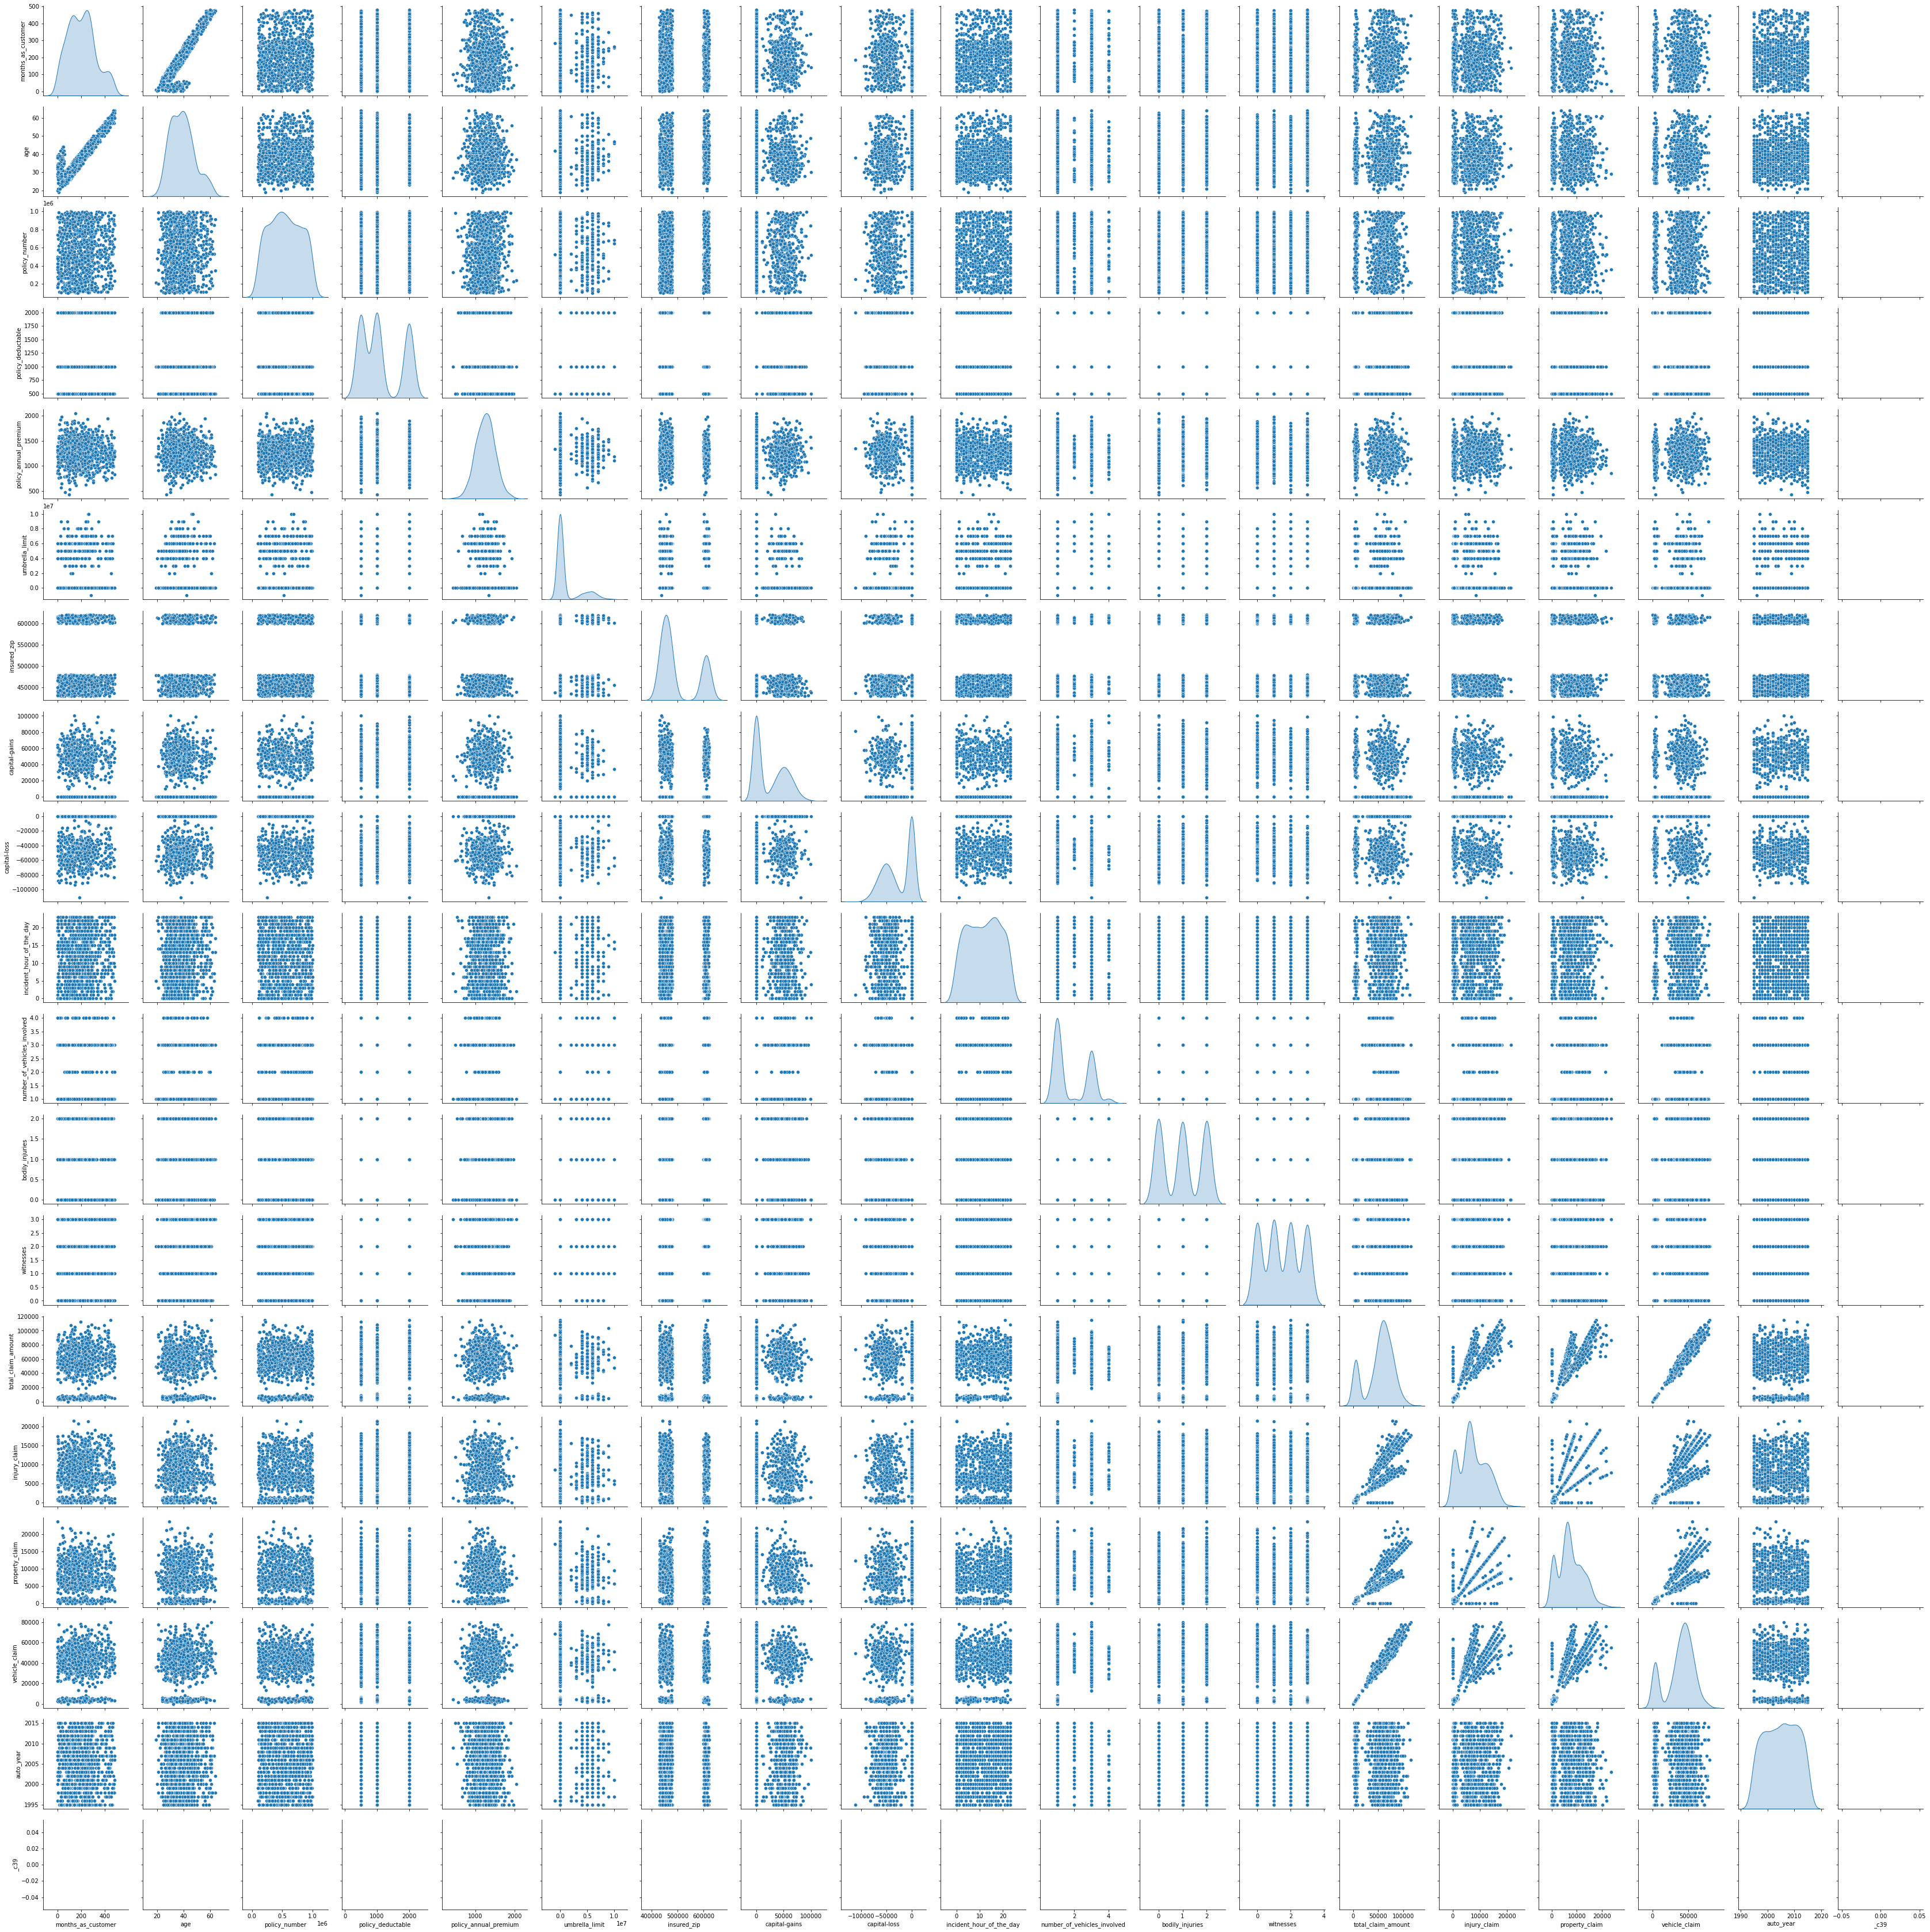

In [15]:
sn.pairplot(df,diag_kind="kde")

array([[<AxesSubplot:title={'center':'months_as_customer'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'policy_number'}>,
        <AxesSubplot:title={'center':'policy_deductable'}>],
       [<AxesSubplot:title={'center':'policy_annual_premium'}>,
        <AxesSubplot:title={'center':'umbrella_limit'}>,
        <AxesSubplot:title={'center':'insured_zip'}>,
        <AxesSubplot:title={'center':'capital-gains'}>],
       [<AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'incident_hour_of_the_day'}>,
        <AxesSubplot:title={'center':'number_of_vehicles_involved'}>,
        <AxesSubplot:title={'center':'bodily_injuries'}>],
       [<AxesSubplot:title={'center':'witnesses'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:title={'center':'injury_claim'}>,
        <AxesSubplot:title={'center':'property_claim'}>],
       [<AxesSubplot:title={'center':'vehicle_claim'}>,
        <Ax

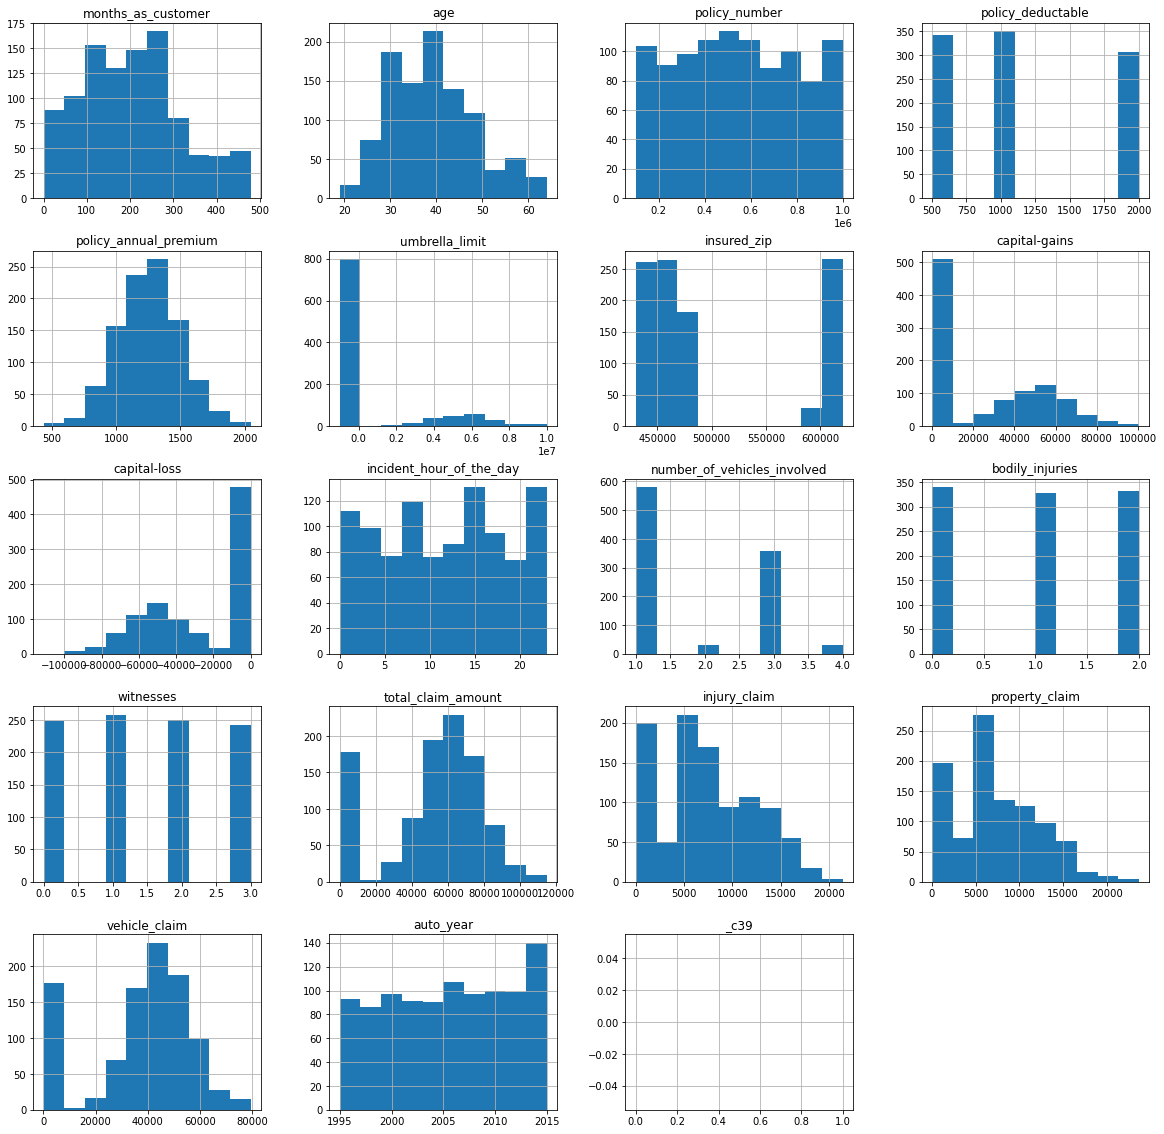

In [16]:
df.hist(figsize=(20,20))

In [17]:
# lot of missing values are there in _c39 so better to delete it
df.drop('_c39',axis=1,inplace=True)

# These columns which doesnt make any impact on our model building
df.drop(['policy_number','incident_location'],axis=1,inplace=True)

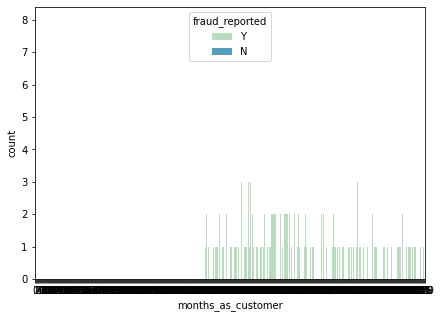

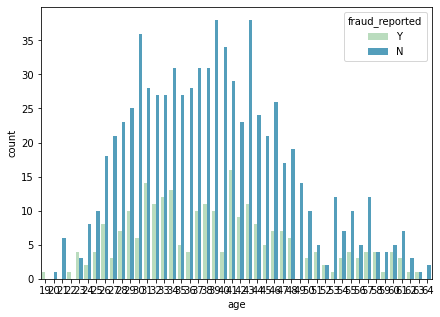

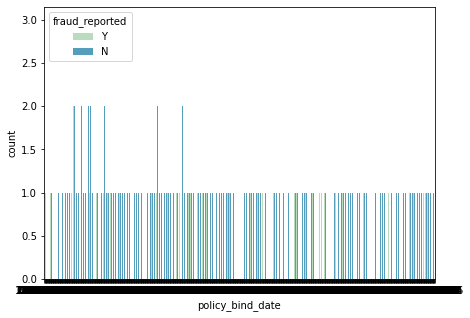

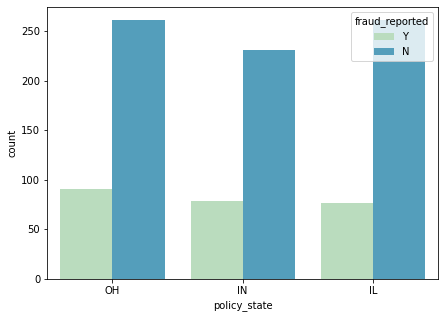

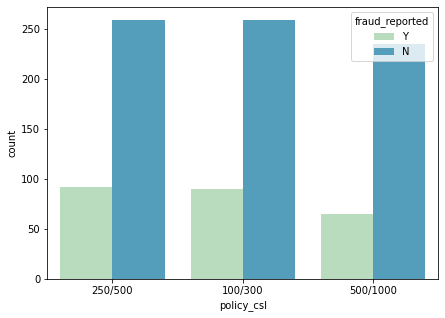

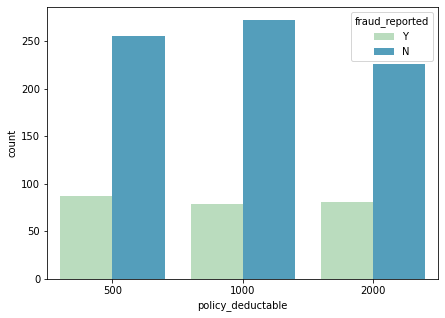

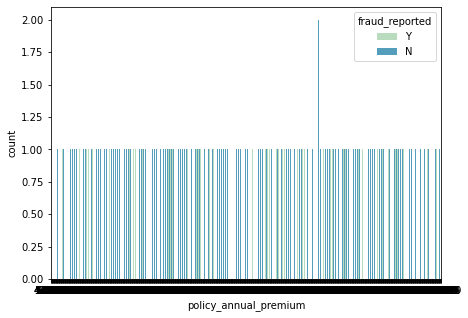

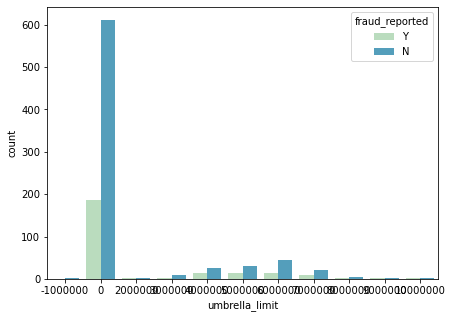

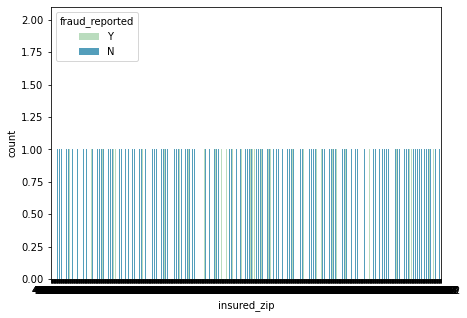

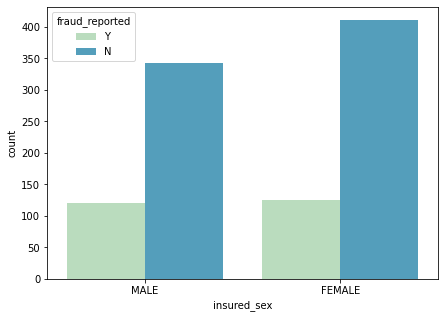

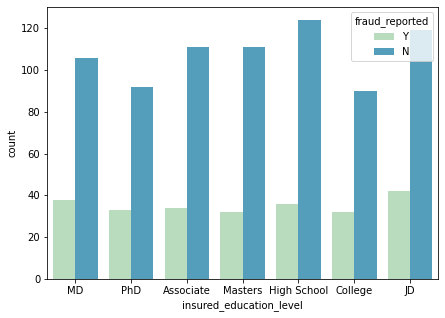

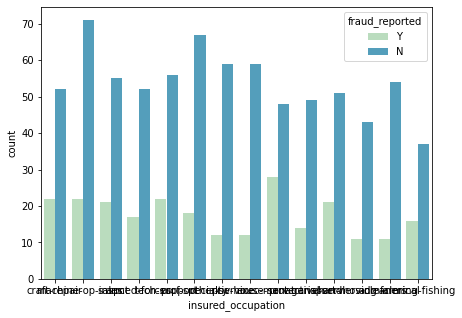

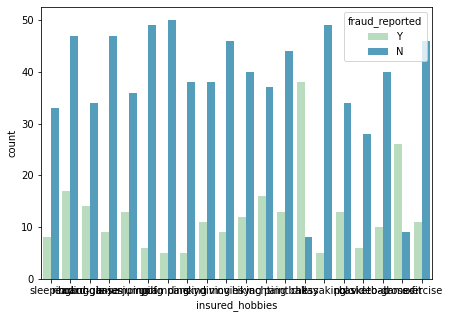

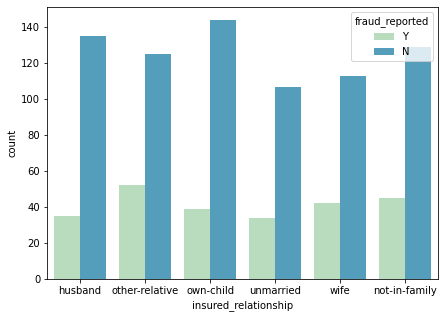

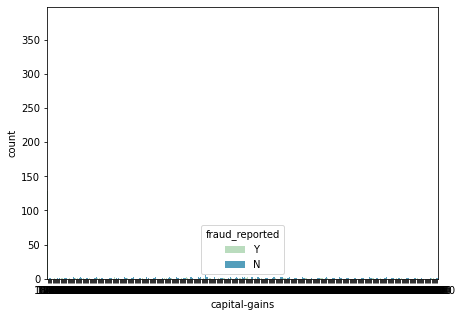

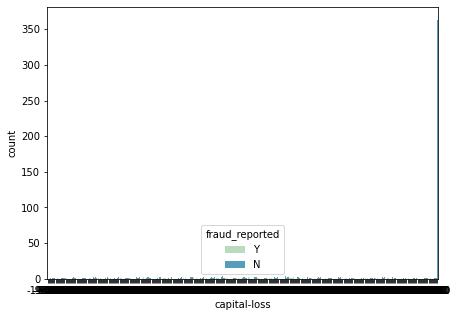

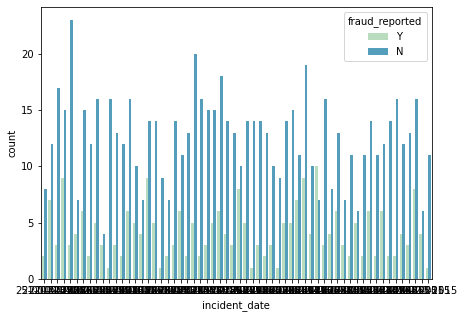

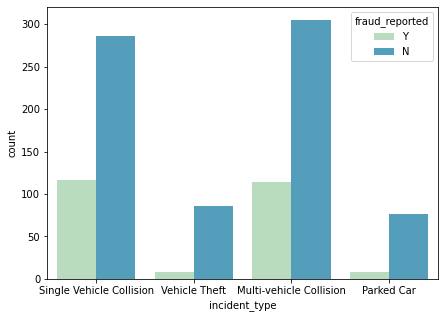

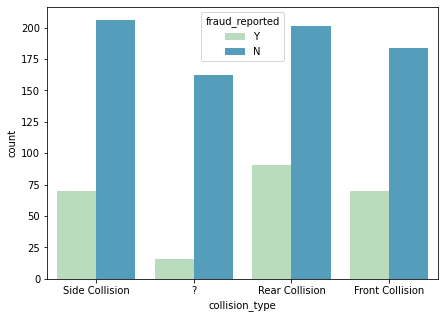

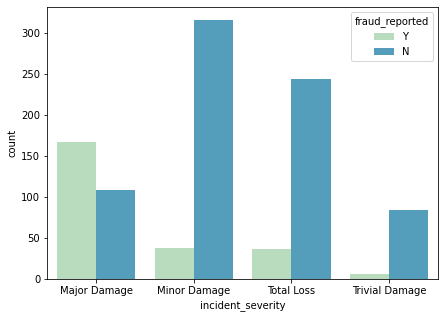

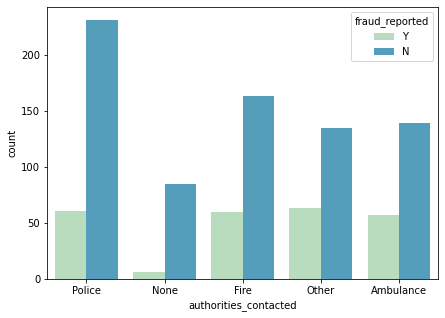

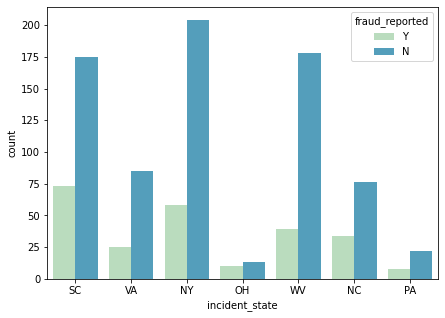

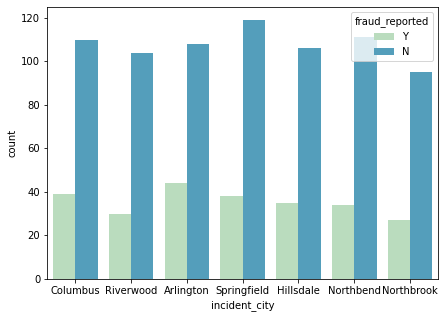

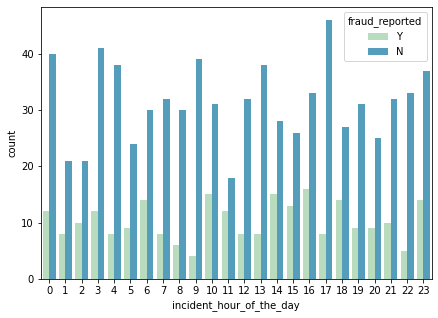

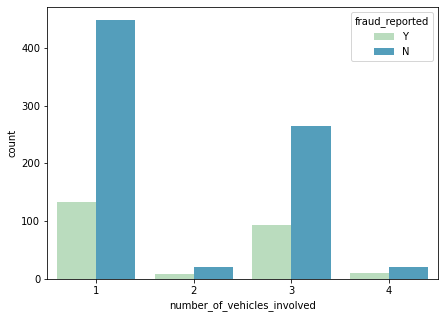

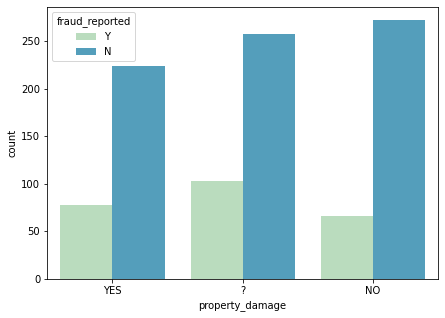

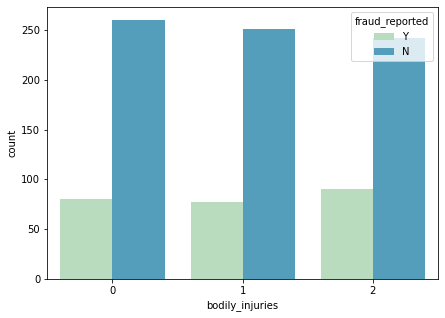

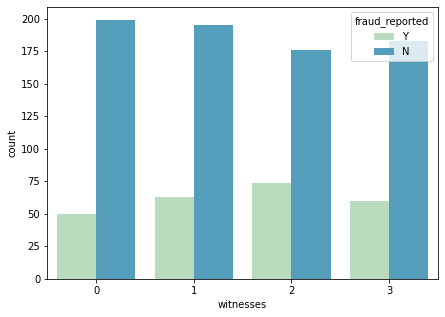

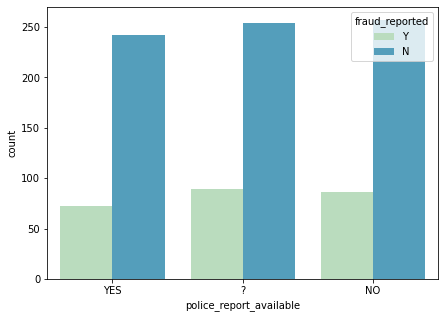

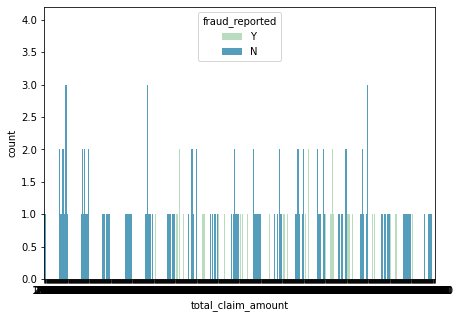

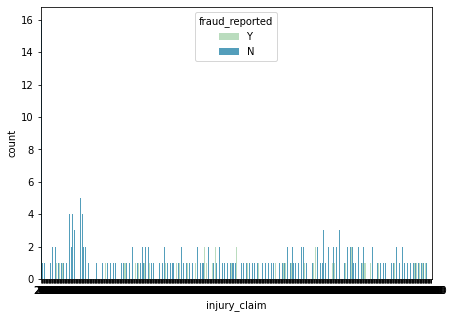

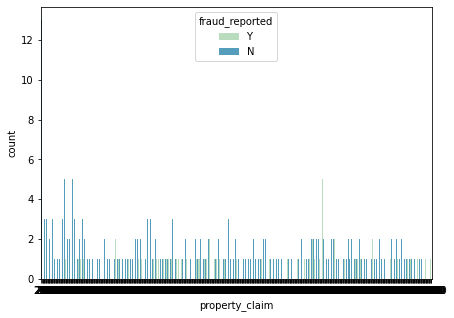

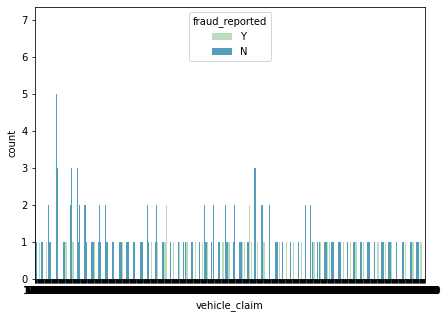

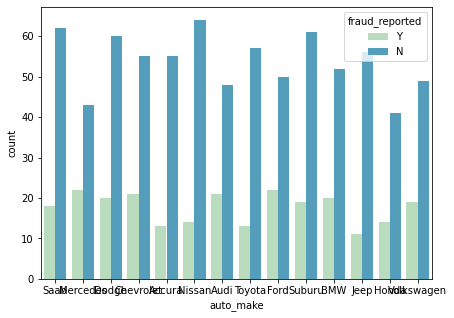

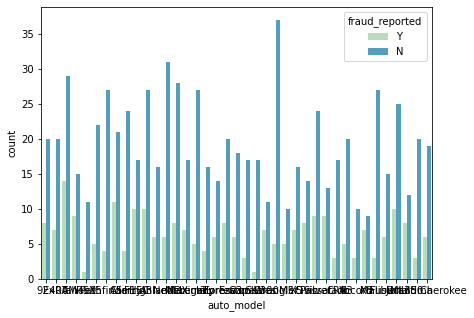

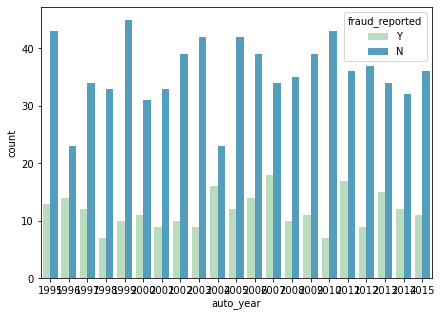

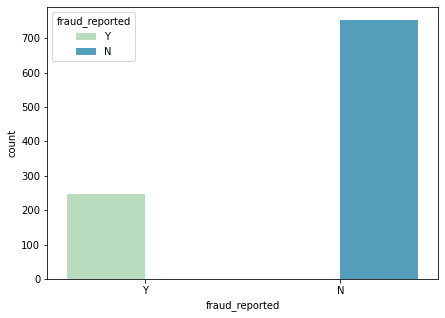

In [18]:
# plotting countplot

for i in df:
    plt.figure(figsize=(7,5))
    sn.countplot(df[i],hue=df['fraud_reported'],palette='GnBu')
    plt.show()

In [19]:
# replacing the character ? with mean of the feature

df['collision_type']=df['collision_type'].replace(
    to_replace='?', 
    value='Rear Collision', 
    inplace=False, 
    limit=None, 
    regex=False, method='pad')
df['property_damage']=df['property_damage'].replace(
    to_replace='?', 
    value='No', 
    inplace=False, 
    limit=None, 
    regex=False, method='pad')
df['police_report_available']=df['police_report_available'].replace(
    to_replace='?', 
    value='No', 
    inplace=False, 
    limit=None, 
    regex=False, method='pad')

In [20]:
import datetime

df['policy_year'] = pd.to_datetime(df.policy_bind_date,format='%d-%m-%Y')
df['incident_year'] = pd.to_datetime(df.incident_date, format='%d-%m-%Y')
df['policy_year'] = df['policy_year'].dt.strftime('%Y')
df['incident_year'] = df['incident_year'].dt.strftime('%Y')

In [21]:
df.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)

<AxesSubplot:xlabel='age', ylabel='months_as_customer'>

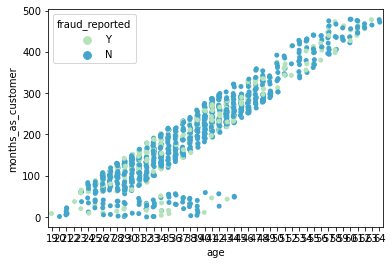

In [22]:
sn.stripplot(x='age',y='months_as_customer',data=df,jitter=True,hue='fraud_reported',palette='GnBu')

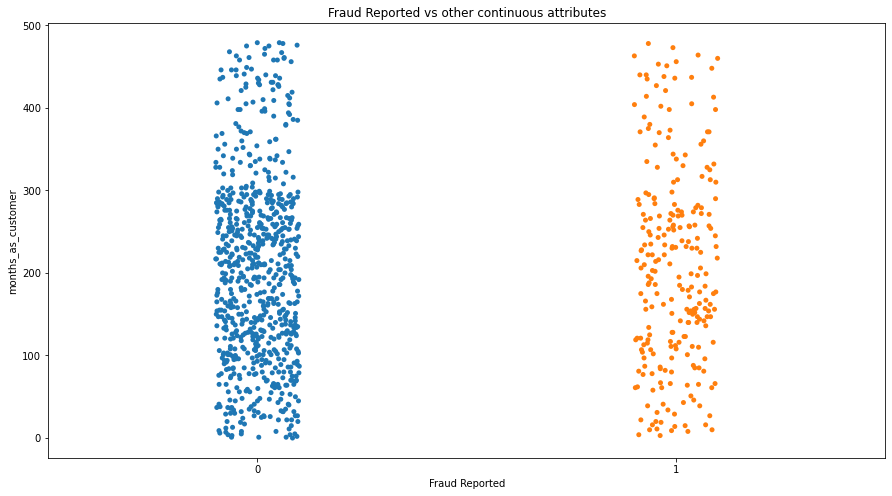

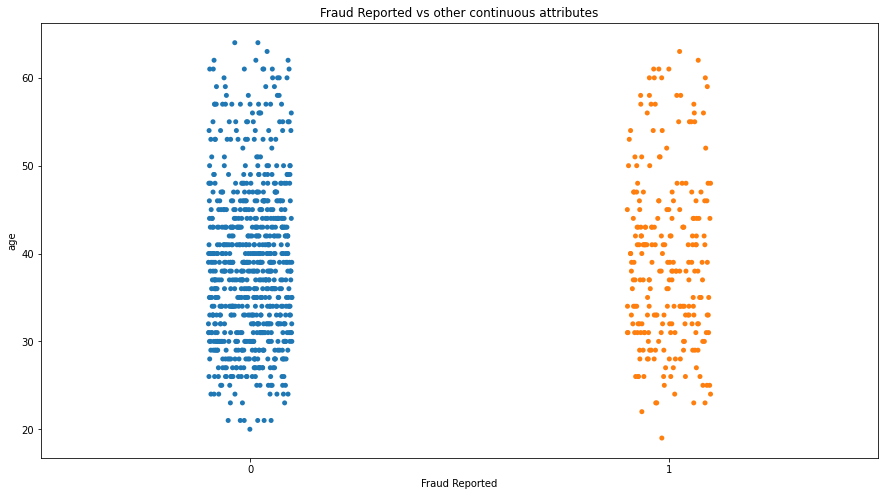

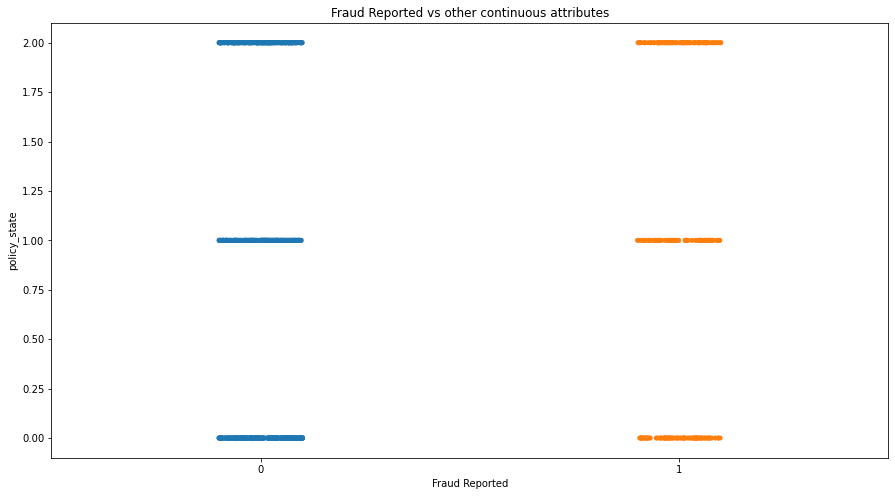

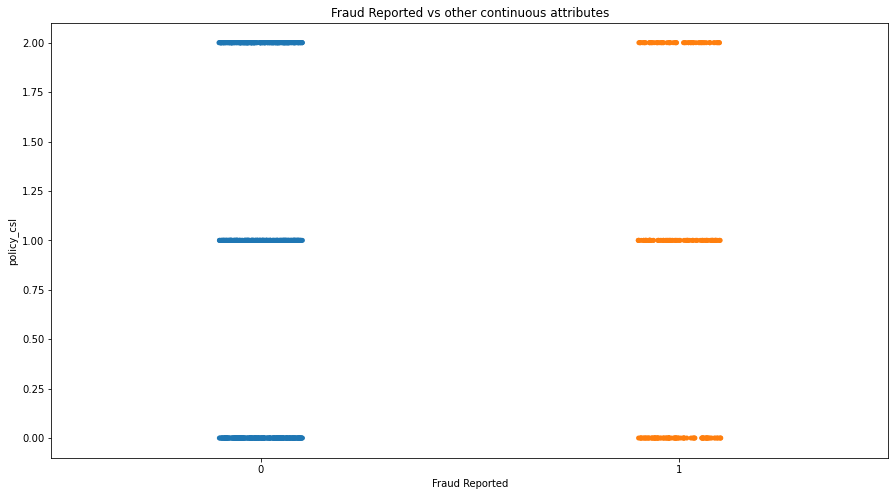

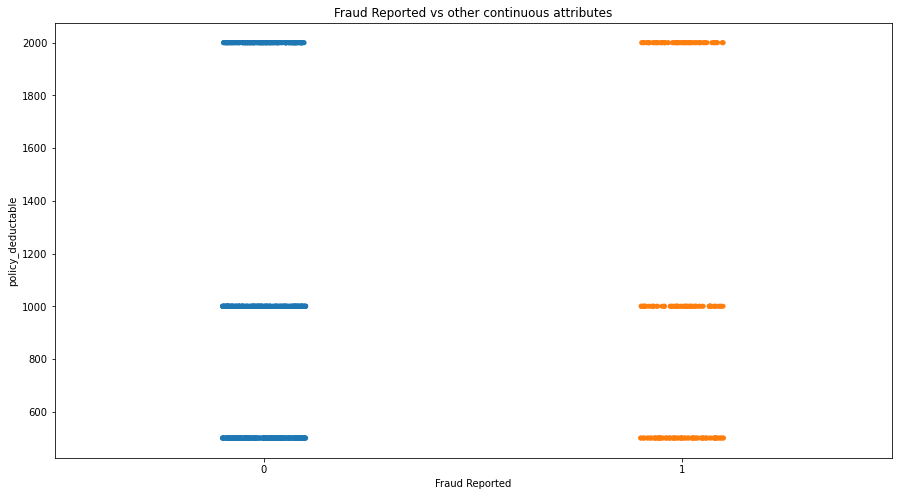

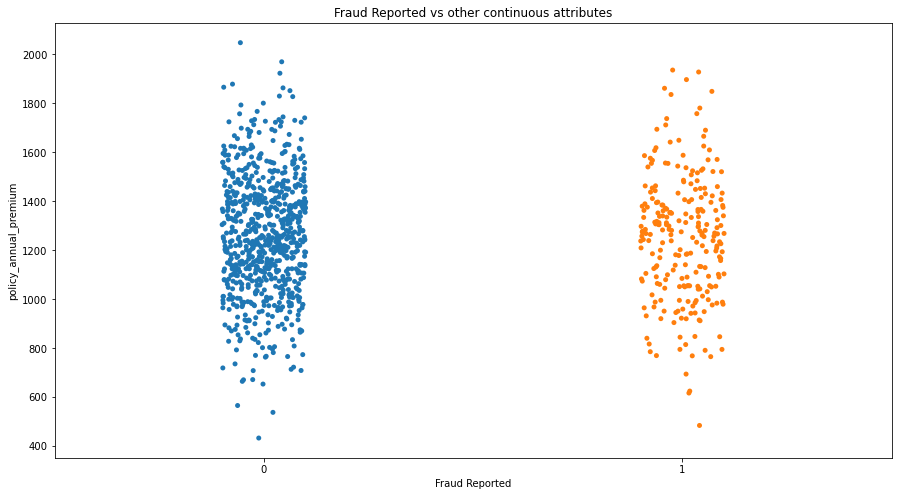

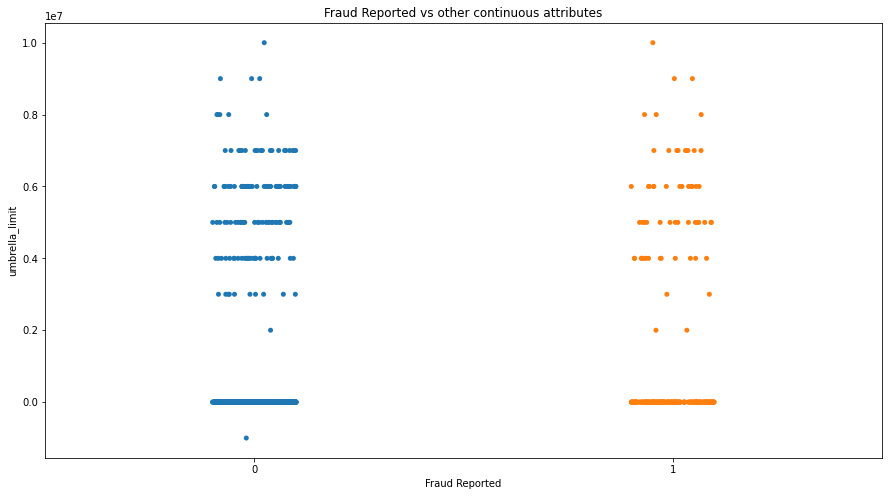

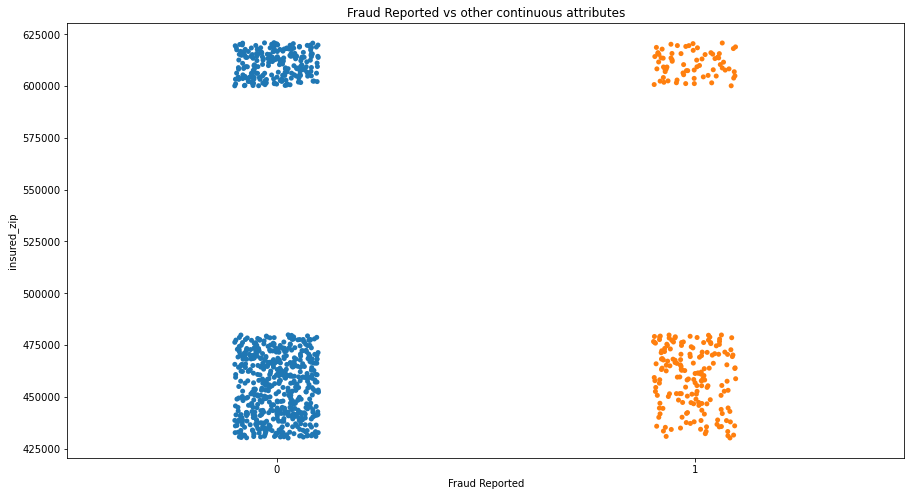

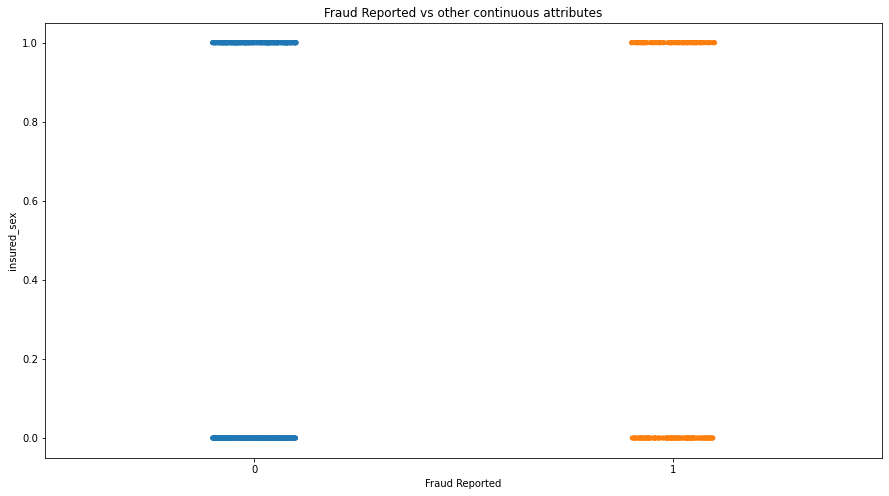

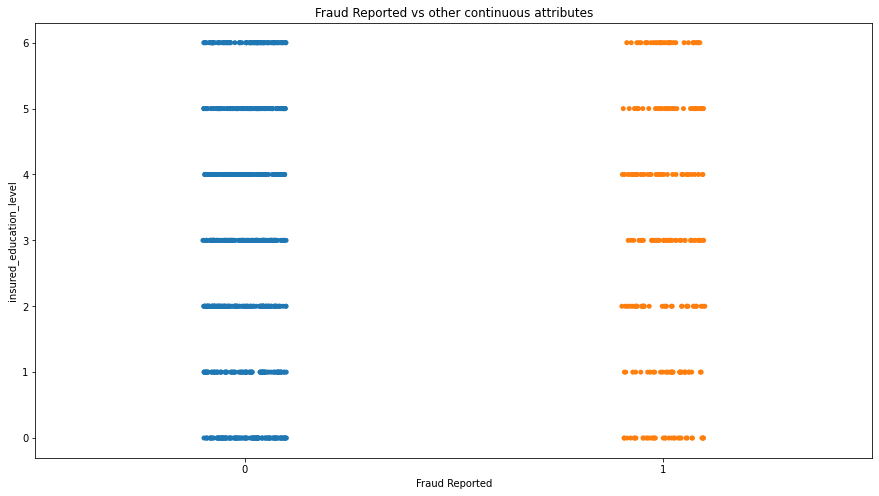

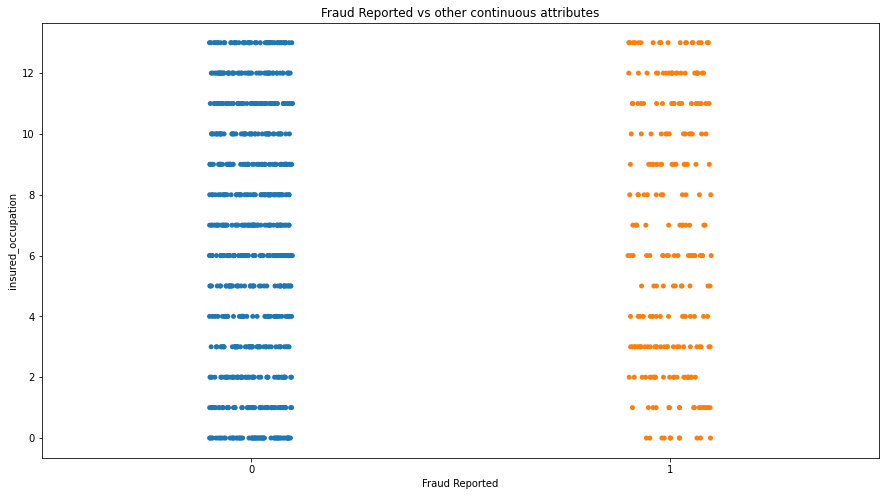

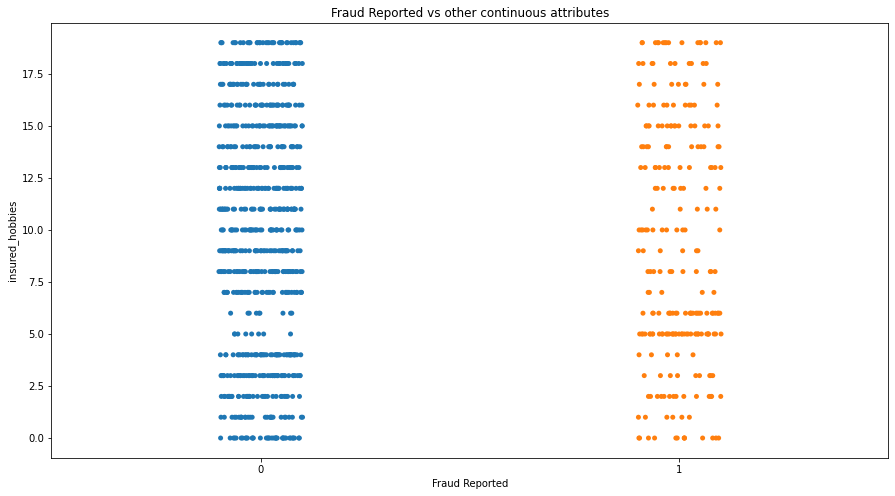

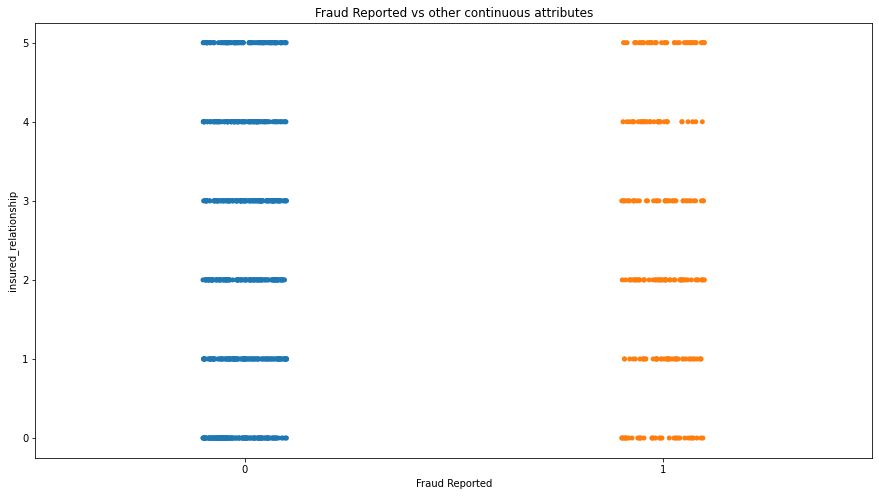

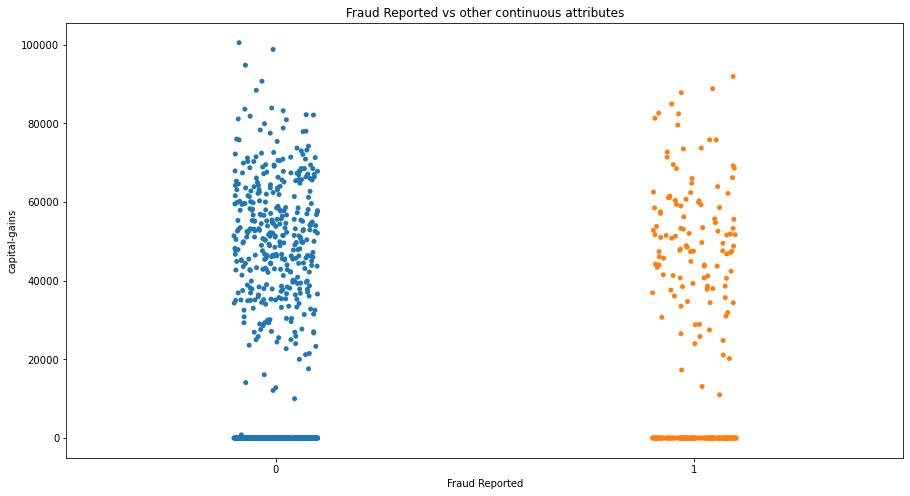

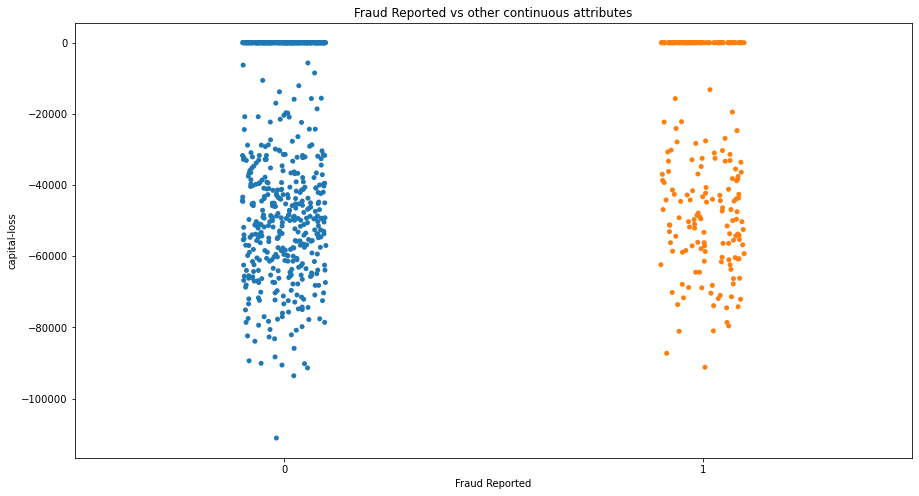

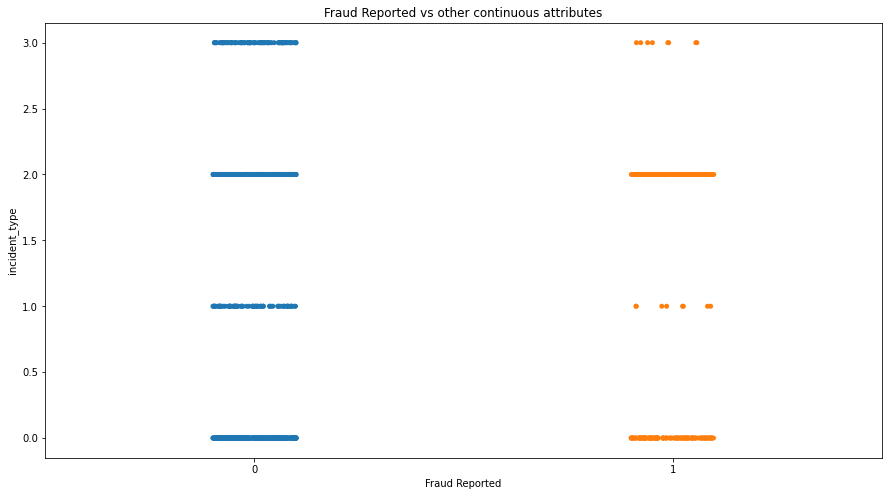

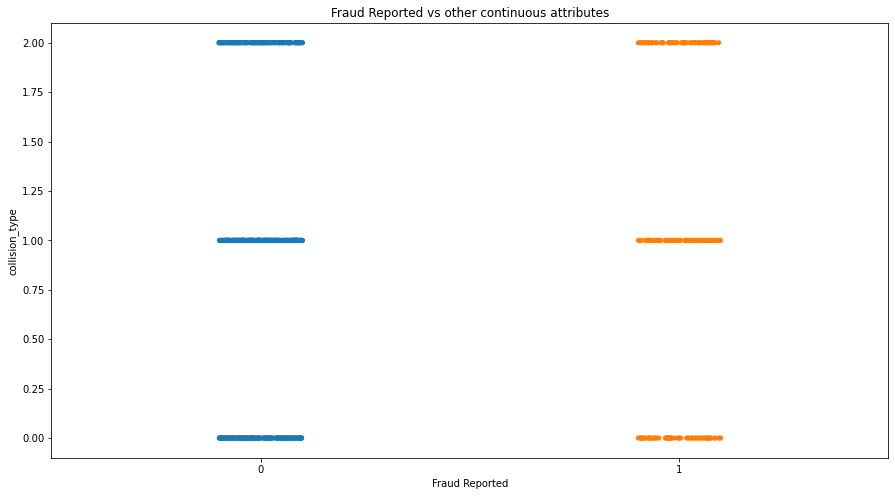

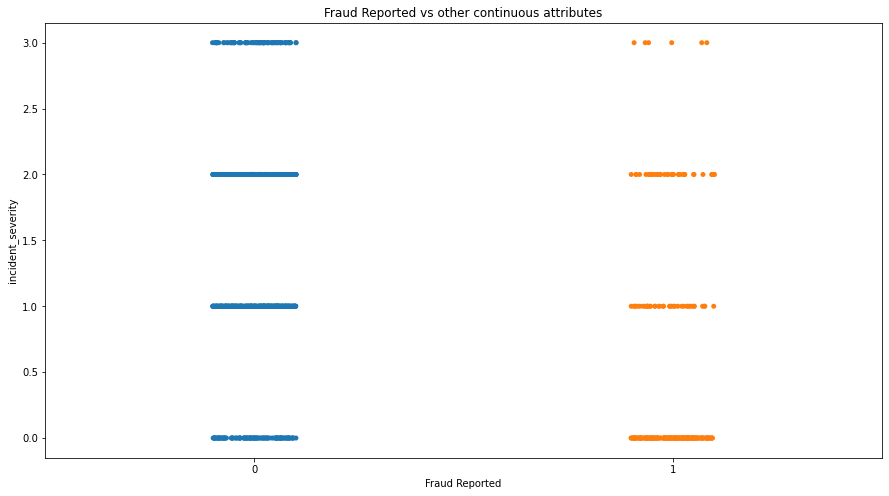

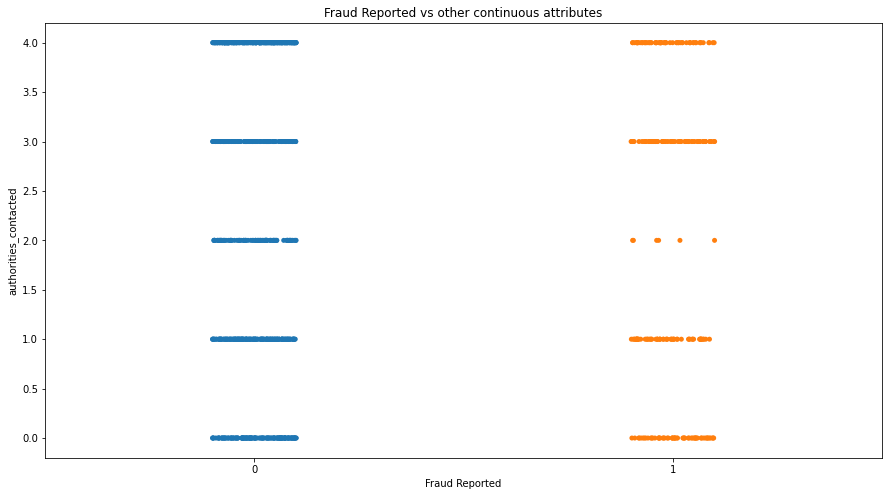

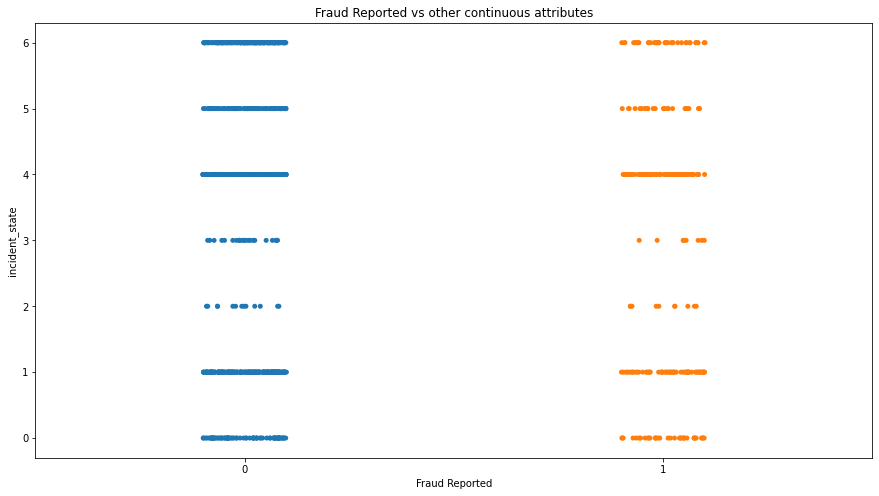

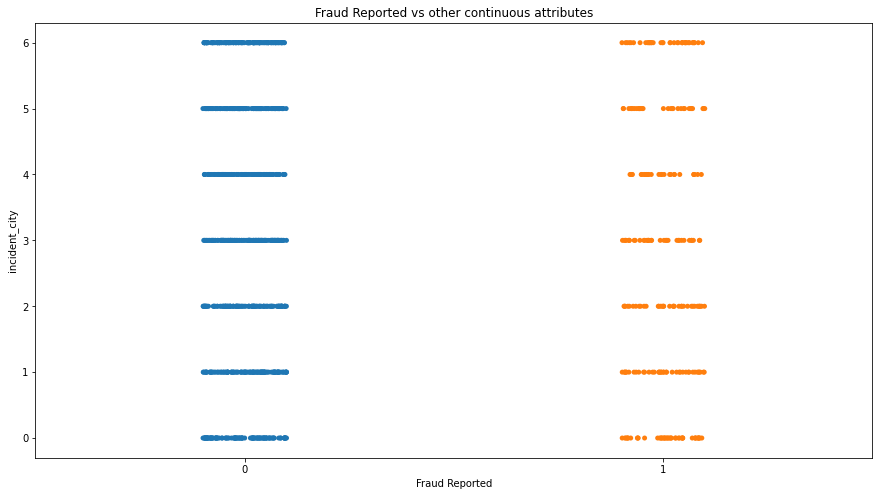

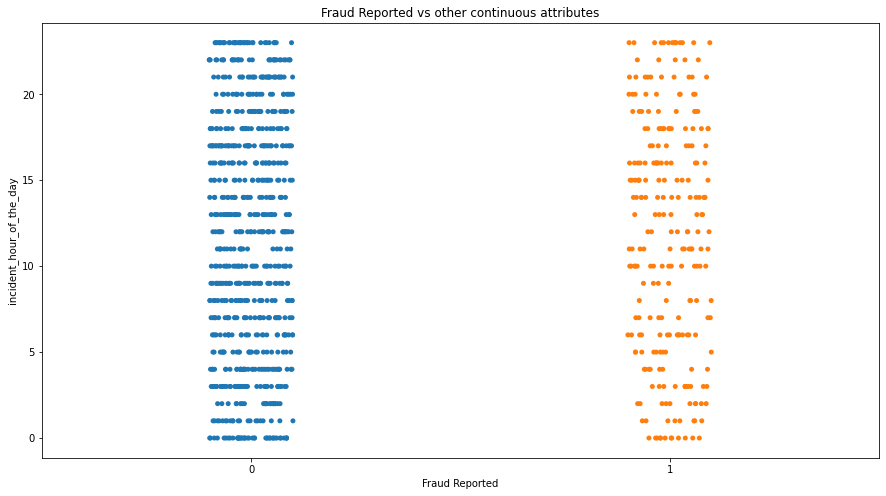

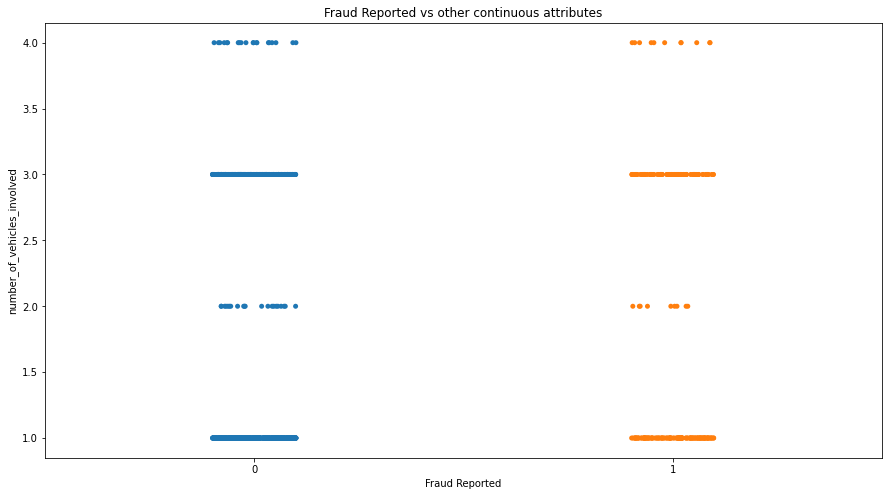

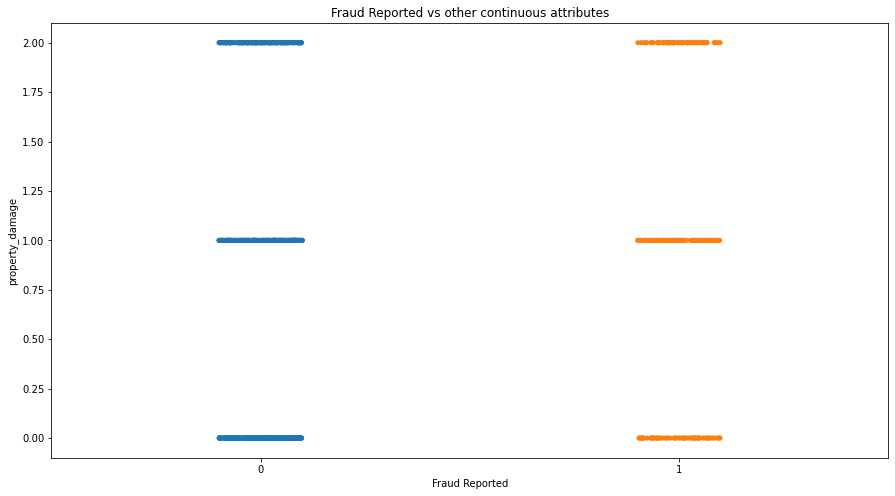

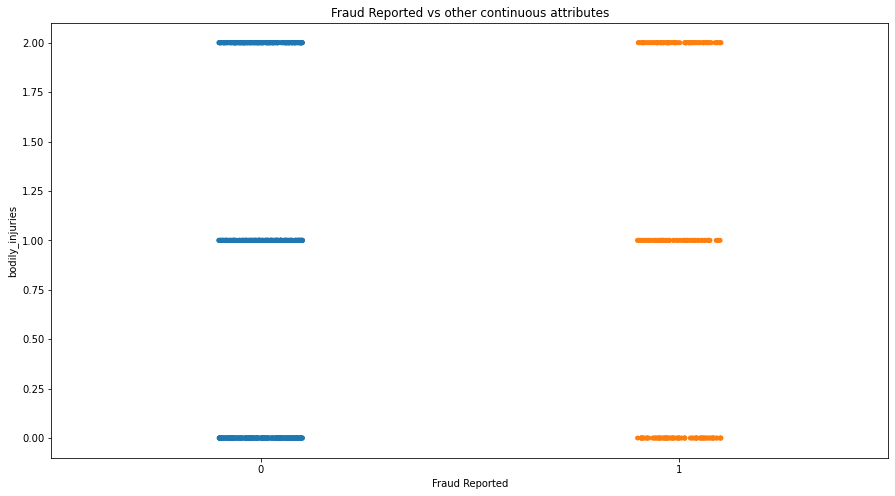

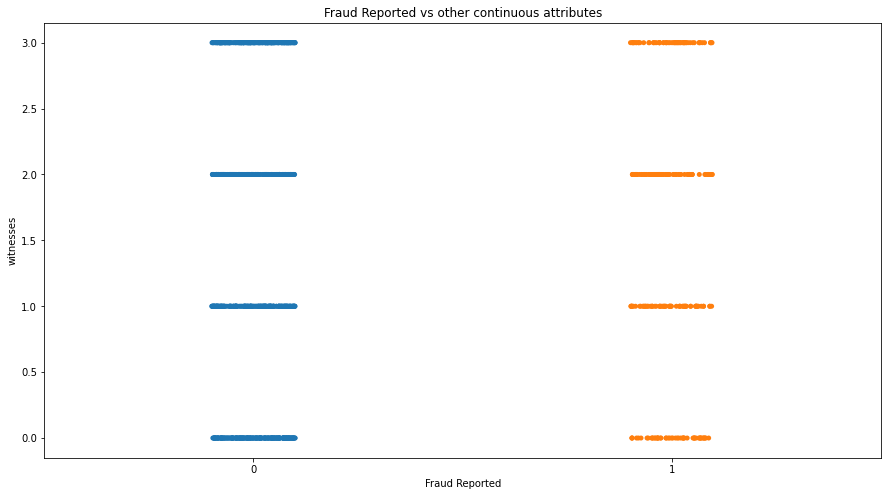

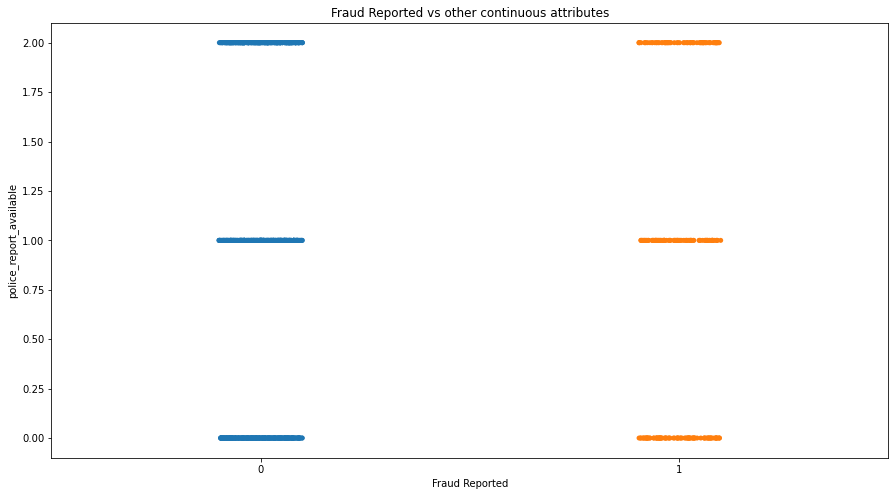

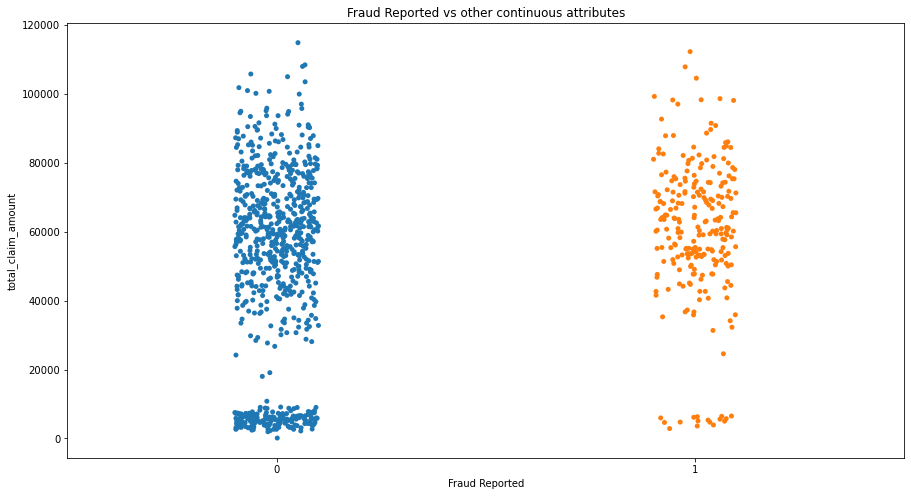

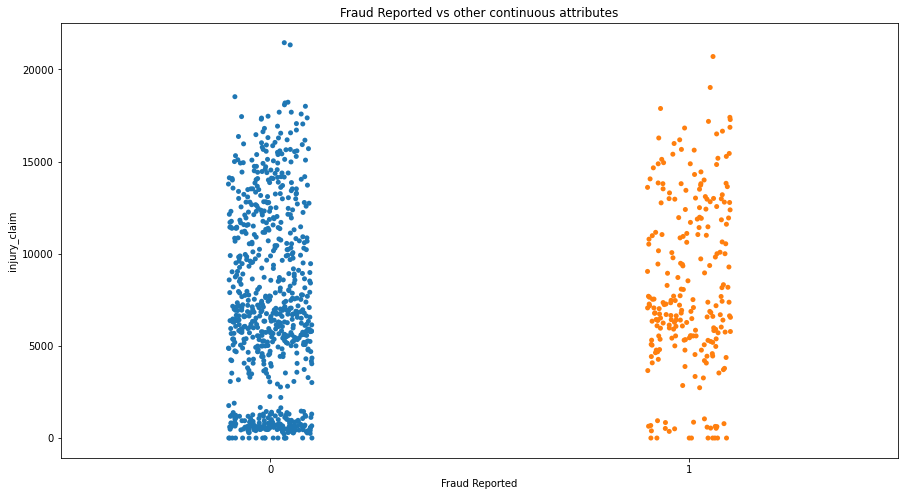

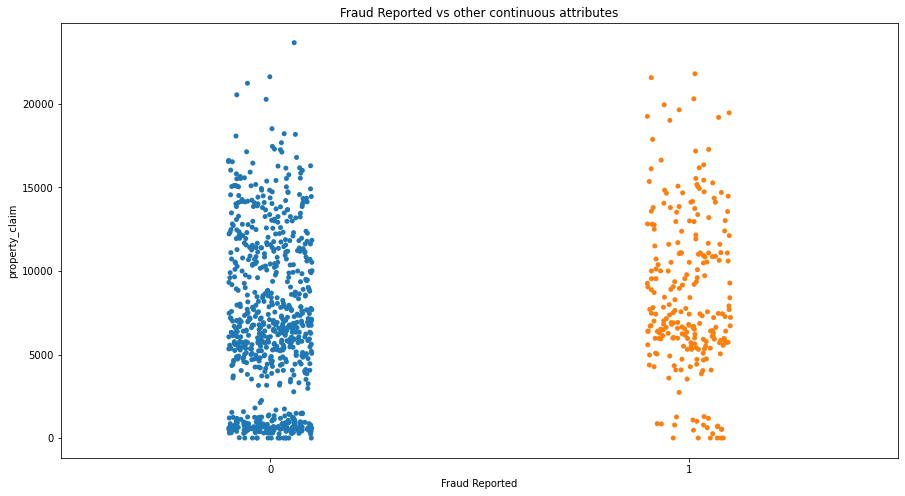

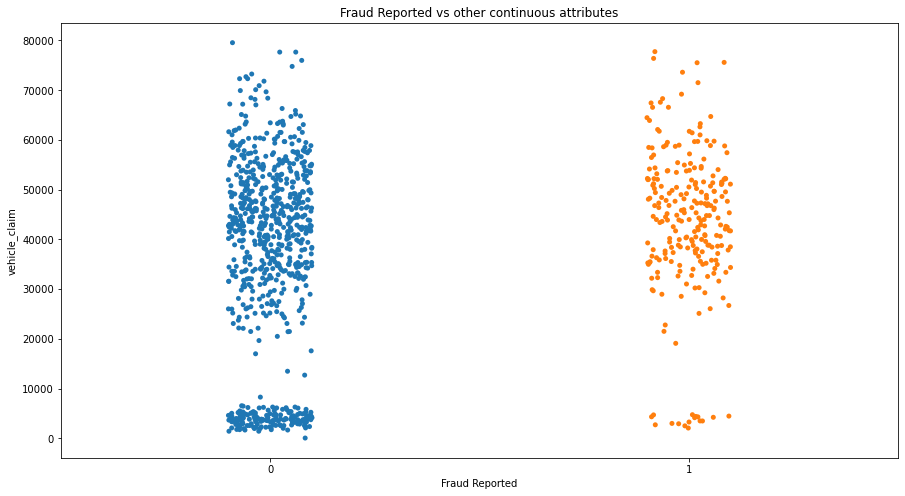

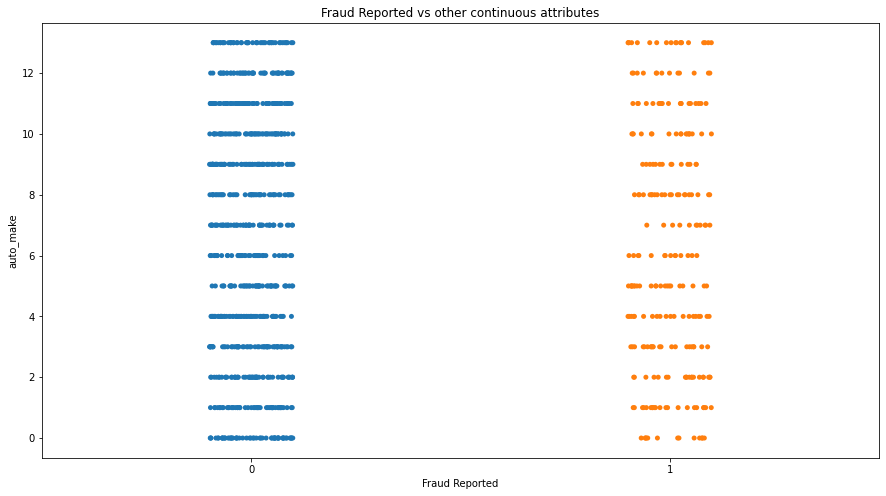

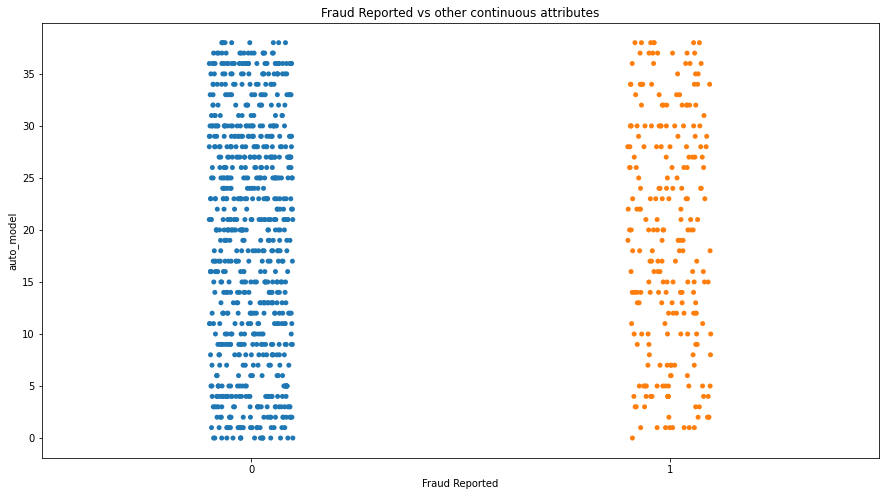

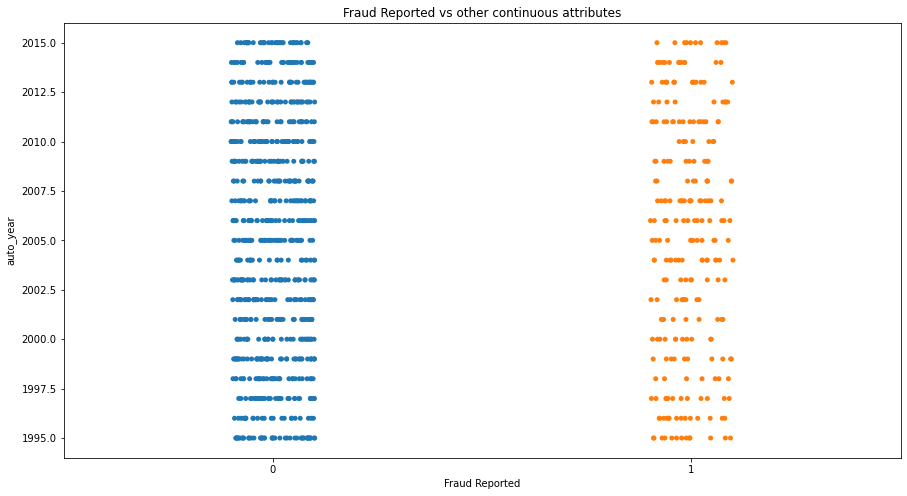

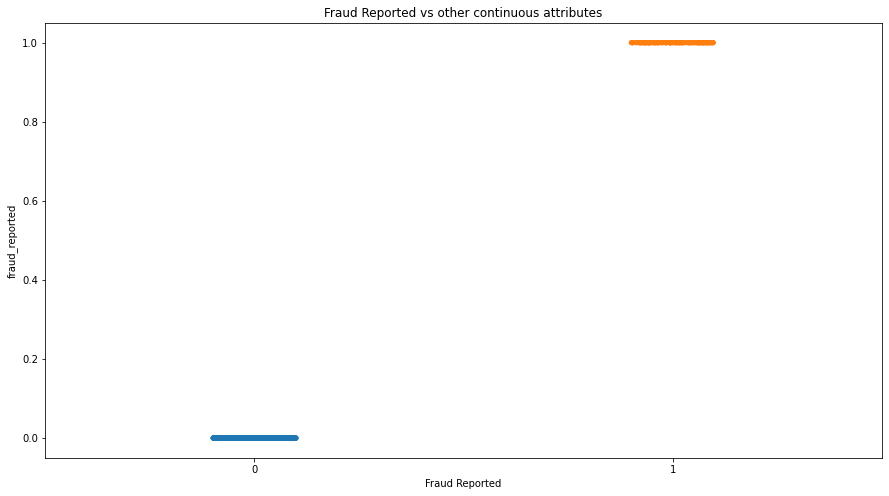

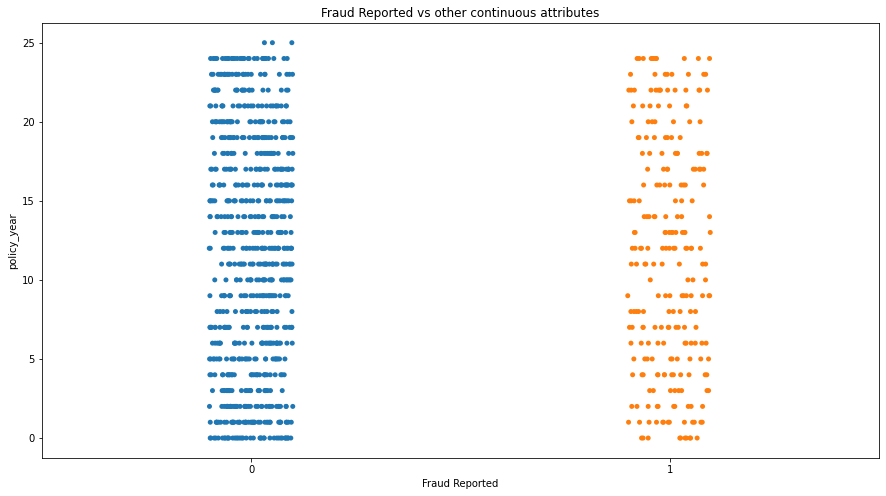

In [85]:
for i in df:                                          #bivariate analysis
    plt.figure(figsize = (15, 8))
    ax = sn.stripplot(df['fraud_reported'], df[i])
    ax.set(xlabel = 'Fraud Reported', ylabel = i)
    plt.title('Fraud Reported vs other continuous attributes')
    plt.show()

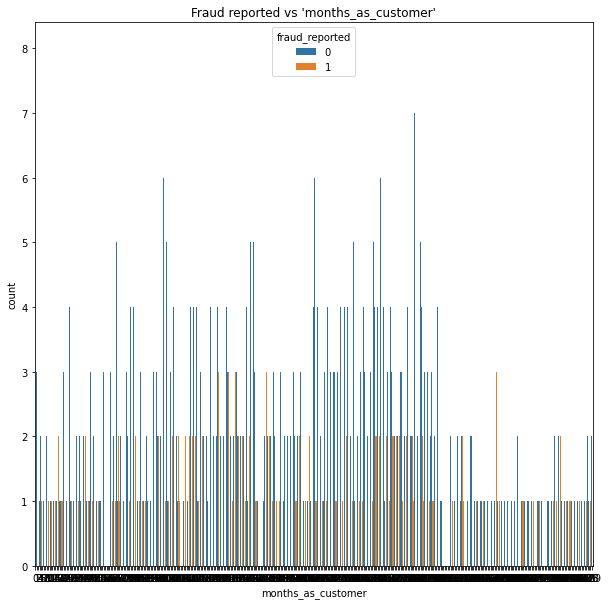

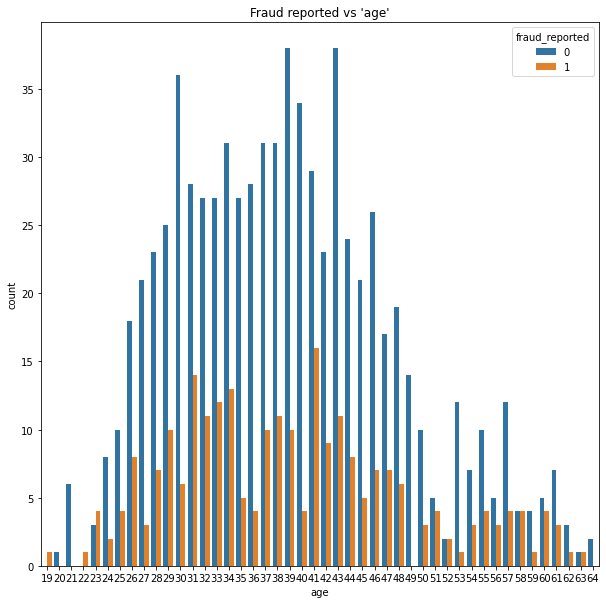

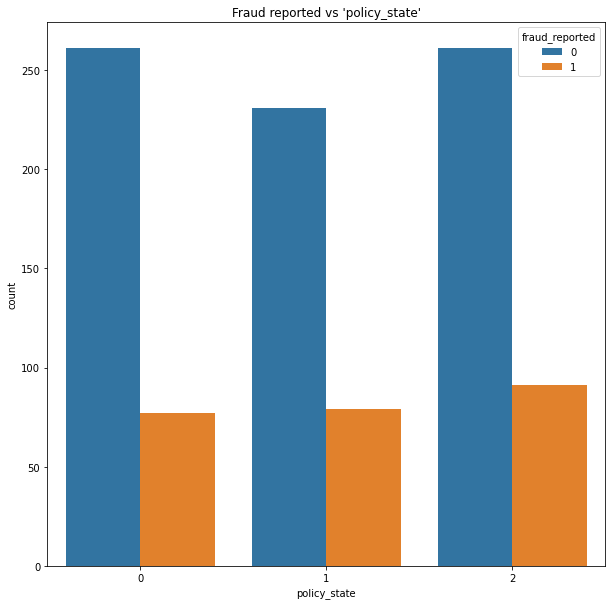

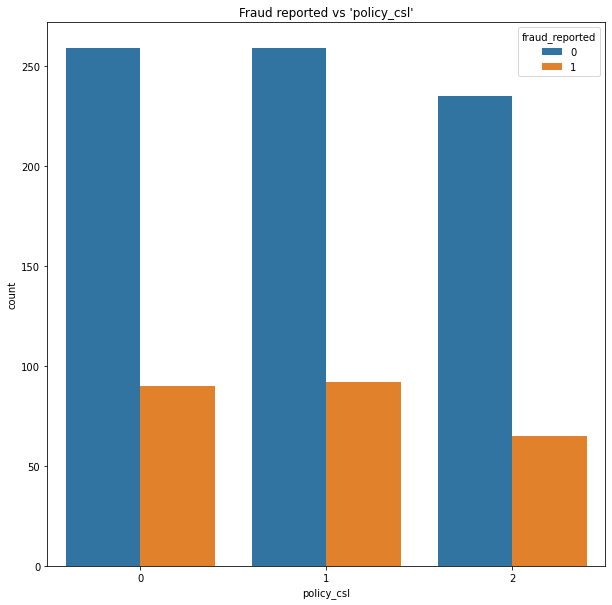

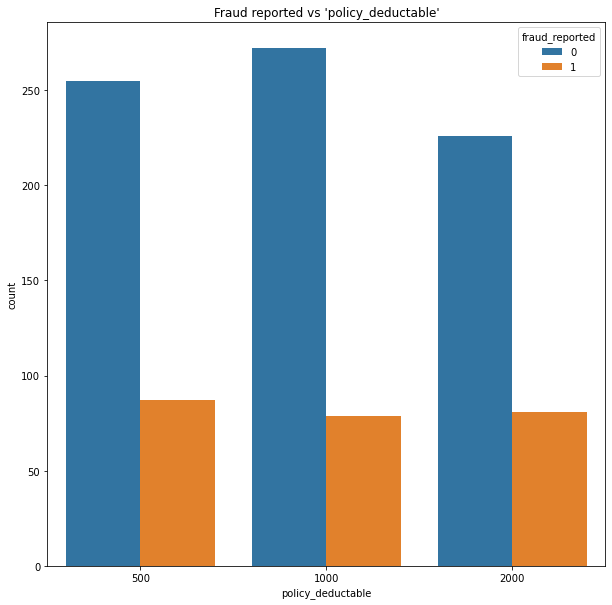

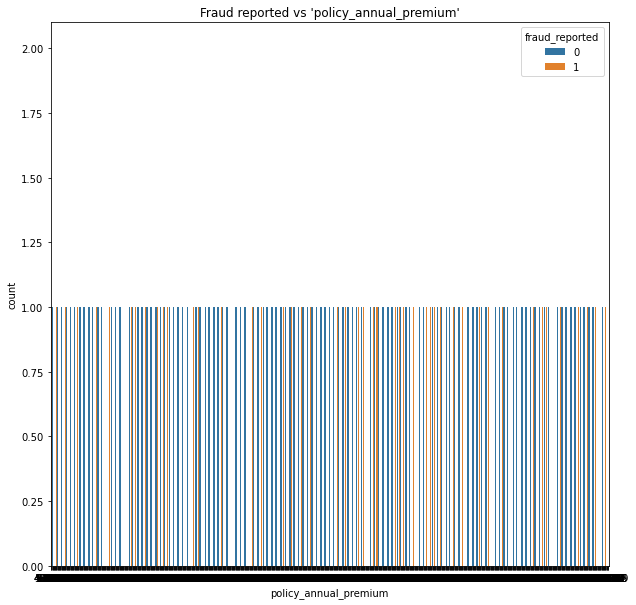

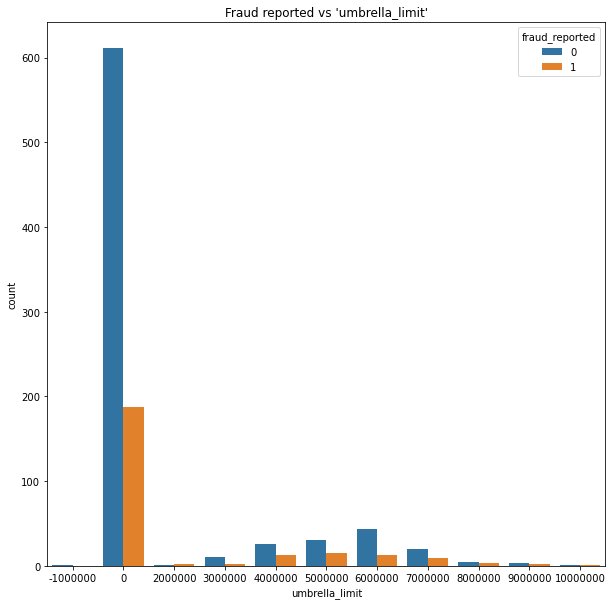

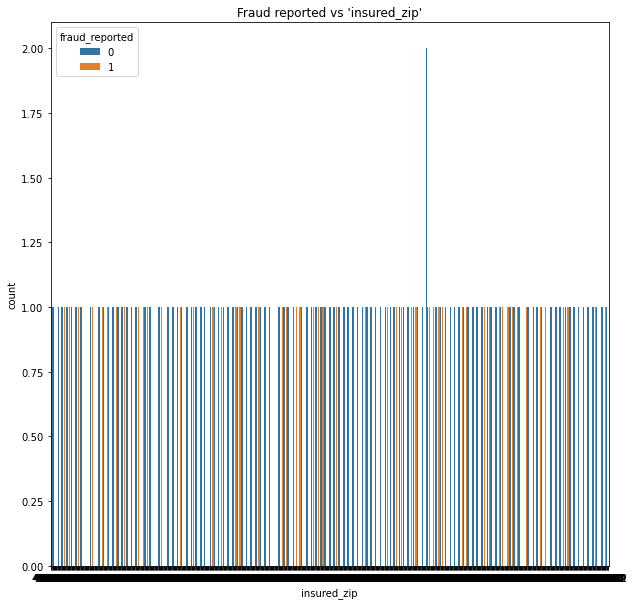

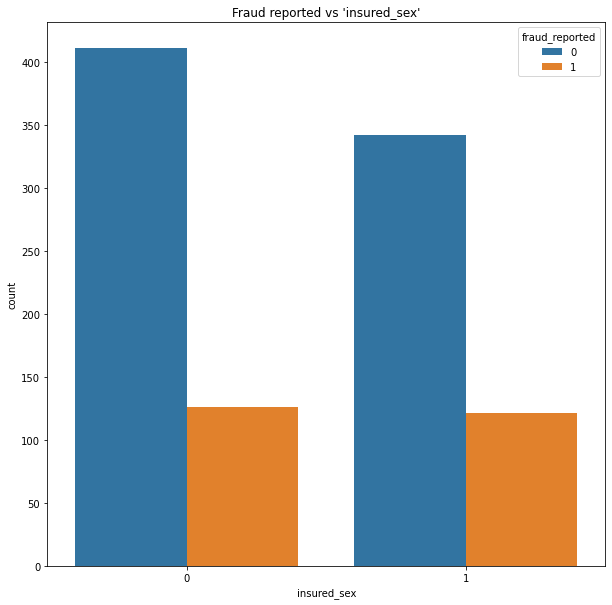

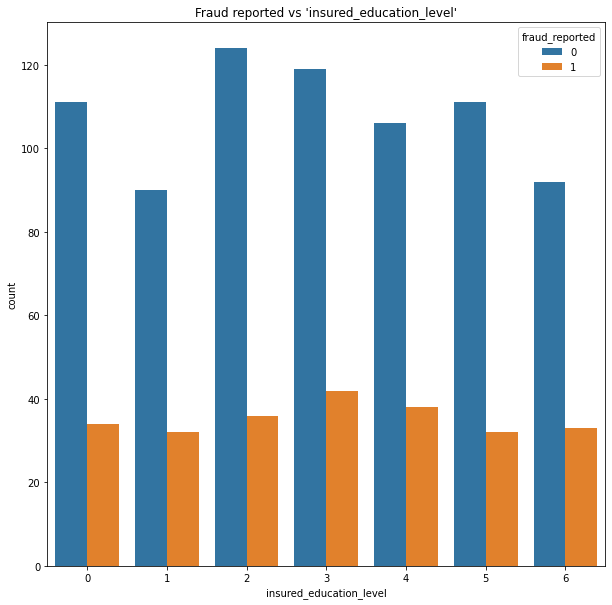

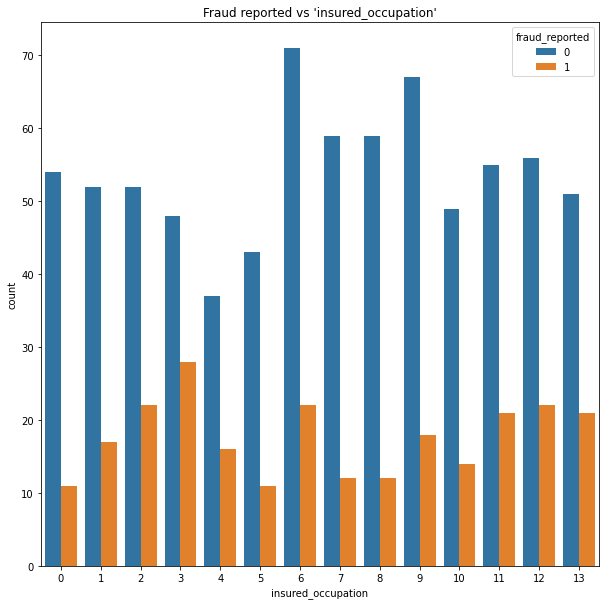

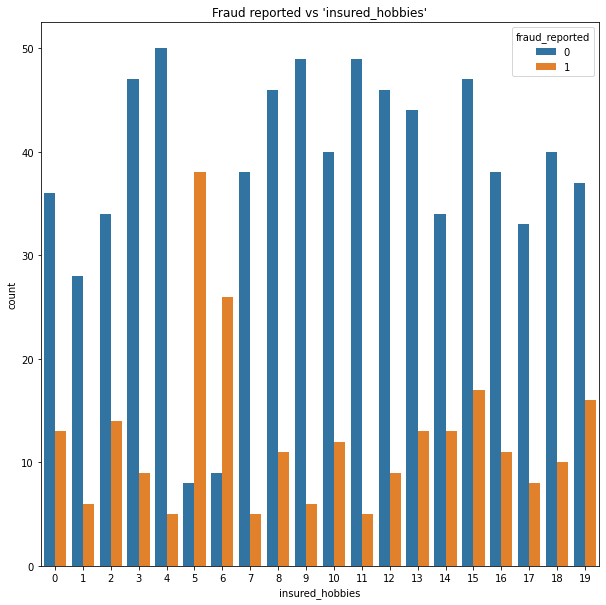

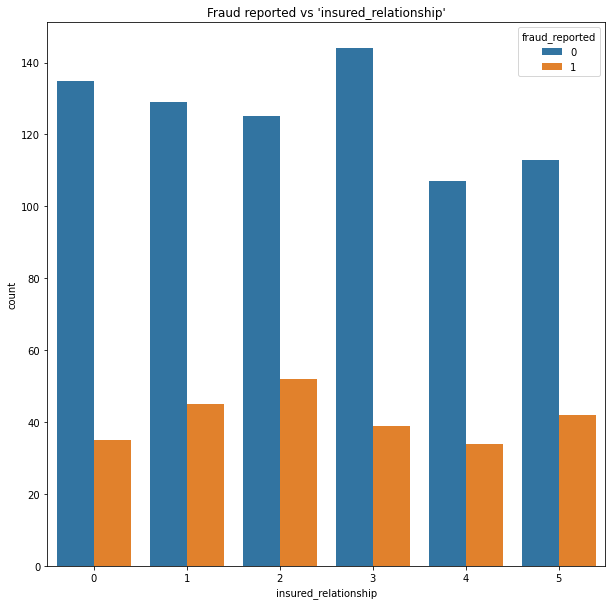

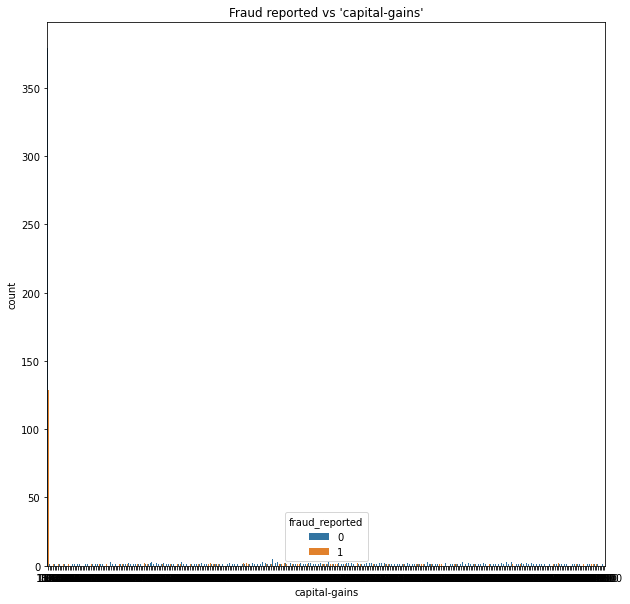

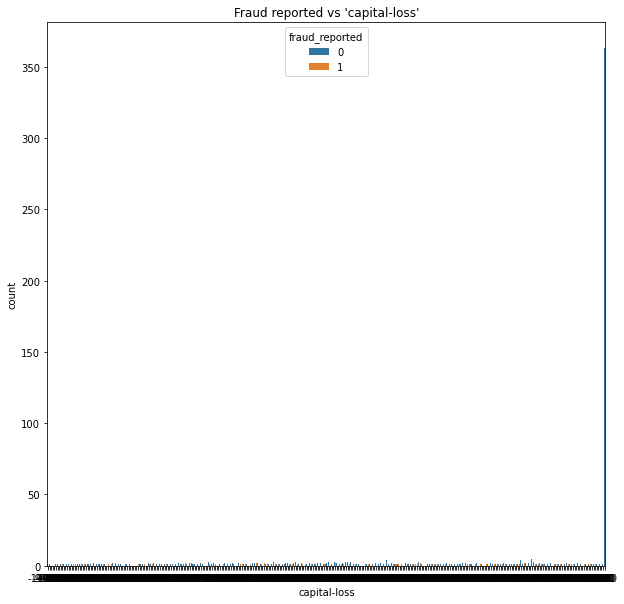

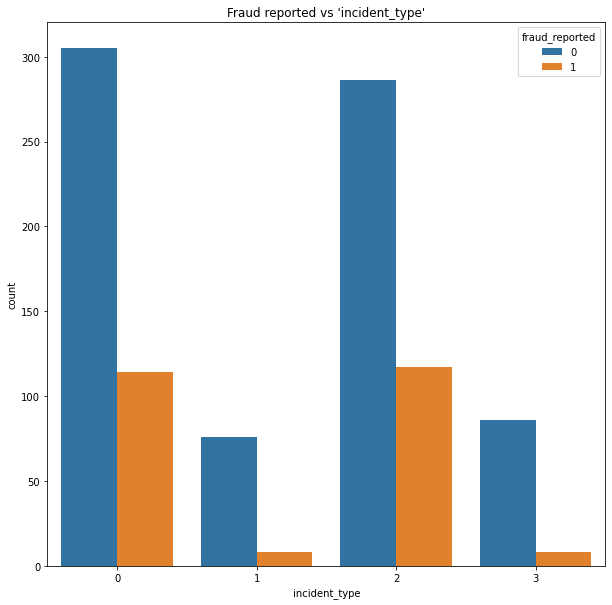

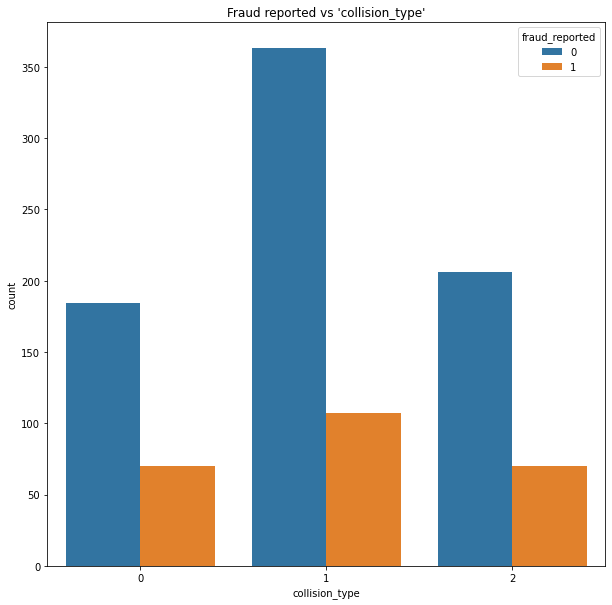

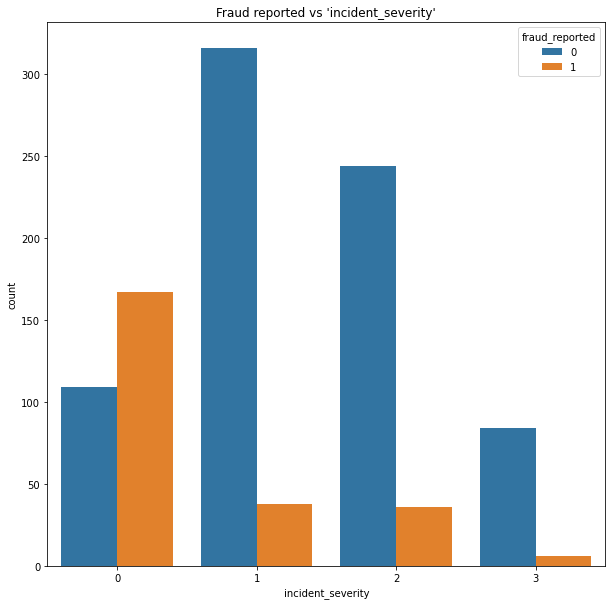

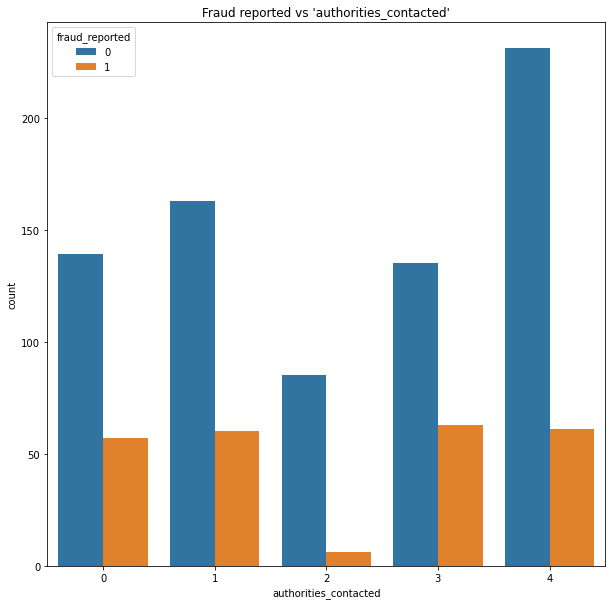

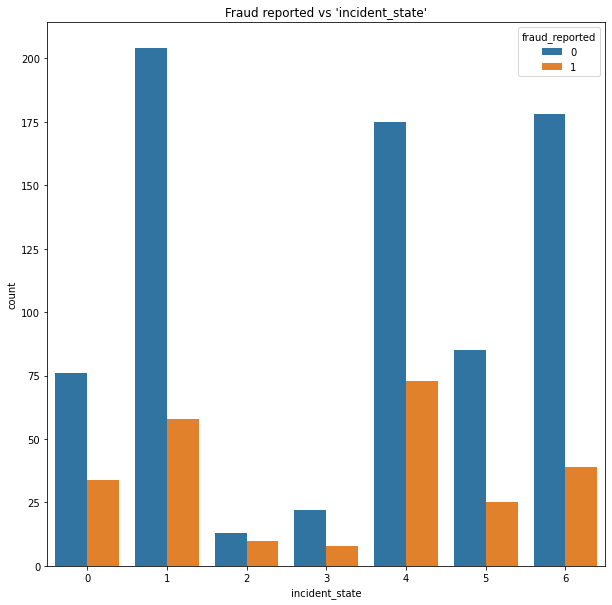

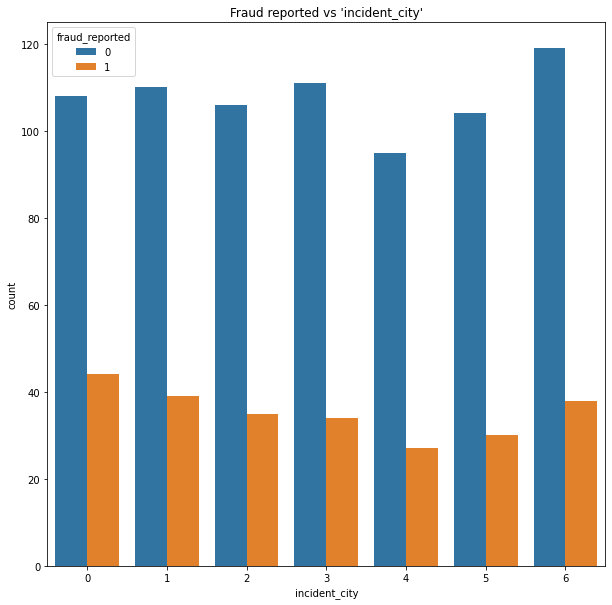

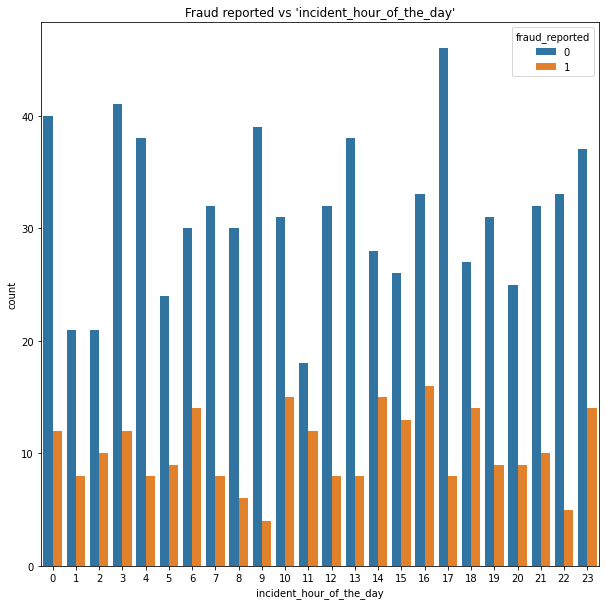

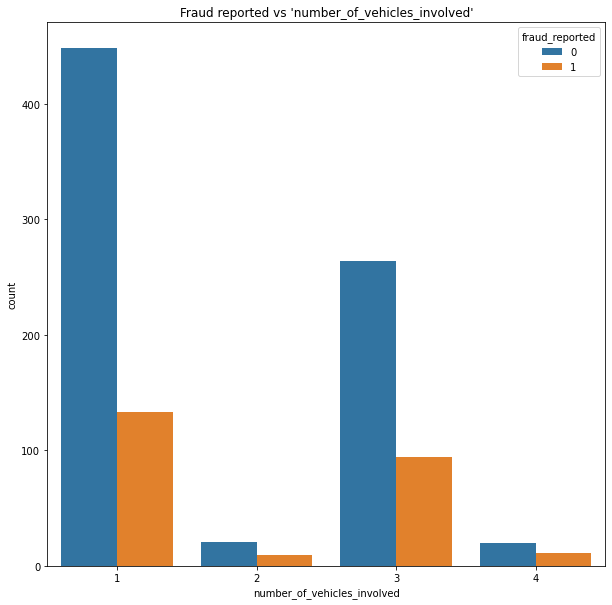

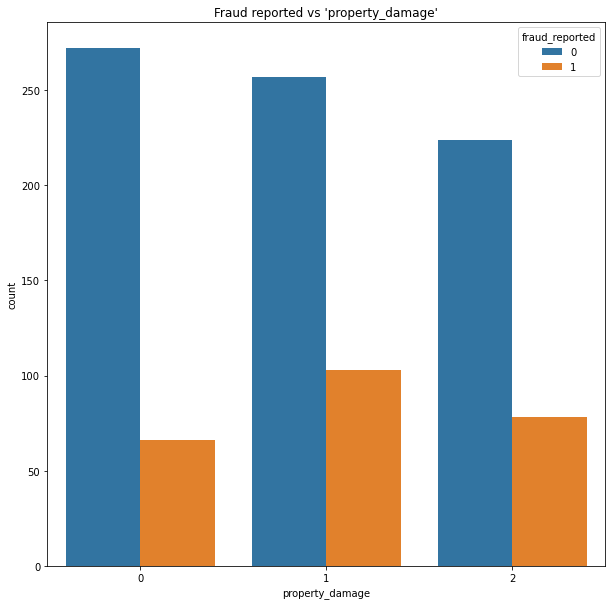

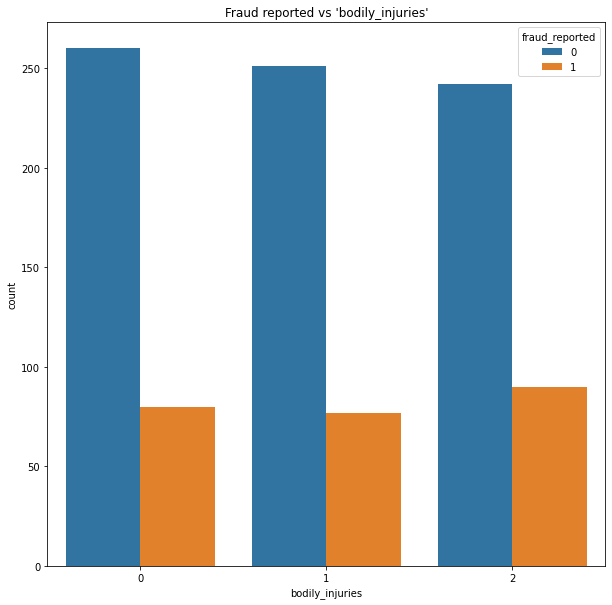

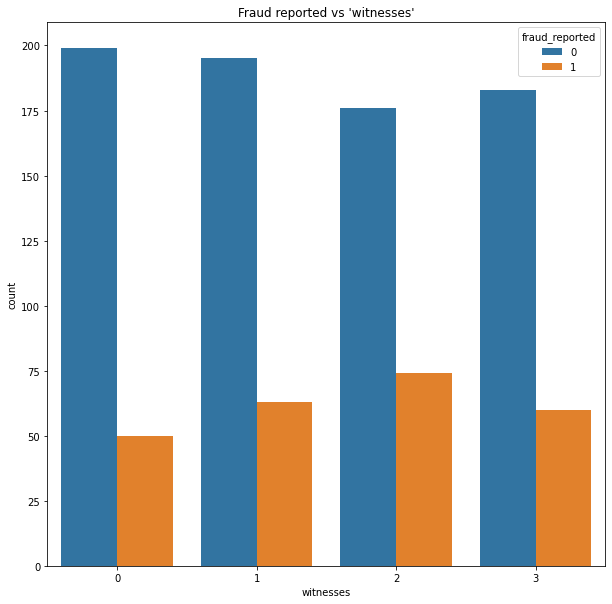

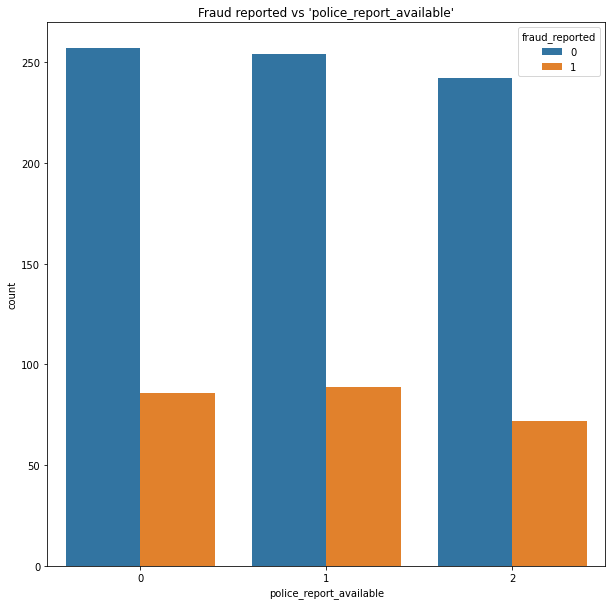

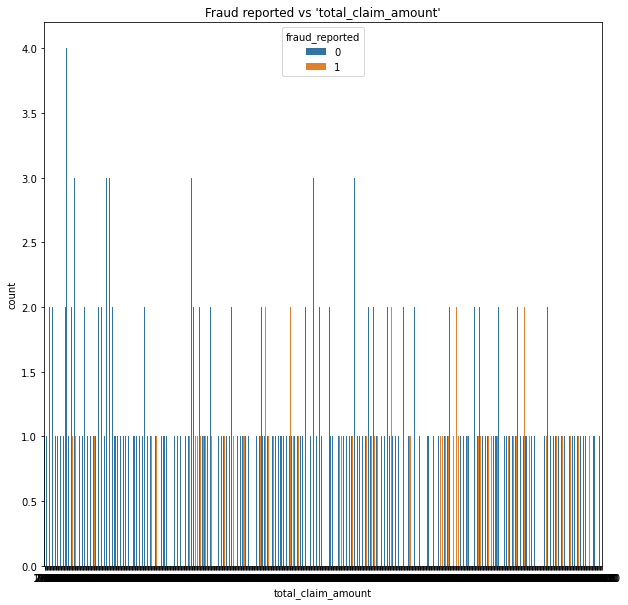

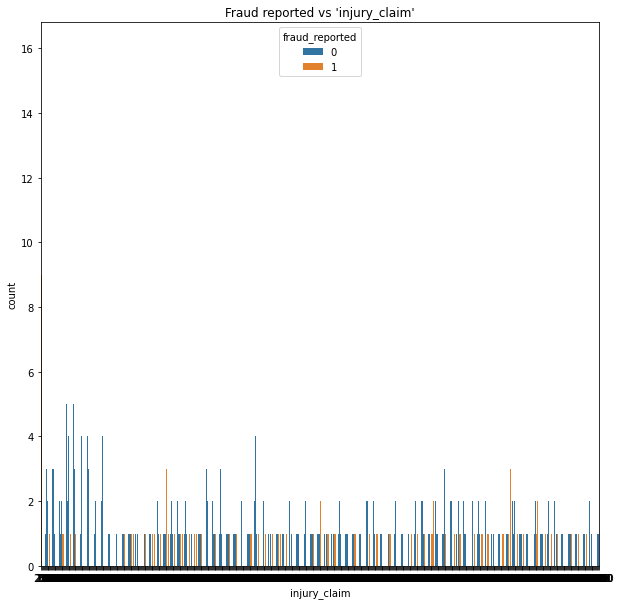

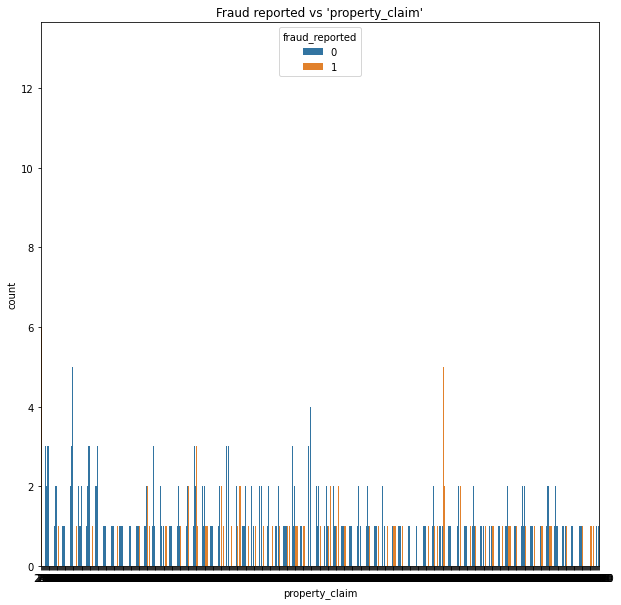

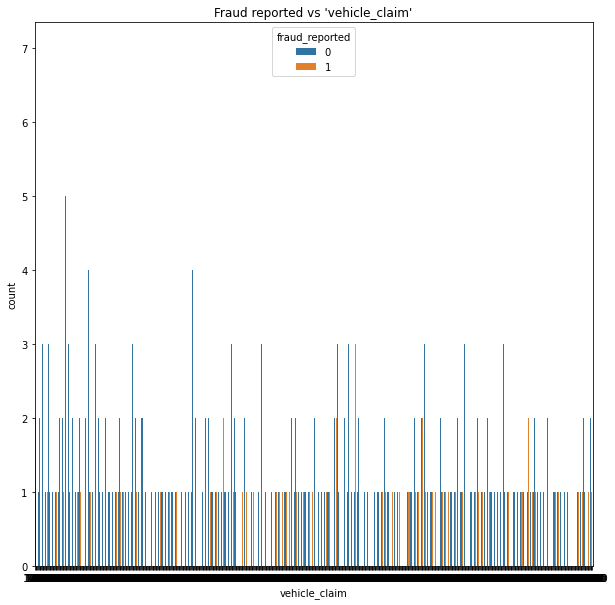

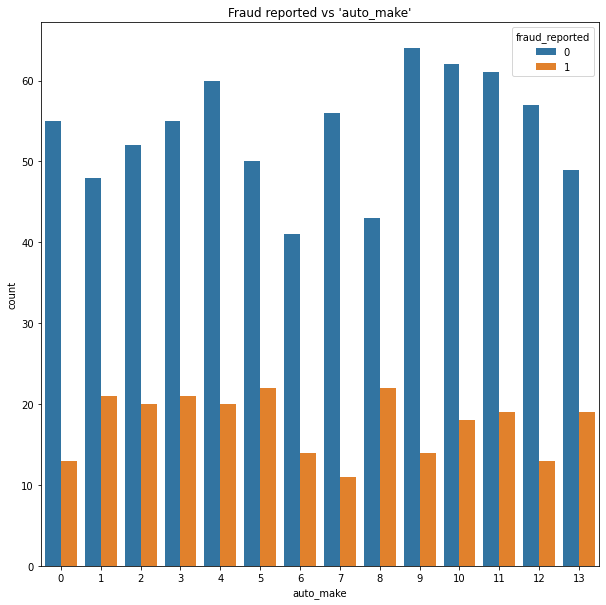

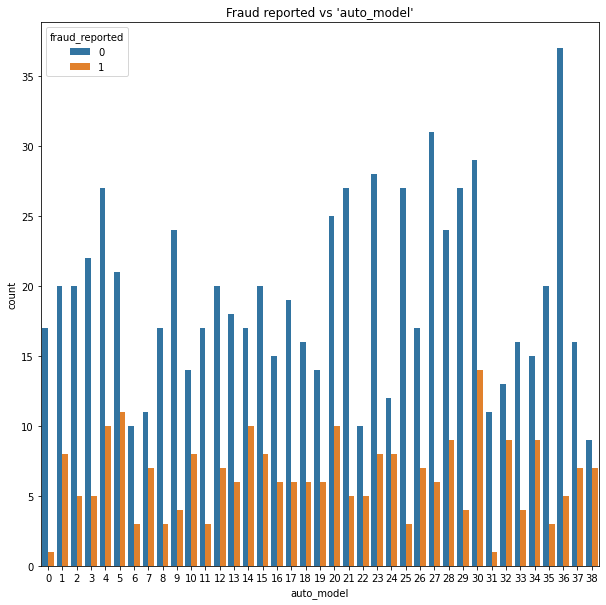

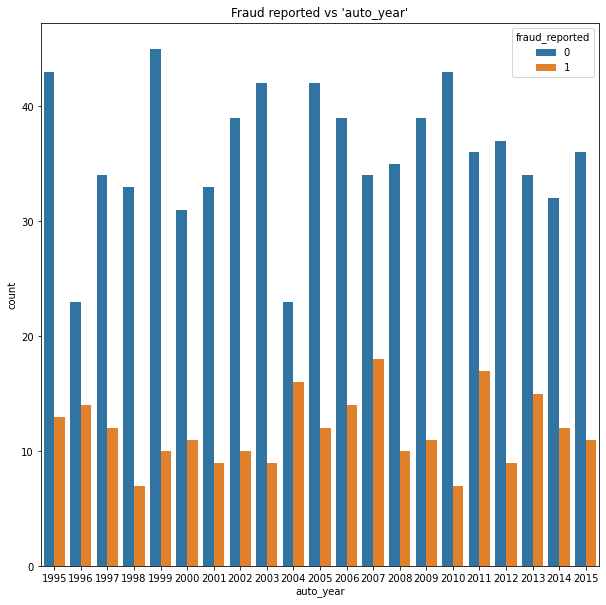

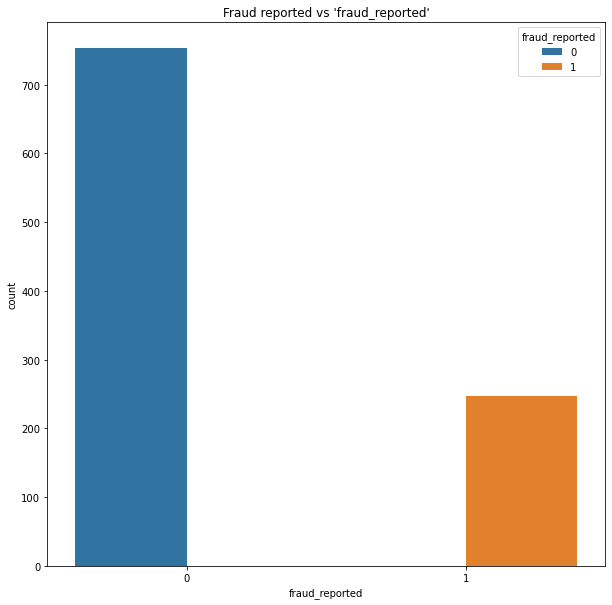

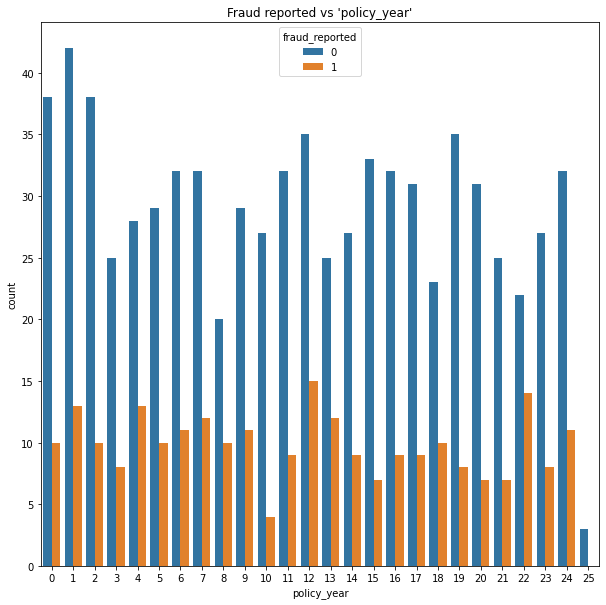

In [89]:
for i in df[:-1]:                                #bivariate analysis
    plt.figure(figsize=(10,10))
    plt.title("Fraud reported vs '%s'"%i)
    sn.countplot(df[i],hue=df['fraud_reported'])

In [24]:
df.corr()

months_as_customer       age  policy_deductable  \
months_as_customer                     1.000000  0.922098           0.026807   
age                                    0.922098  1.000000           0.029188   
policy_deductable                      0.026807  0.029188           1.000000   
policy_annual_premium                  0.005018  0.014404          -0.003245   
umbrella_limit                         0.015498  0.018126           0.010870   
insured_zip                            0.017895  0.025604           0.004545   
capital-gains                          0.006399 -0.007075           0.035212   
capital-loss                           0.020209  0.007368          -0.023544   
incident_hour_of_the_day               0.070639  0.087161           0.060935   
number_of_vehicles_involved            0.014736  0.022102           0.051214   
bodily_injuries                       -0.010162 -0.015679          -0.022765   
witnesses                              0.058383  0.052359           0.066639   
total_claim_amount                     0.062108  0.069863           0.022839   
injury_claim                           0.065329  0.075522           0.039107   
property_claim                         0.034940  0.060898           0.064792   
vehicle_claim                          0.061013  0.062588           0.005269   
auto_year                             -0.000292  0.001354           0.026105   

                             policy_annual_premium  umbrella_limit  \
months_as_customer                        0.005018        0.015498   
age                                       0.014404        0.018126   
policy_deductable                        -0.003245        0.010870   
policy_annual_premium                     1.000000       -0.006247   
umbrella_limit                           -0.006247        1.000000   
insured_zip                               0.032354        0.019671   
capital-gains                            -0.013738       -0.047268   
capital-loss                              0.023547       -0.024056   
incident_hour_of_the_day                 -0.001578       -0.023257   
number_of_vehicles_involved              -0.045991       -0.021270   
bodily_injuries                           0.026780        0.022743   
witnesses                                 0.002332       -0.006738   
total_claim_amount                        0.009094       -0.040344   
injury_claim                             -0.017633       -0.045412   
property_claim                           -0.011654       -0.023790   
vehicle_claim                             0.020246       -0.038584   
auto_year                                -0.049226        0.009893   

                             insured_zip  capital-gains  capital-loss  \
months_as_customer              0.017895       0.006399      0.020209   
age                             0.025604      -0.007075      0.007368   
policy_deductable               0.004545       0.035212     -0.023544   
policy_annual_premium           0.032354      -0.013738      0.023547   
umbrella_limit                  0.019671      -0.047268     -0.024056   
insured_zip                     1.000000       0.006303      0.049372   
capital-gains                   0.006303       1.000000     -0.046904   
capital-loss                    0.049372      -0.046904      1.000000   
incident_hour_of_the_day        0.008274      -0.016406     -0.025054   
number_of_vehicles_involved     0.027448       0.061643     -0.014895   
bodily_injuries                 0.028695       0.055829     -0.024418   
witnesses                       0.019805      -0.017651     -0.041330   
total_claim_amount             -0.033873       0.015980     -0.036060   
injury_claim                   -0.017495       0.025934     -0.046060   
property_claim                 -0.006841      -0.000779     -0.022863   
vehicle_claim                  -0.041083       0.015836     -0.032665   
auto_year                      -0.032736       0.031398     -0.056615   

            

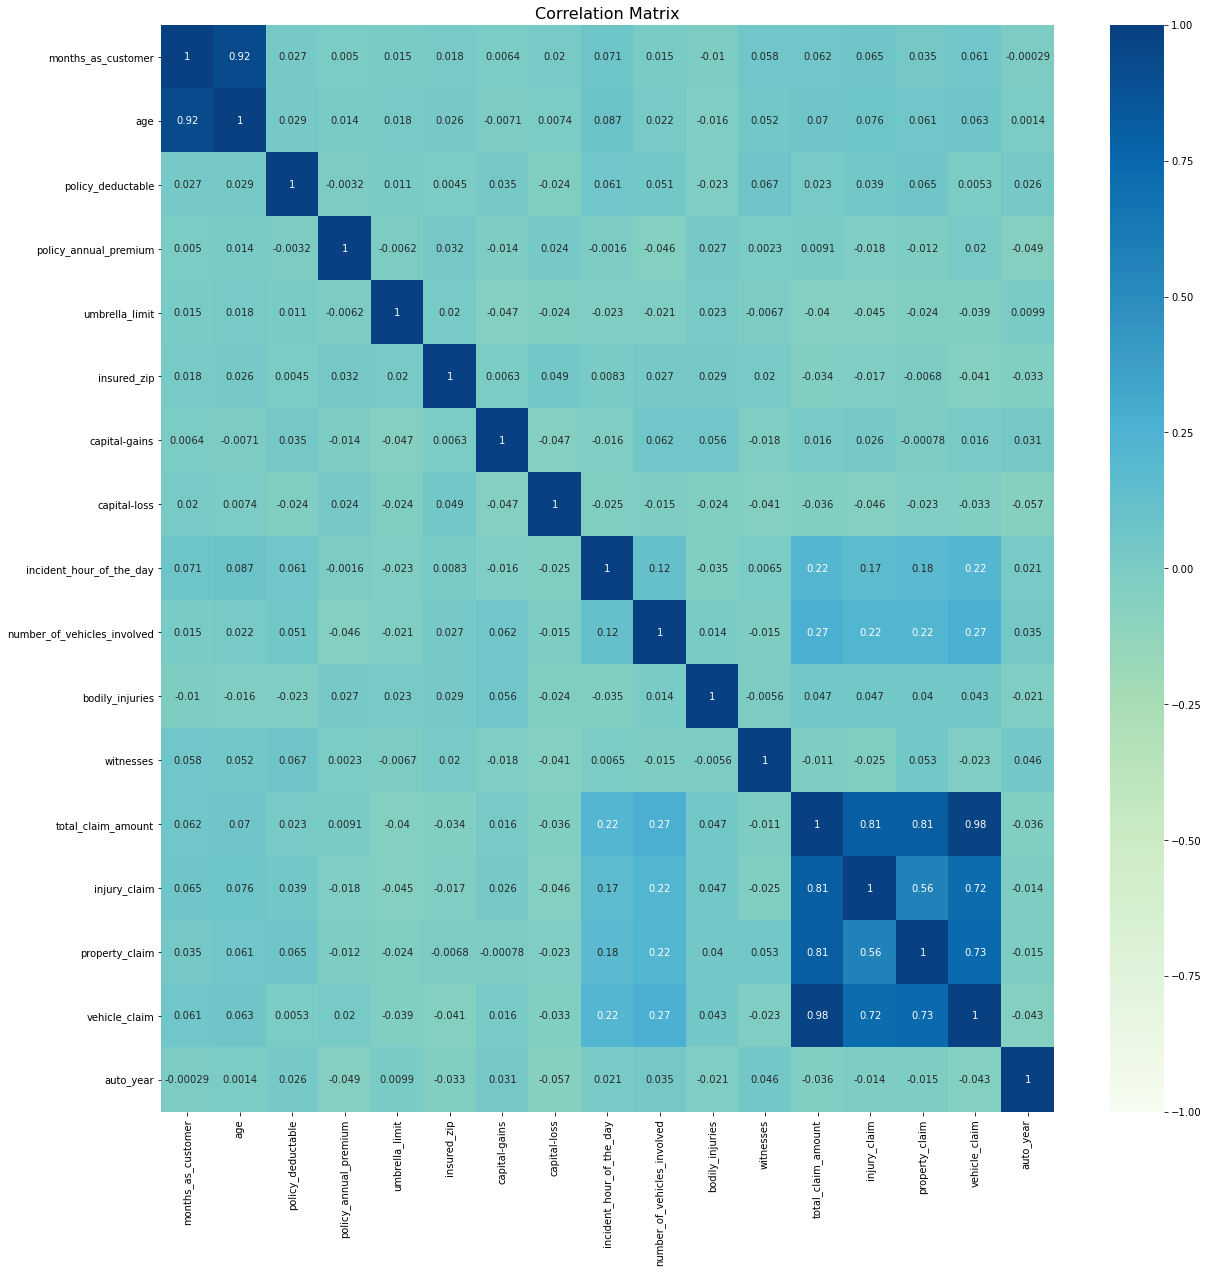

In [25]:
fx, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
ax.set_title('Correlation Matrix', fontsize=16)

sn.heatmap(df.corr(), vmin=-1, vmax=1, cmap='GnBu', annot=True)
plt.show()

In [26]:
df.dtypes

months_as_customer               int64
age                              int64
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                

In [27]:
cat_vars = [x for x in df.columns if df[x].dtypes == 'O']
df[cat_vars]

policy_state policy_csl insured_sex insured_education_level  \
0             OH    250/500        MALE                      MD   
1             IN    250/500        MALE                      MD   
2             OH    100/300      FEMALE                     PhD   
3             IL    250/500      FEMALE                     PhD   
4             IL   500/1000        MALE               Associate   
..           ...        ...         ...                     ...   
995           OH   500/1000      FEMALE                 Masters   
996           IL    100/300      FEMALE                     PhD   
997           OH    250/500      FEMALE                 Masters   
998           IL   500/1000        MALE               Associate   
999           OH    250/500      FEMALE               Associate   

    insured_occupation insured_hobbies insured_relationship  \
0         craft-repair        sleeping              husband   
1    machine-op-inspct         reading       other-relative   
2                sales     board-games            own-child   
3         armed-forces     board-games            unmarried   
4                sales     board-games            unmarried   
..                 ...             ...                  ...   
995       craft-repair       paintball            unmarried   
996     prof-specialty        sleeping                 wife   
997       armed-forces  bungie-jumping       other-relative   
998  handlers-cleaners    base-jumping                 wife   
999              sales        kayaking              husband   

                incident_type   collision_type incident_severity  \
0    Single Vehicle Collision   Side Collision      Major Damage   
1               Vehicle Theft   Rear Collision      Minor Damage   
2     Multi-vehicle Collision   Rear Collision      Minor Damage   
3    Single Vehicle Collision  Front Collision      Major Damage   
4               Vehicle Theft   Rear Collision      Minor Damage   
..                        ...              ...               ...   
995  Single Vehicle Collision  Front Collision      Minor Damage   
996  Single Vehicle Collision   Rear Collision      Major Damage   
997   Multi-vehicle Collision   Side Collision      Minor Damage   
998  Single Vehicle Collision   Rear Collision      Major Damage   
999                Parked Car   Rear Collision      Minor Damage   

    authorities_contacted incident_state incident_city property_damage  \
0                  Police             SC      Columbus             YES   
1                  Police             VA     Riverwood              No   
2                  Police             NY      Columbus              NO   
3                  Police             OH     Arlington              No   
4                    None             NY     Arlington              NO   
..                    ...            ...           ...             ...   
995                  Fire             NC    Northbrook             YES   
996                  Fire             SC     Northbend             YES   
997                Police             NC     Arlington              No   
998                 Other             NY     Arlington              No   
999                Police             WV      Columbus              No   

    police_report_available   auto_make auto_model fraud_reported policy_year  \
0                       YES        Saab        92x              Y        2014   
1                        No    Mercedes       E400              Y        2006   
2                        NO       Dodge        RAM              N        2000   
3                        NO   Chevrolet      Tahoe              Y        1990   
4                        NO      Accura        RSX              N        2014   
..                      ...         ...        ...            ...         ...   
995                      No       Honda     Accord              N        1991   
996                      No  Volkswagen     Passat              N        2014   
997    

In [28]:
#Labelizing categorical variables

from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df[cat_vars]=df[cat_vars].apply(lb.fit_transform)

In [29]:
df.dtypes

months_as_customer               int64
age                              int64
policy_state                     int32
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                  int32
bodily_injuries                  int64
witnesses                

In [30]:
df

months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                   328   48             2           1               1000   
1                   228   42             1           1               2000   
2                   134   29             2           0               2000   
3                   256   41             0           1               2000   
4                   228   44             0           2               1000   
..                  ...  ...           ...         ...                ...   
995                   3   38             2           2               1000   
996                 285   41             0           0               1000   
997                 130   34             2           1                500   
998                 458   62             0           2               2000   
999                 456   60             2           1               1000   

     policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0                  1406.91               0       466132            1   
1                  1197.22         5000000       468176            1   
2                  1413.14         5000000       430632            0   
3                  1415.74         6000000       608117            0   
4                  1583.91         6000000       610706            1   
..                     ...             ...          ...          ...   
995                1310.80               0       431289            0   
996                1436.79               0       608177            0   
997                1383.49         3000000       442797            0   
998                1356.92         5000000       441714            1   
999                 766.19               0       612260            0   

     insured_education_level  ...  total_claim_amount  injury_claim  \
0                          4  ...               71610          6510   
1                          4  ...                5070           780   
2                          6  ...               34650          7700   
3                          6  ...               63400          6340   
4                          0  ...                6500          1300   
..                       ...  ...                 ...           ...   
995                        5  ...               87200         17440   
996                        6  ...              108480         18080   
997                        5  ...               67500          7500   
998                        0  ...               46980          5220   
999                        0  ...                5060           460   

     property_claim  vehicle_claim  auto_make  auto_model  auto_year  \
0             13020          52080         10           1       2004   
1               780           3510          8          12       2007   
2              3850          23100          4          30       2007   
3              6340          50720          3          34       2014   
4               650           4550          0          31       2009   
..              ...            ...        ...         ...        ...   
995            8720          61040          6           6       2006   
996           18080          72320         13          28       2015   
997            7500          52500         11          19       1996   
998            5220          36540          1           5       1998   
999             920           3680          8          12       2007   

     fraud_reported  policy_year  incident_year  
0                 1           24              0  
1                 1           16              0  
2                 0           10              0  
3                 1            0              0  
4                 0           24              0  
..              ...          ...            ...  
995               0            1              0  
996               0           24              0  
997               0           13              0

In [31]:
df.drop(['incident_year'],axis=1,inplace=True)

# Check for outliers

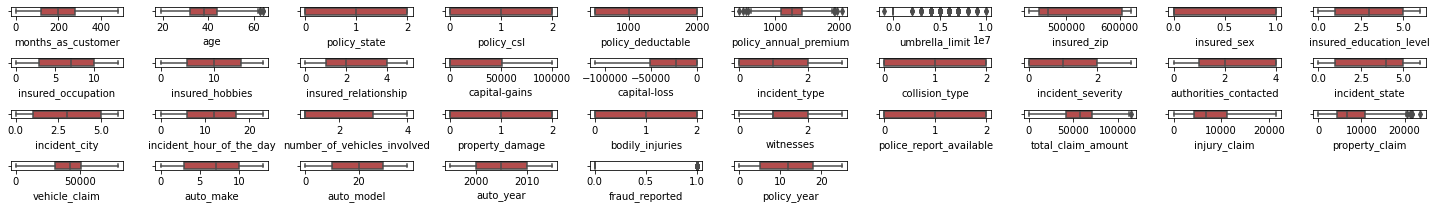

In [32]:
collist=df.columns.values
ncol=10
nrows=20
plt.figure(figsize=(20,14))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sn.boxplot(df[collist[i]],color ='red',saturation = 0.4)
    plt.tight_layout()

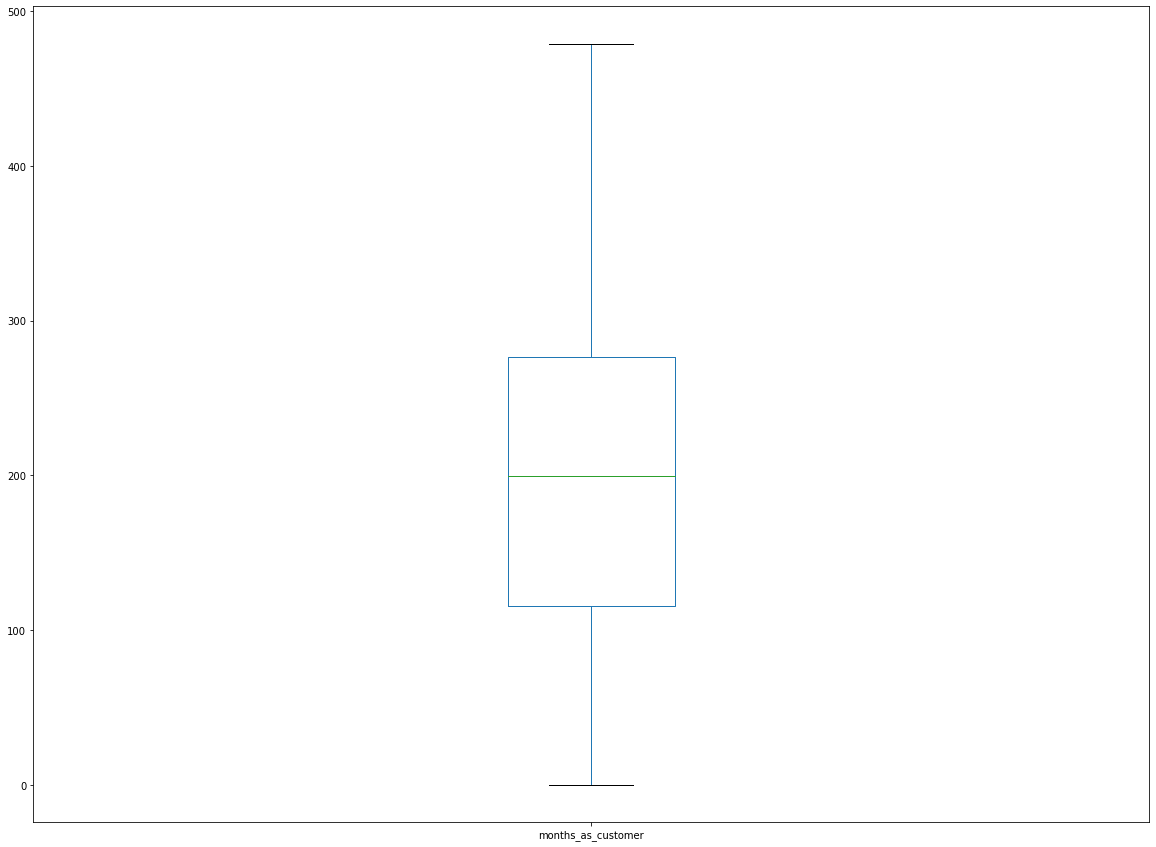

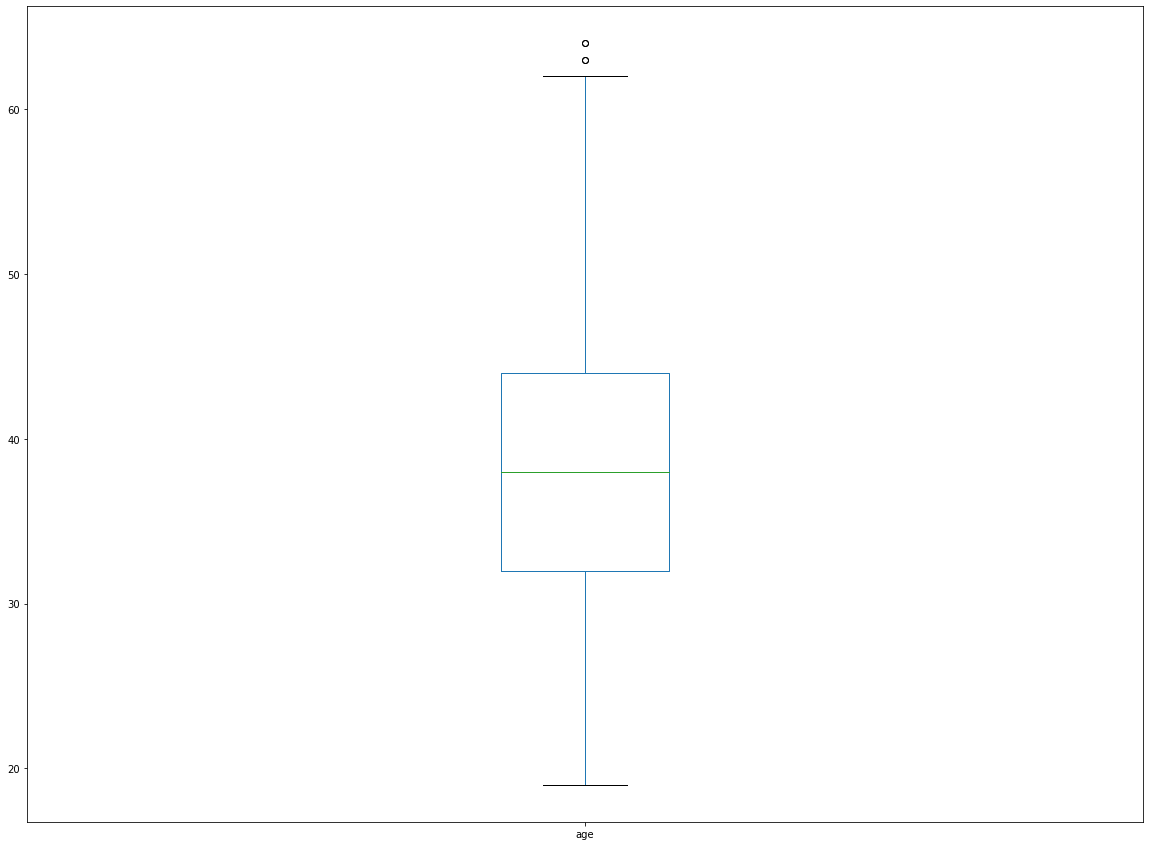

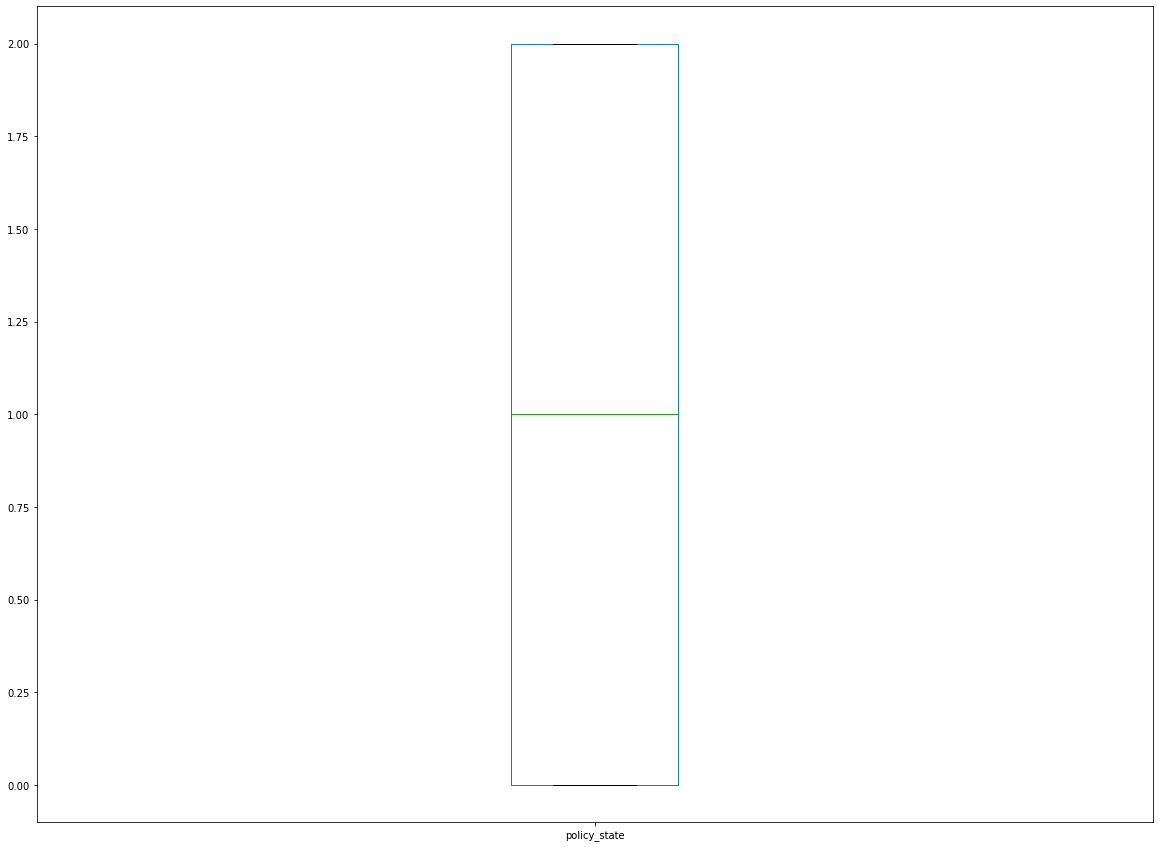

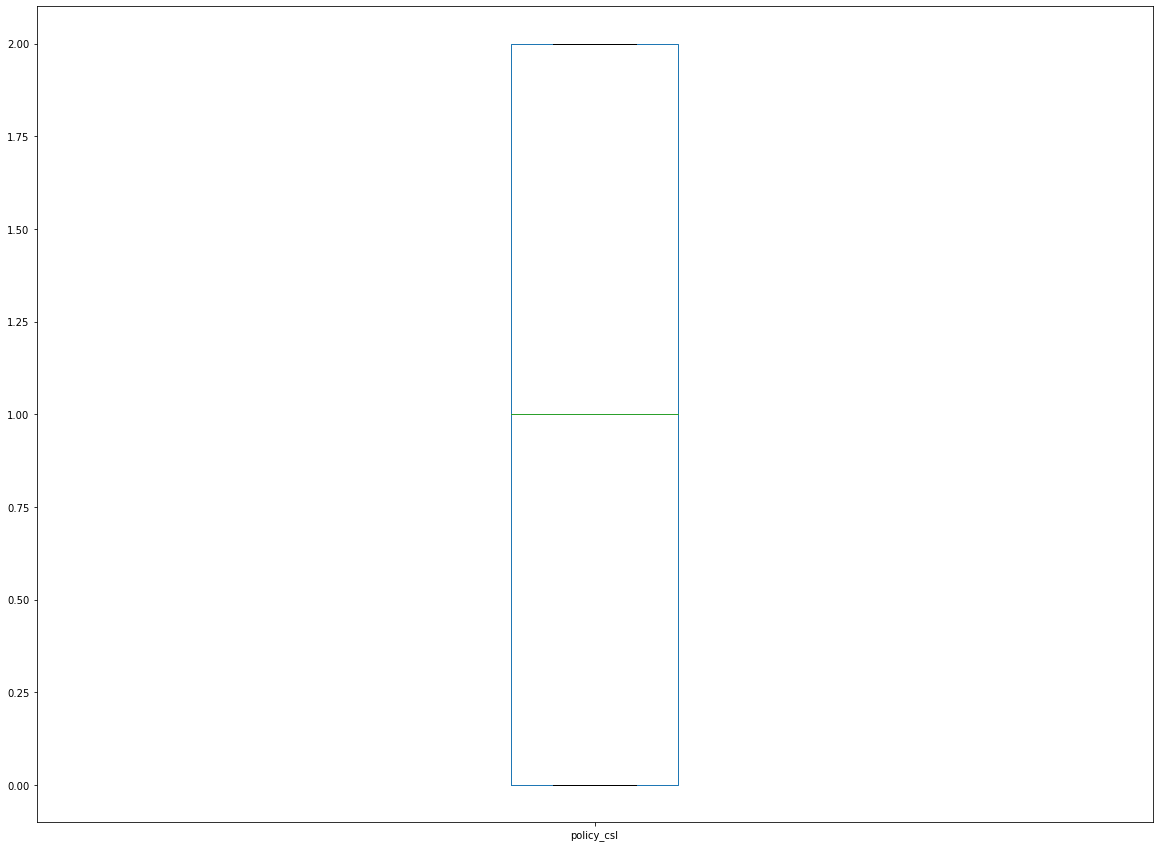

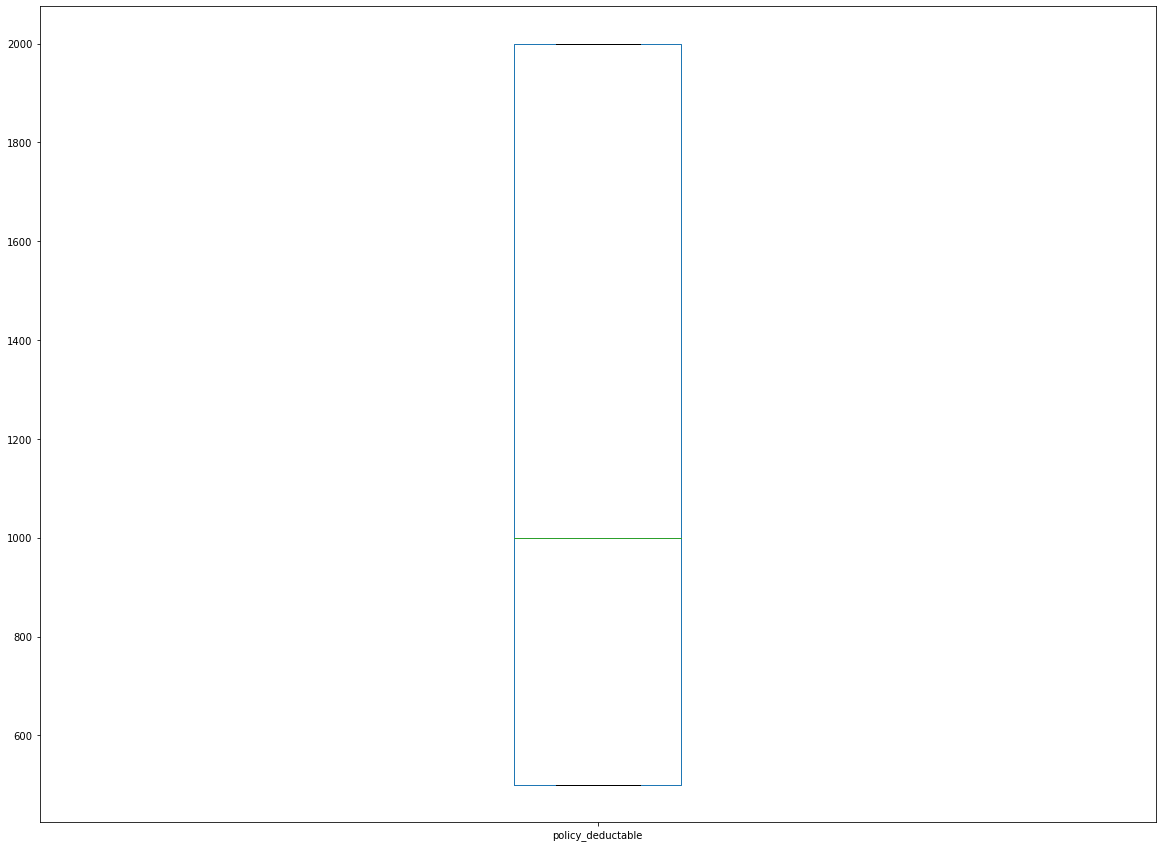

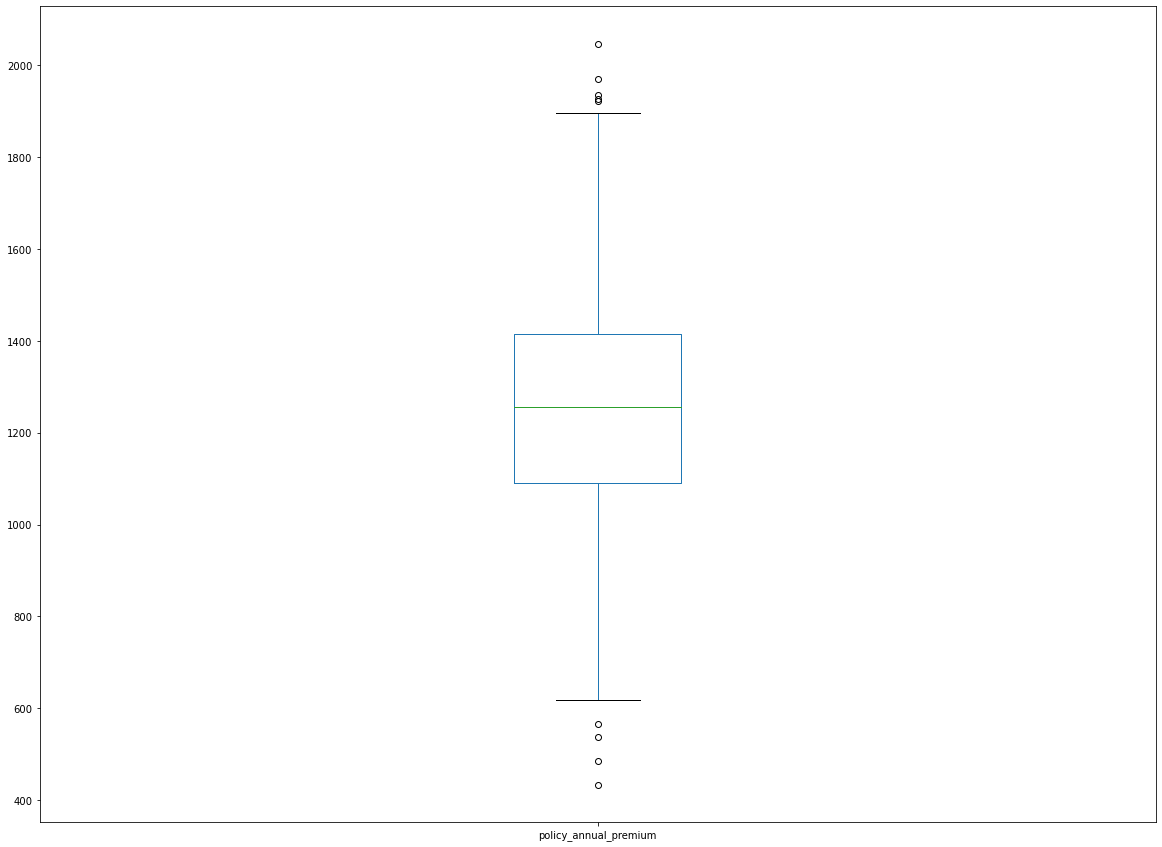

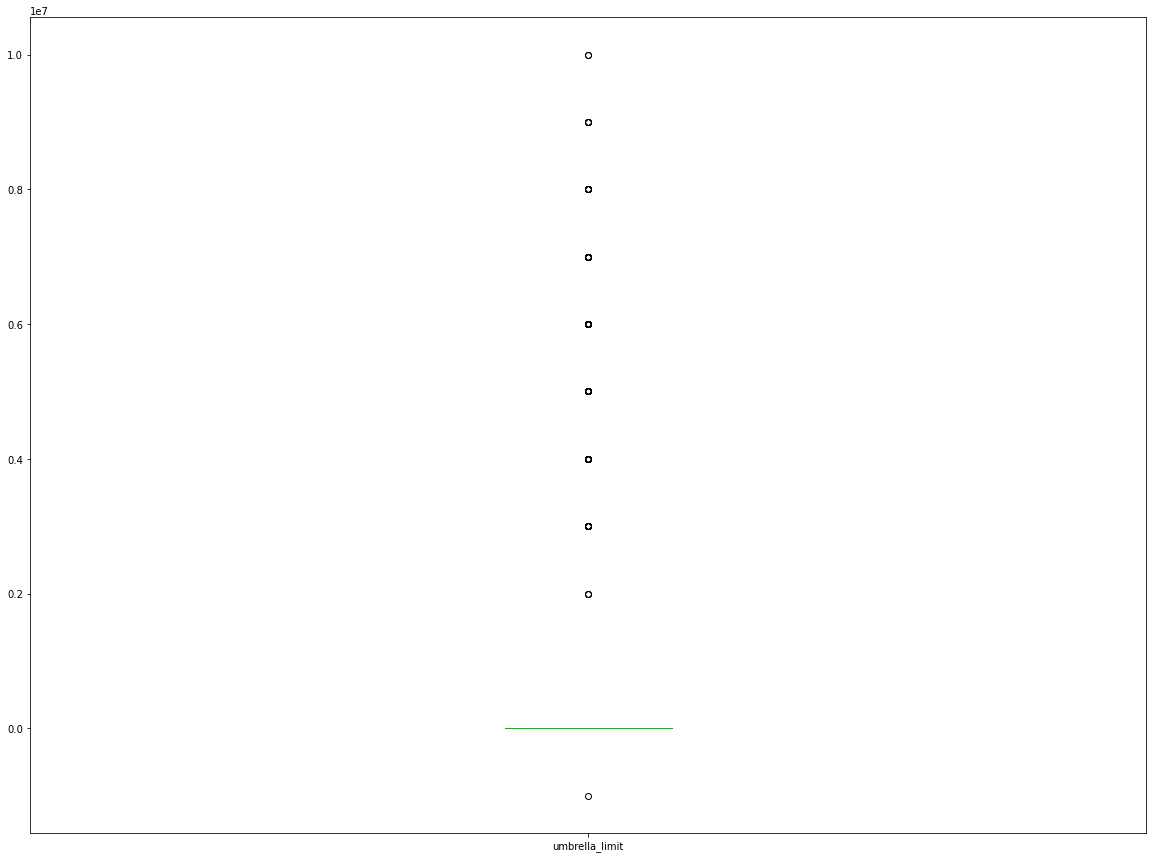

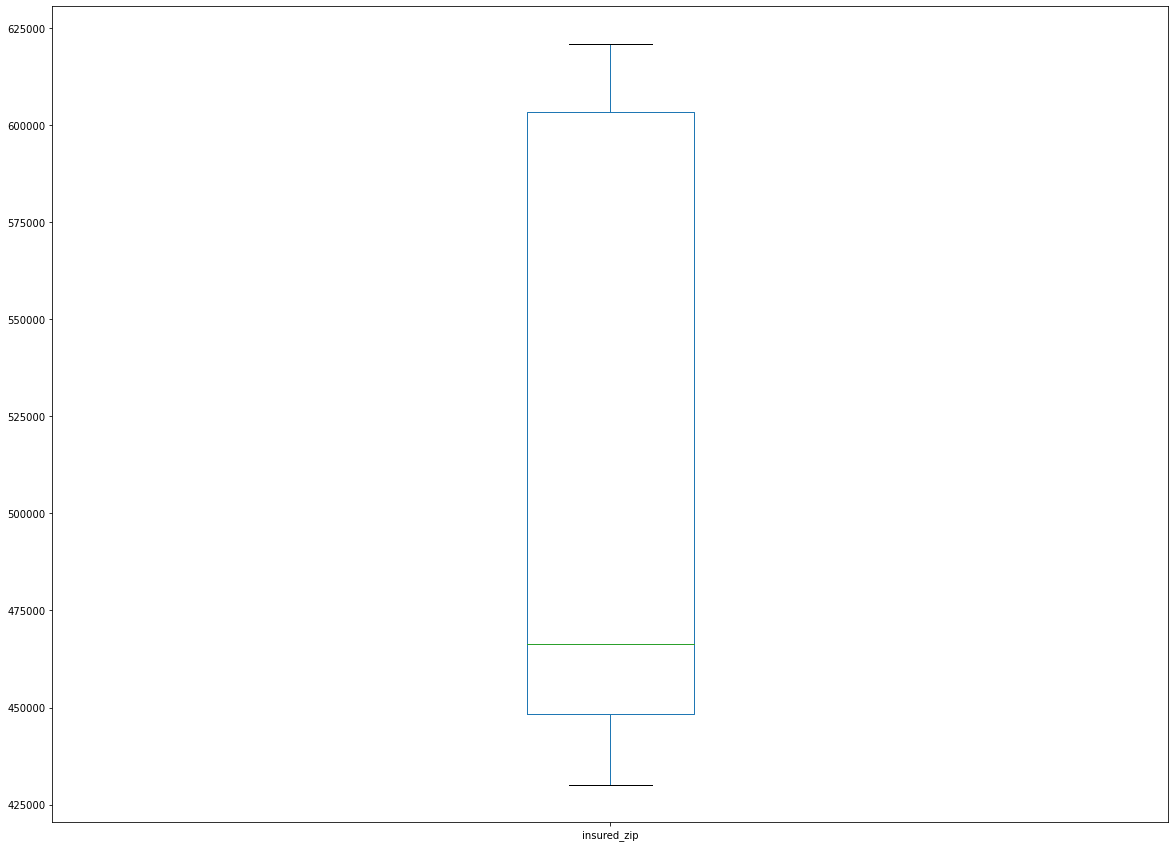

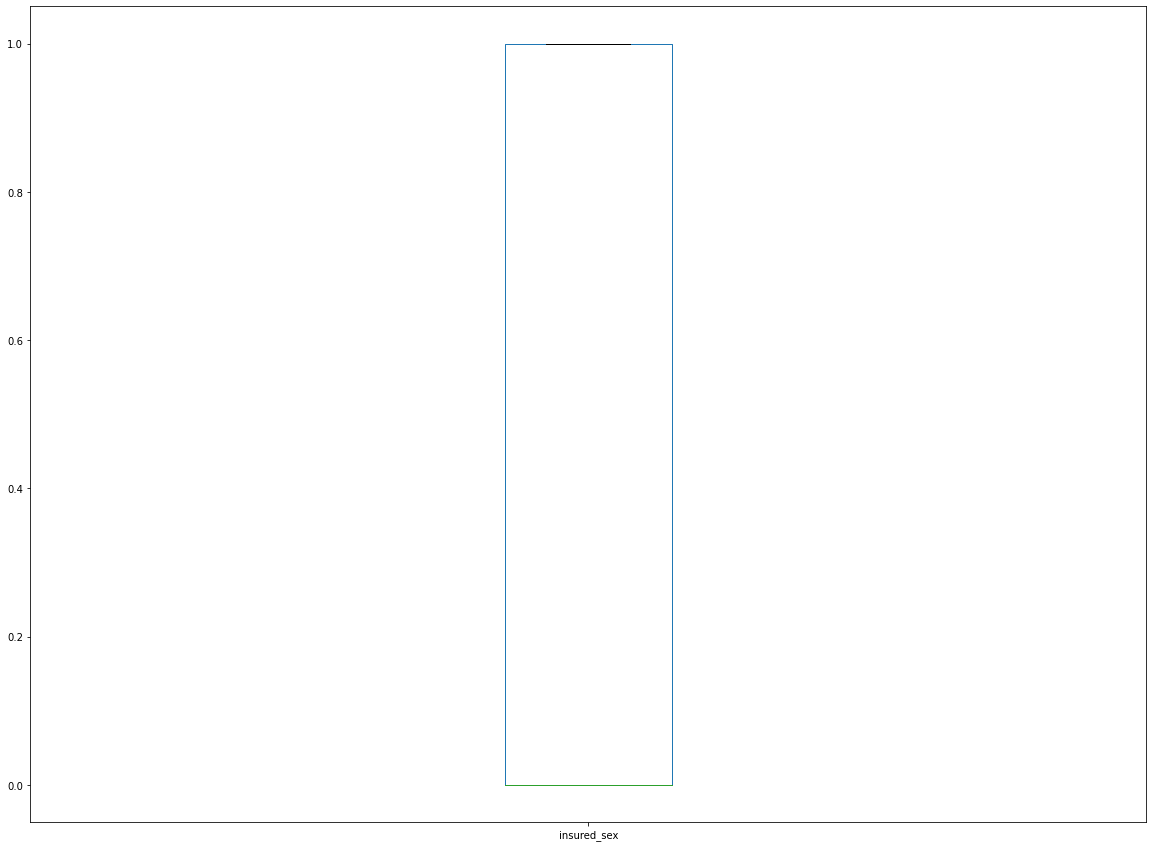

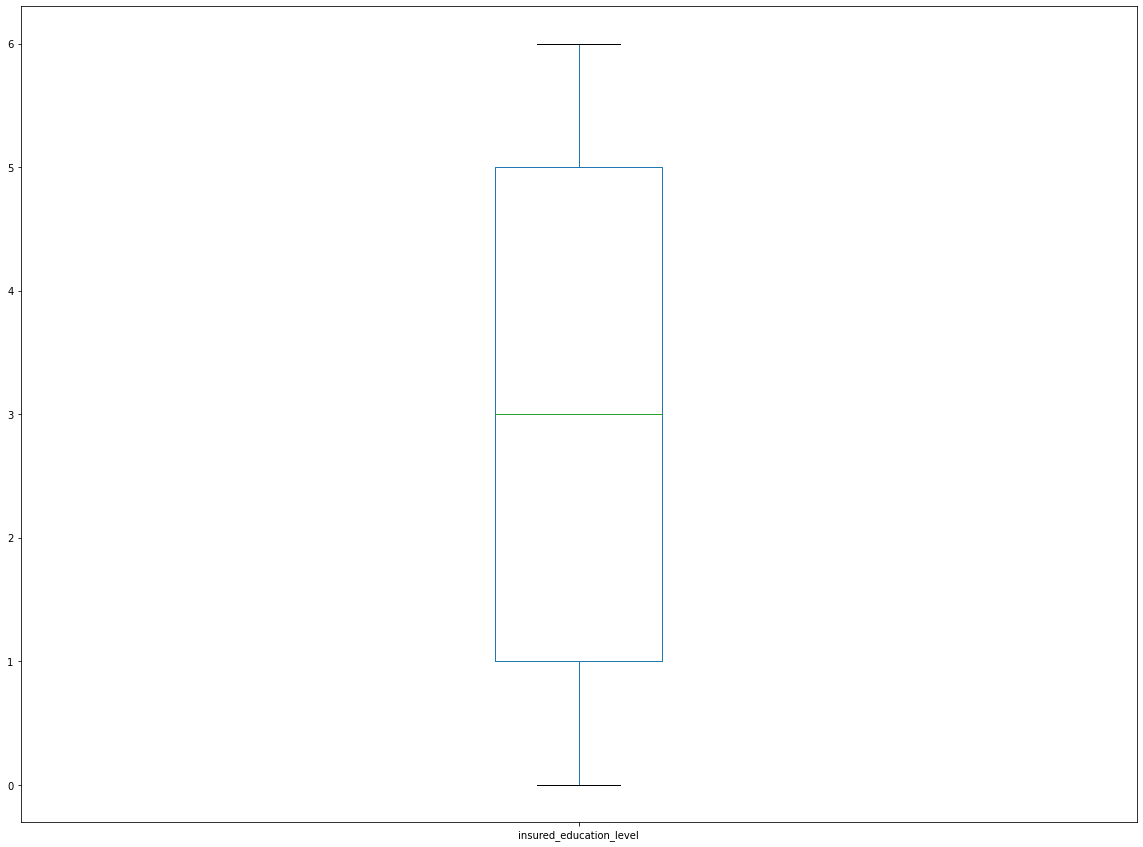

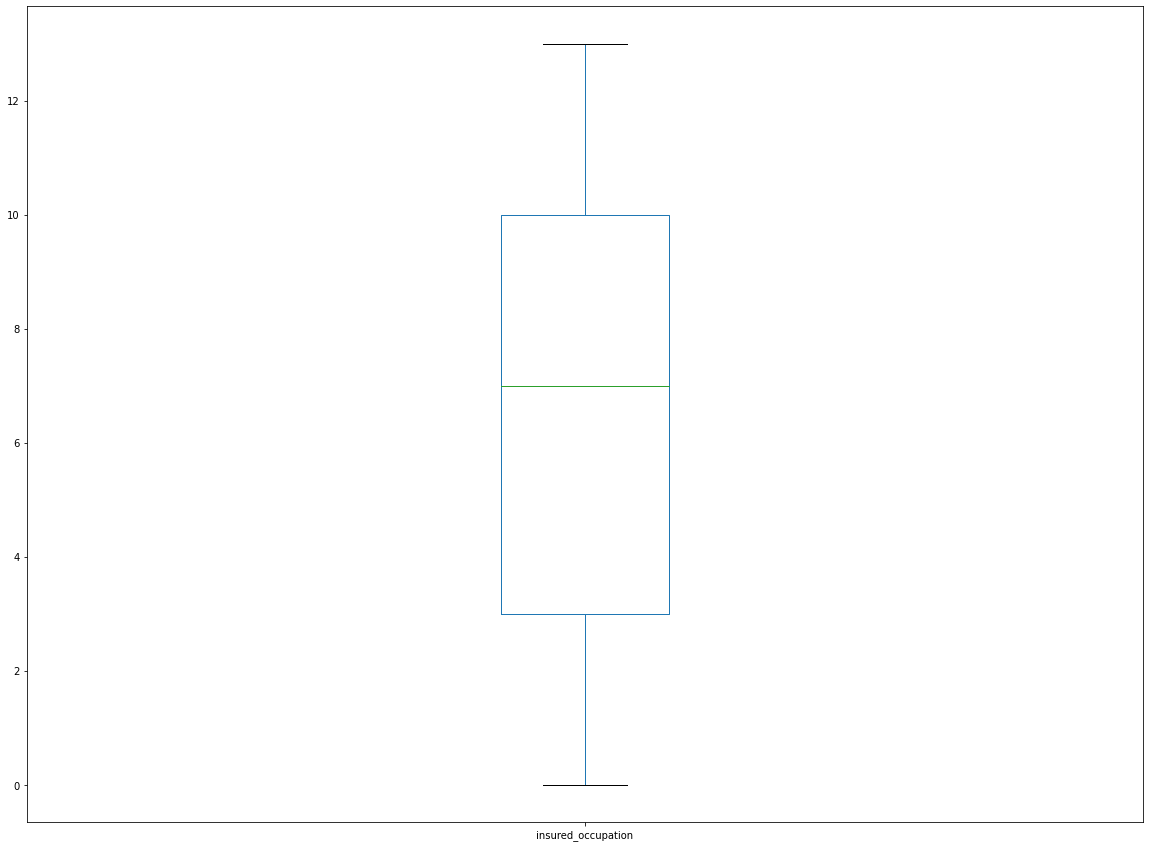

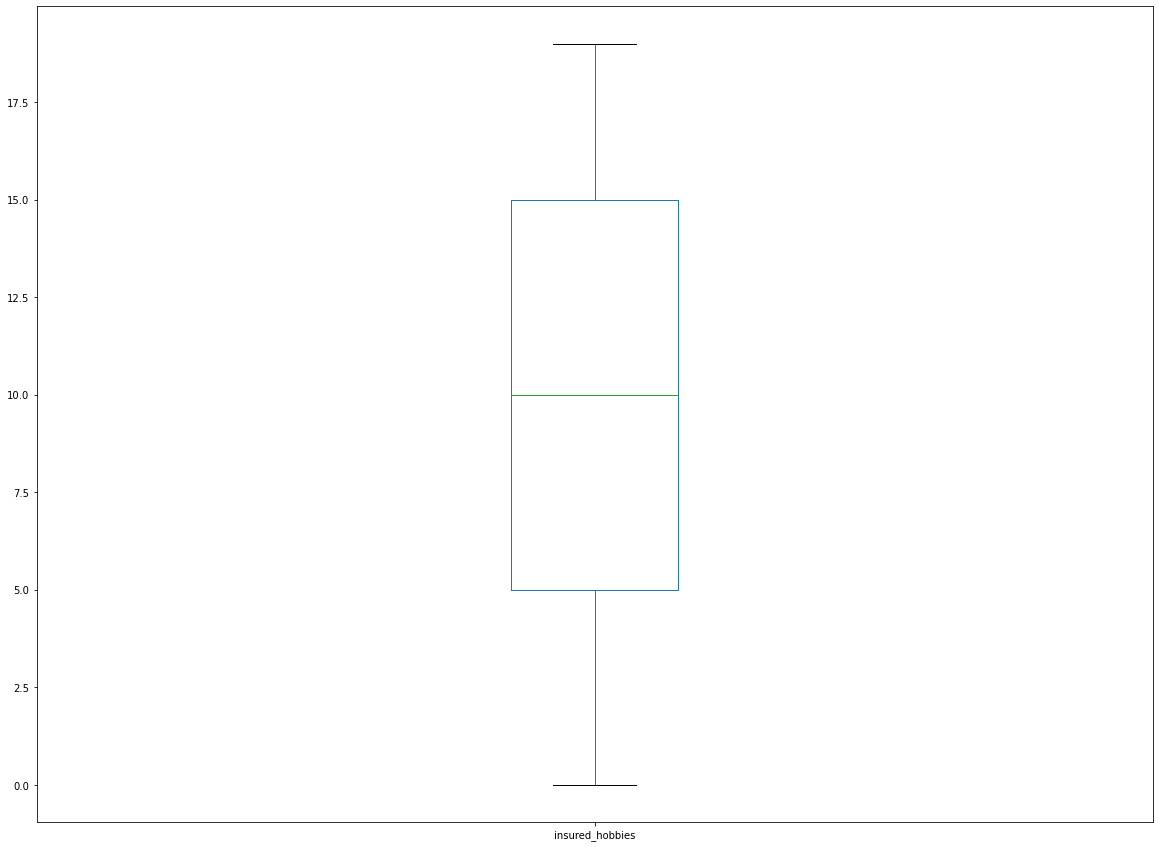

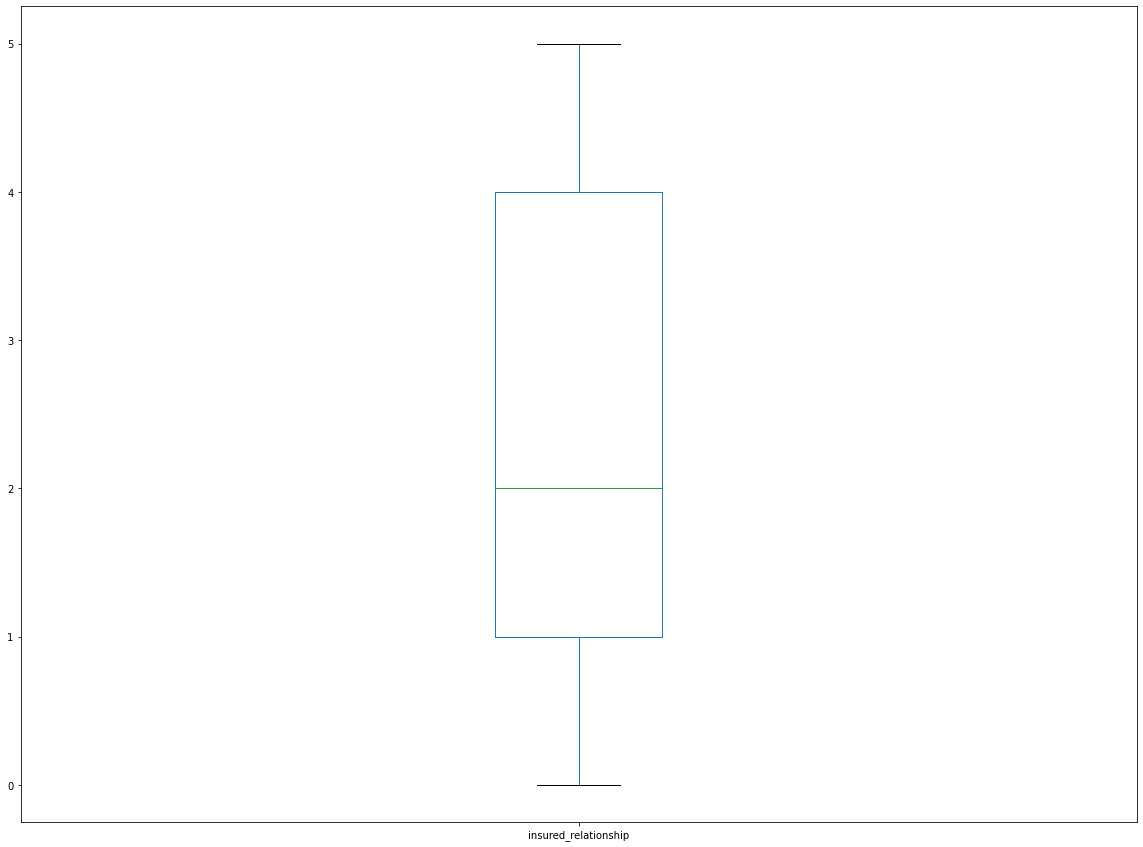

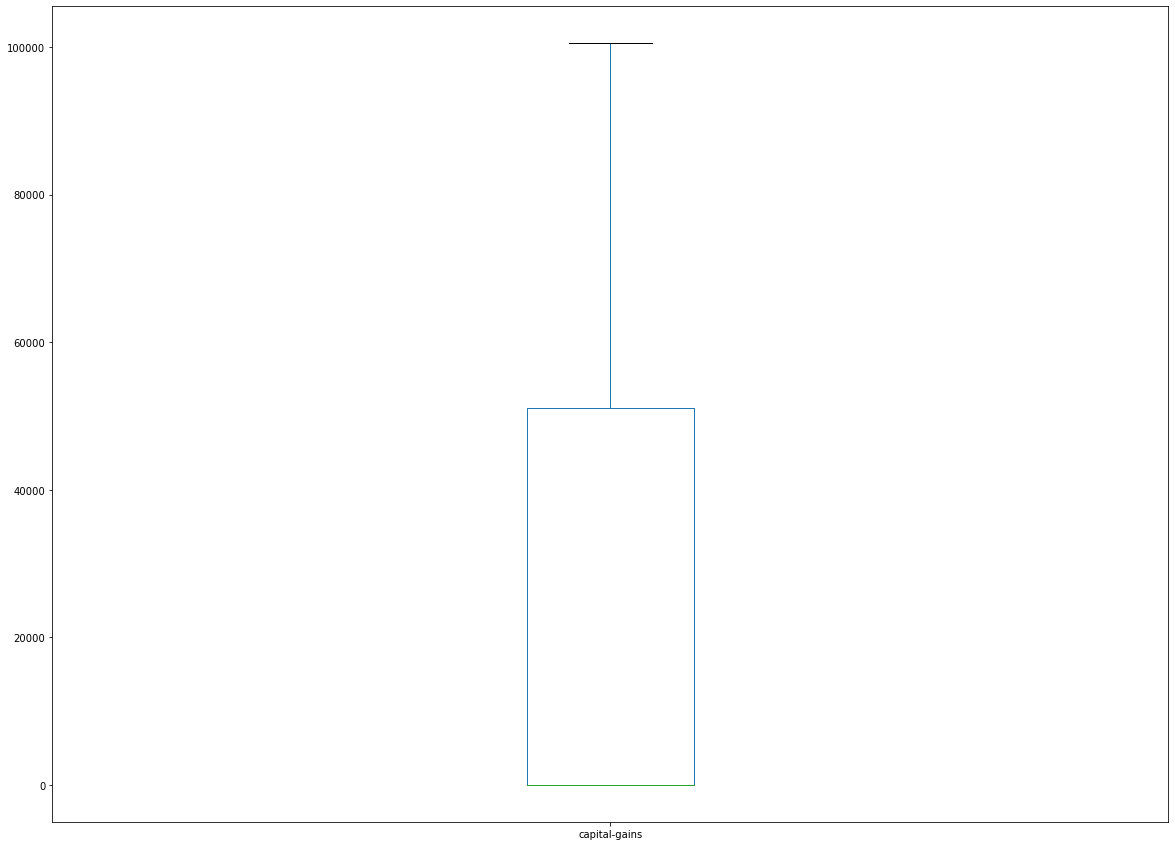

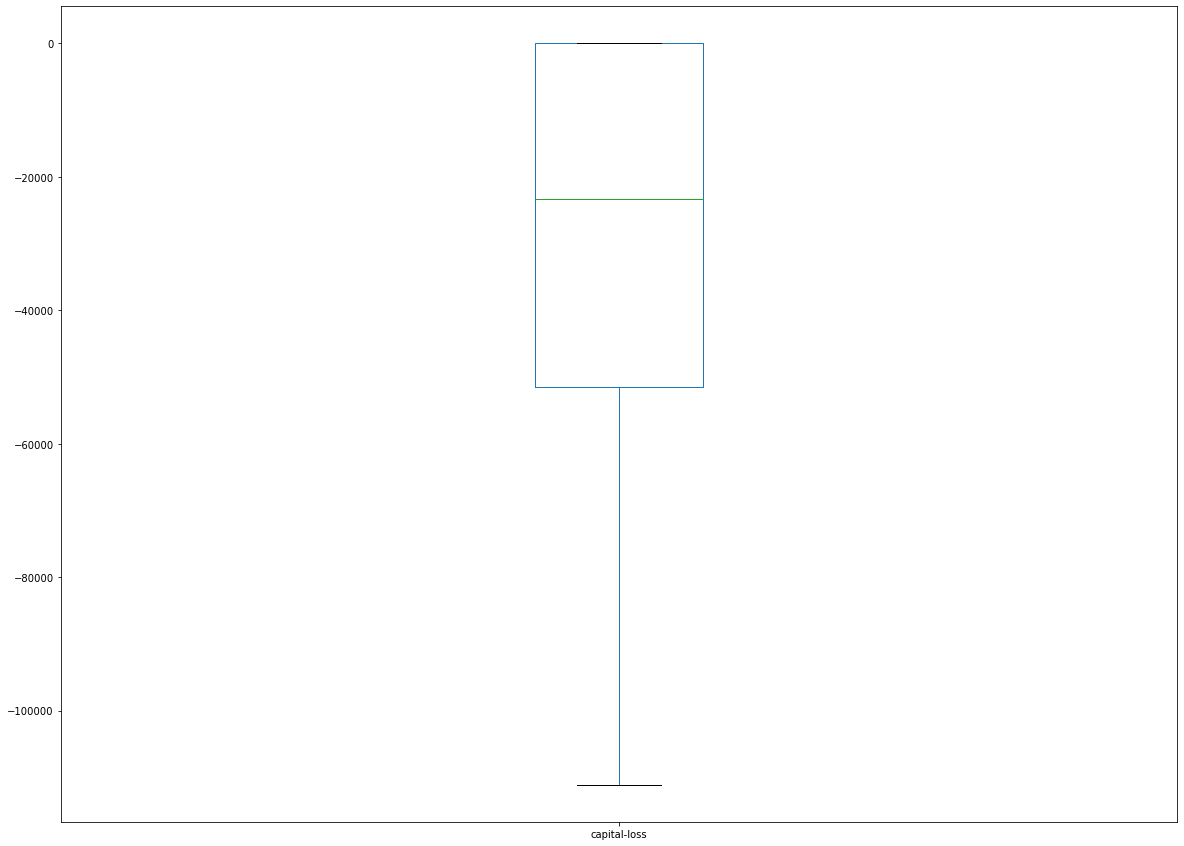

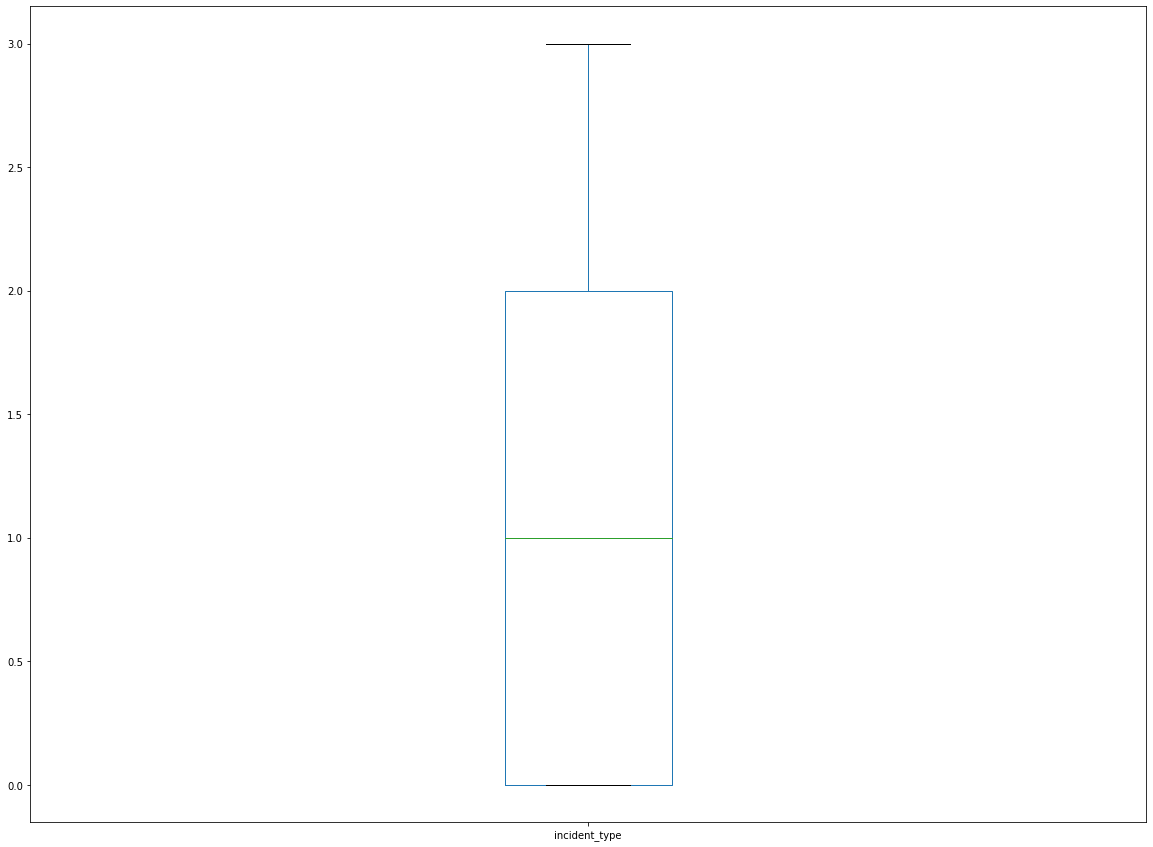

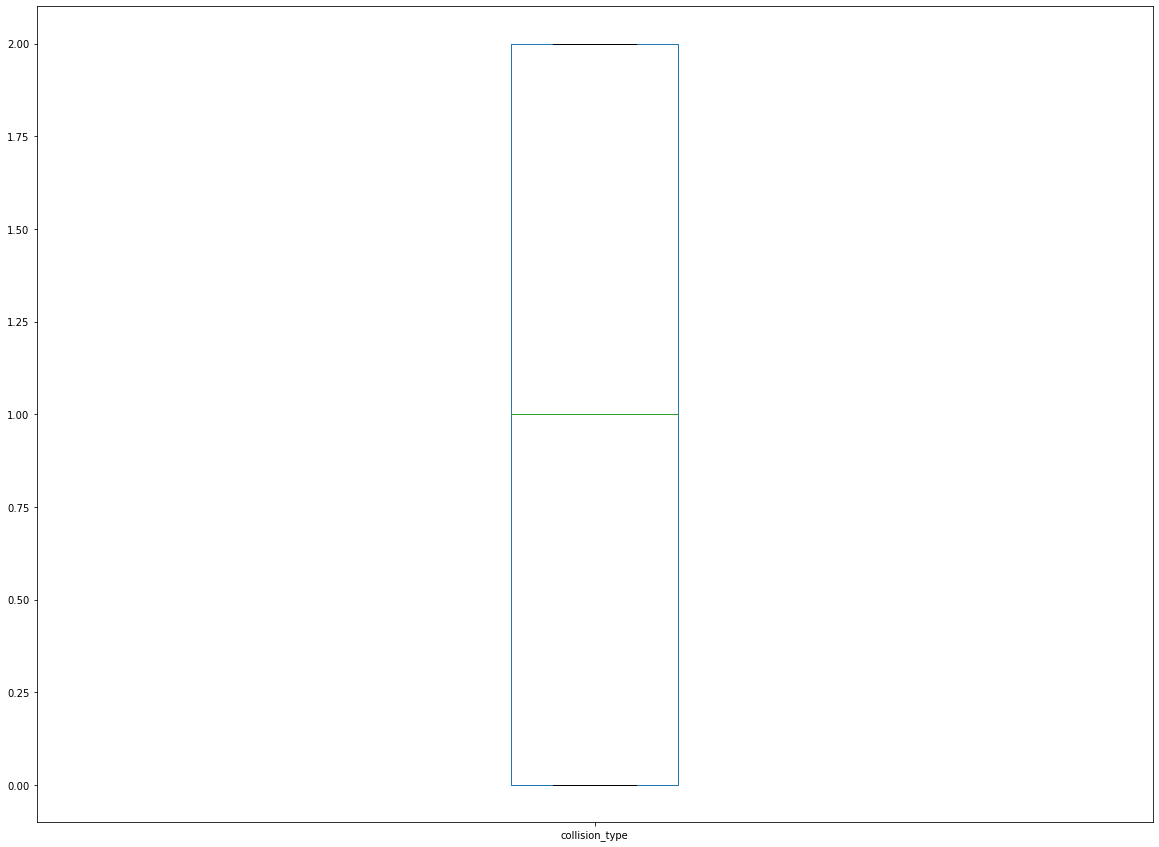

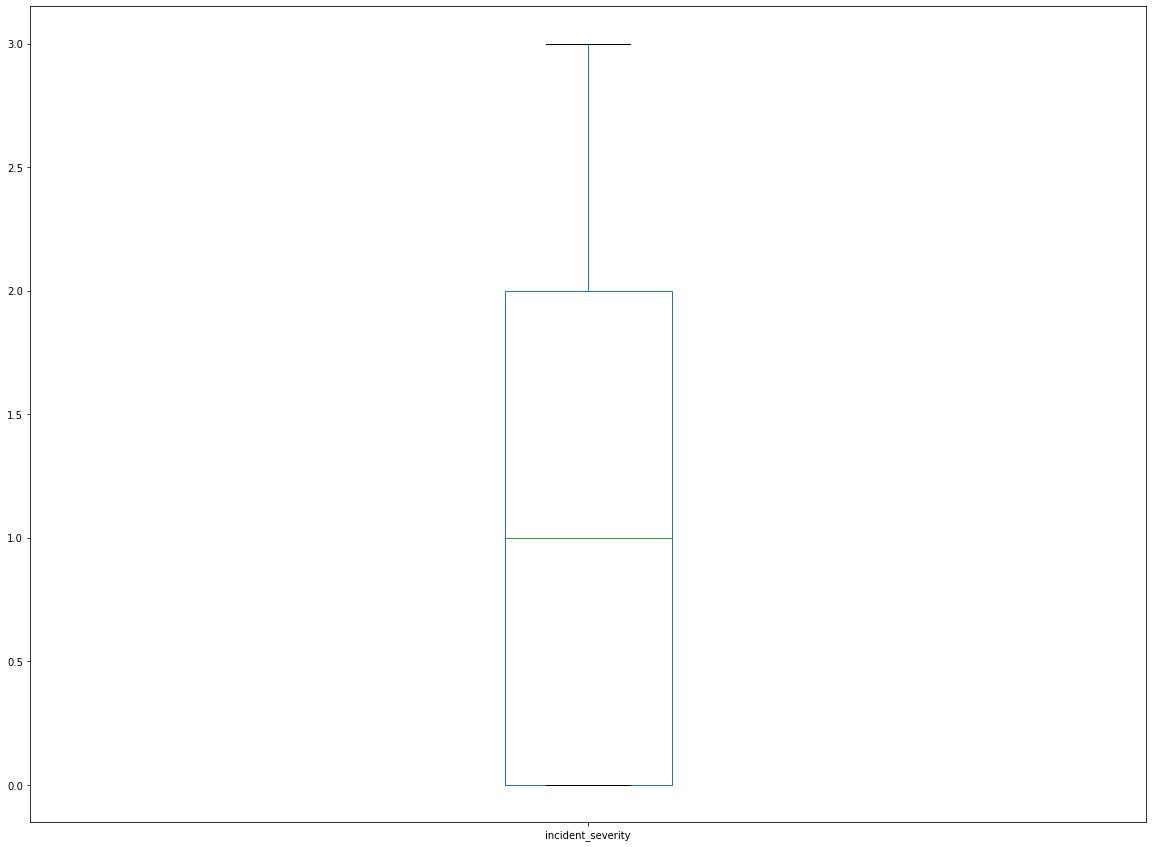

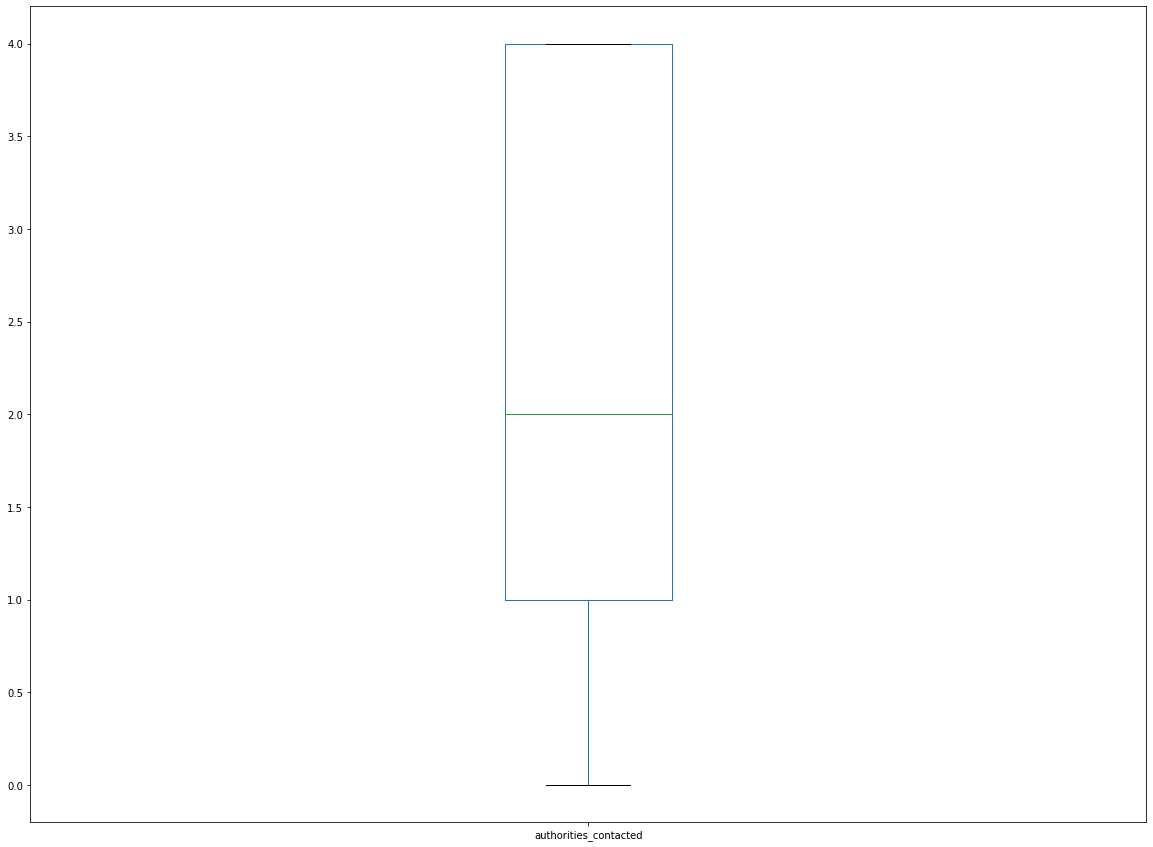

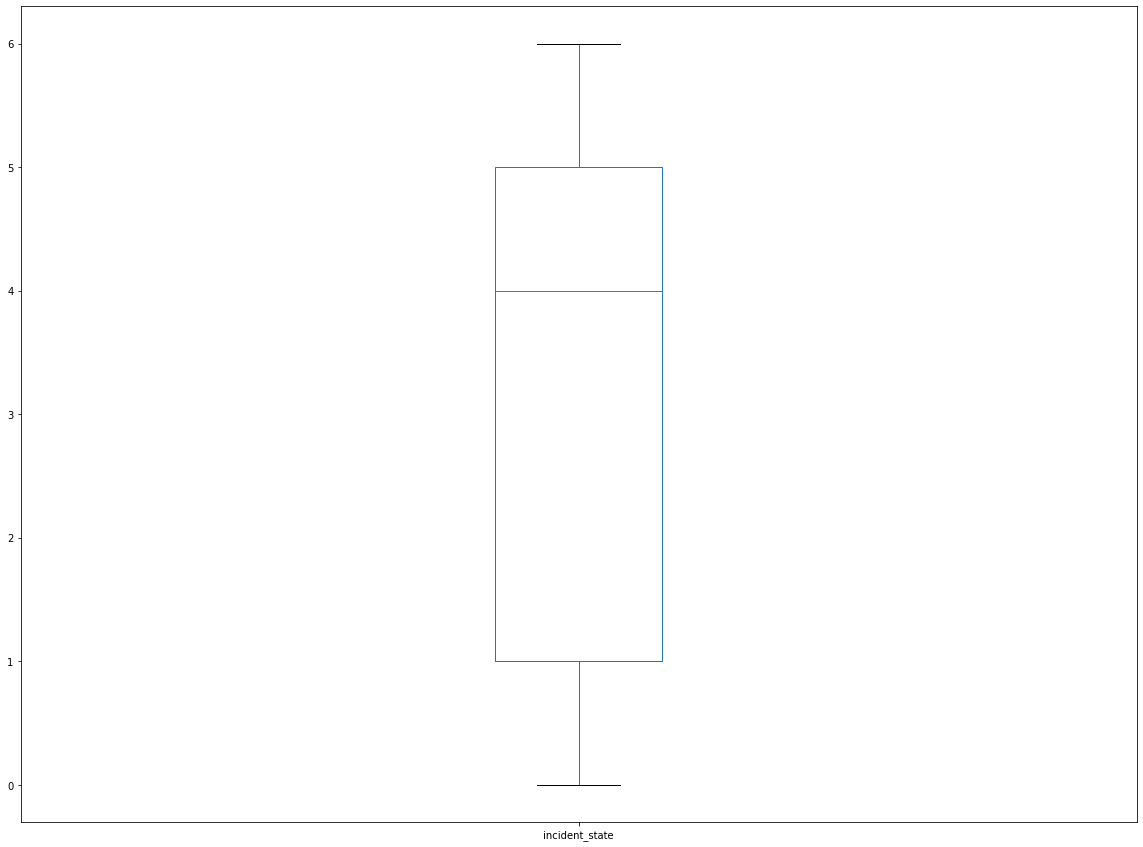

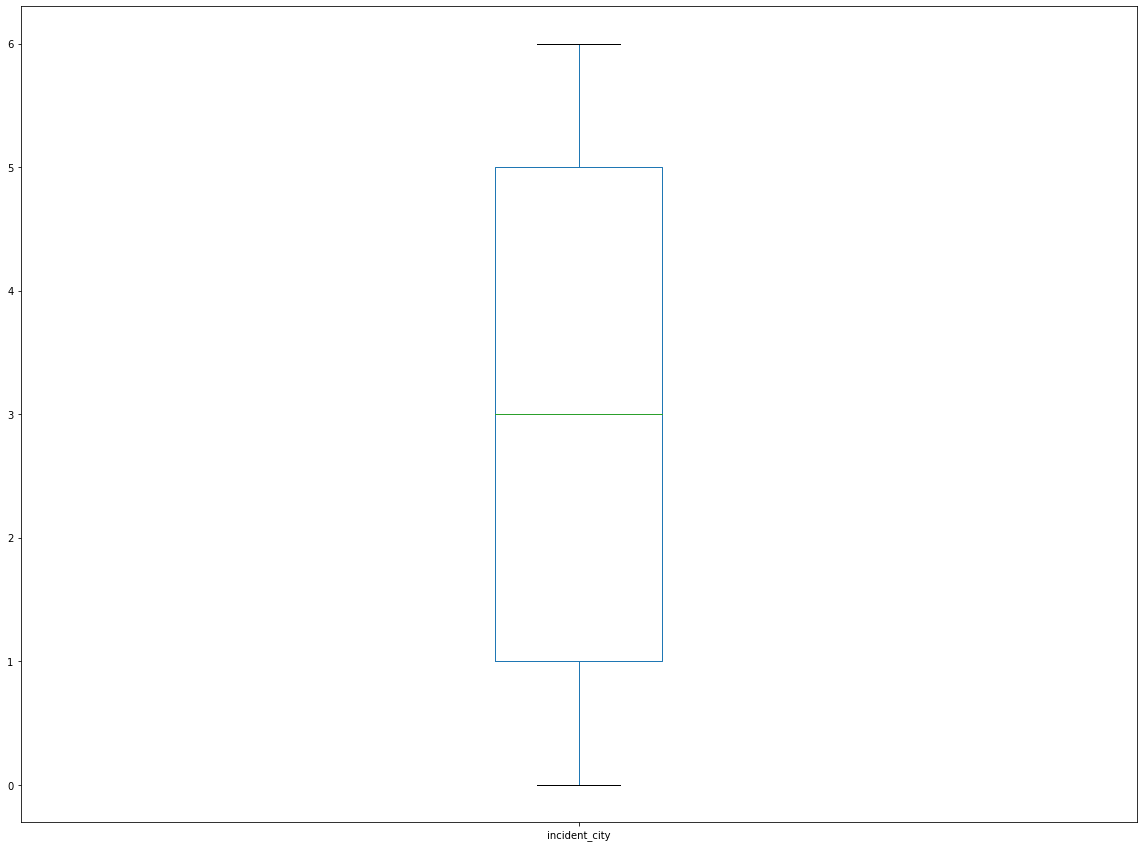

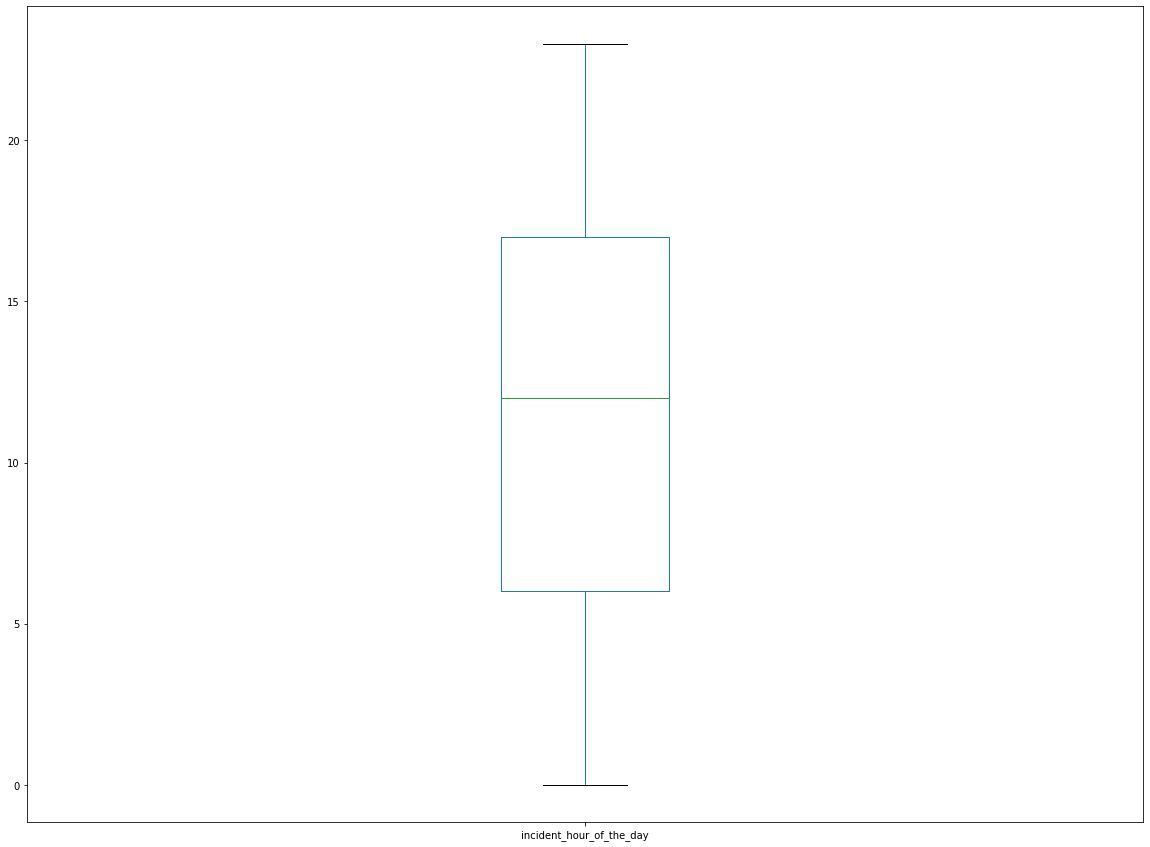

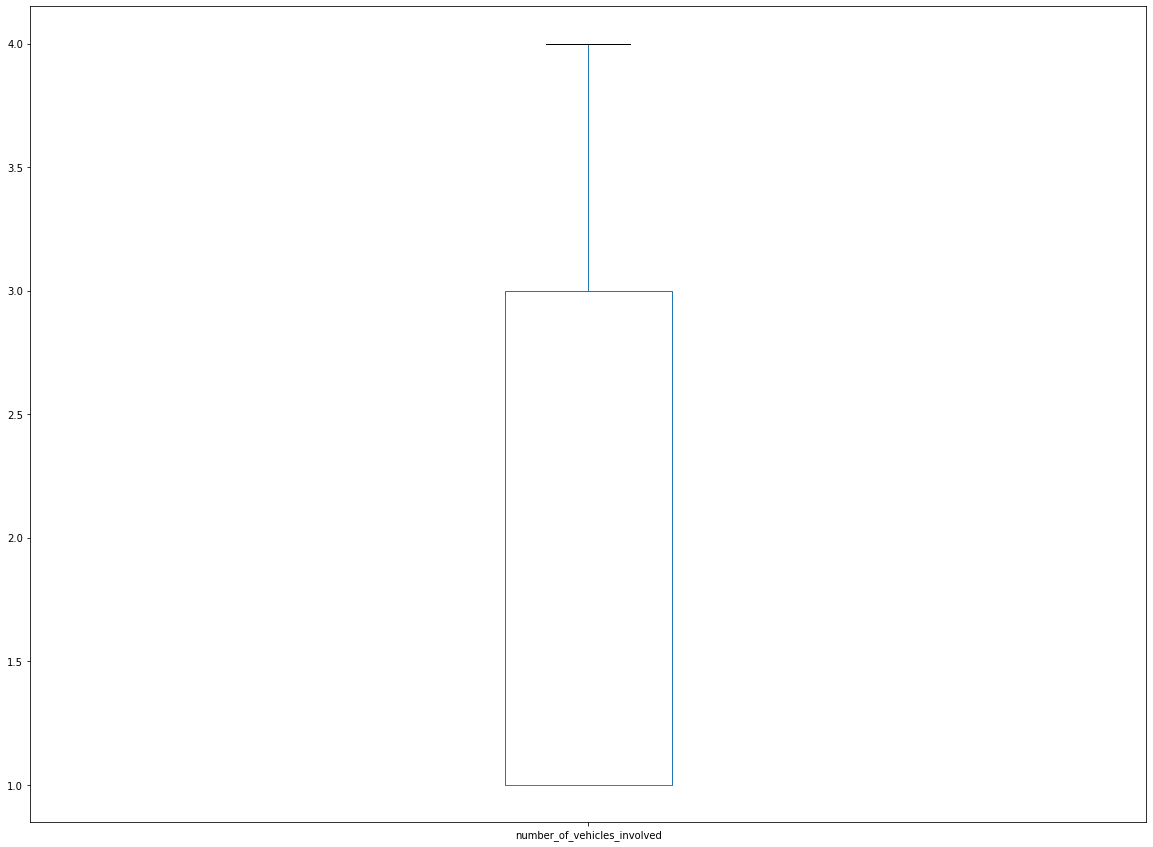

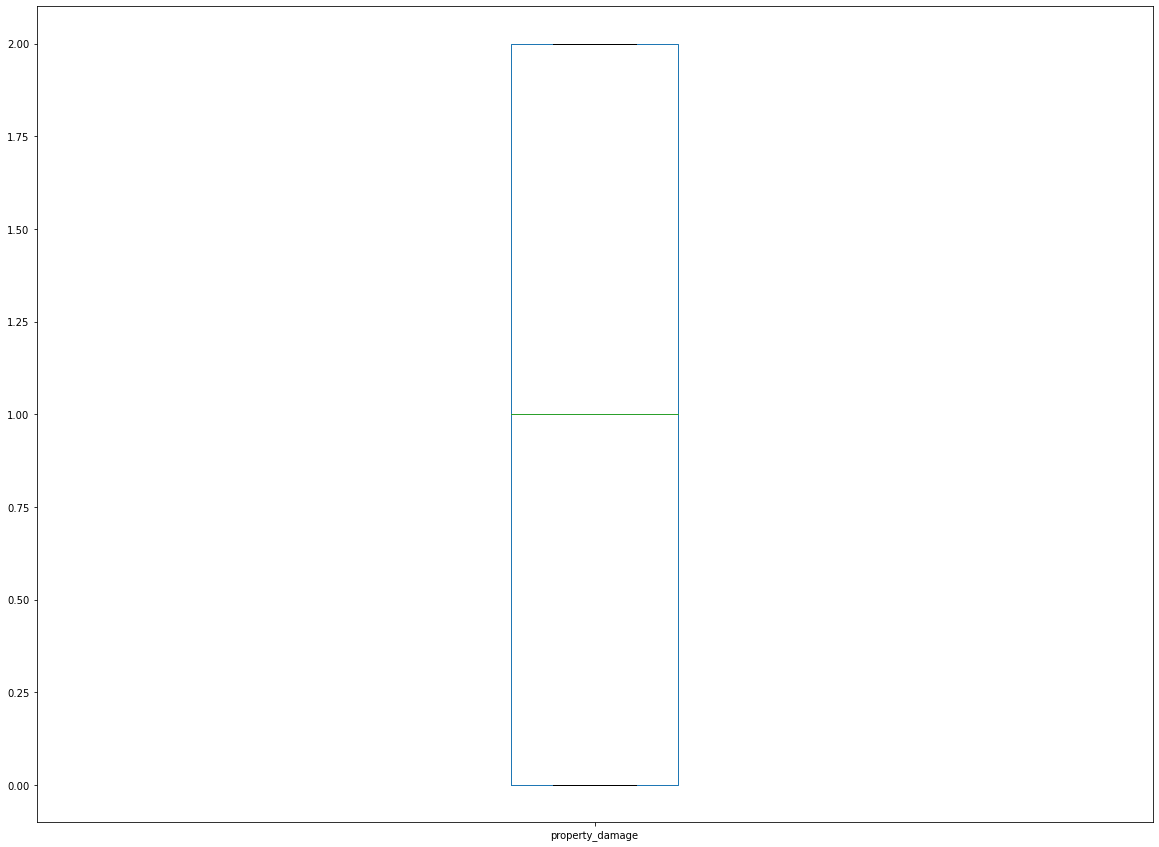

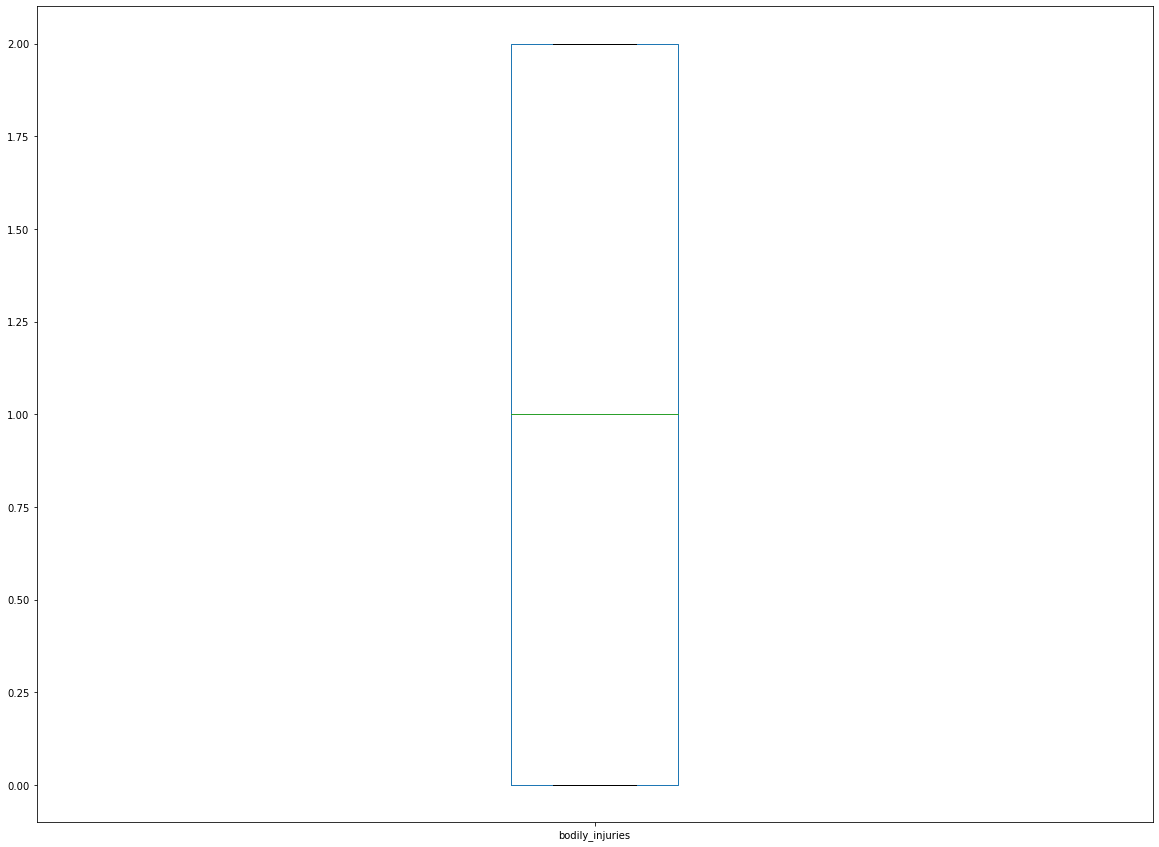

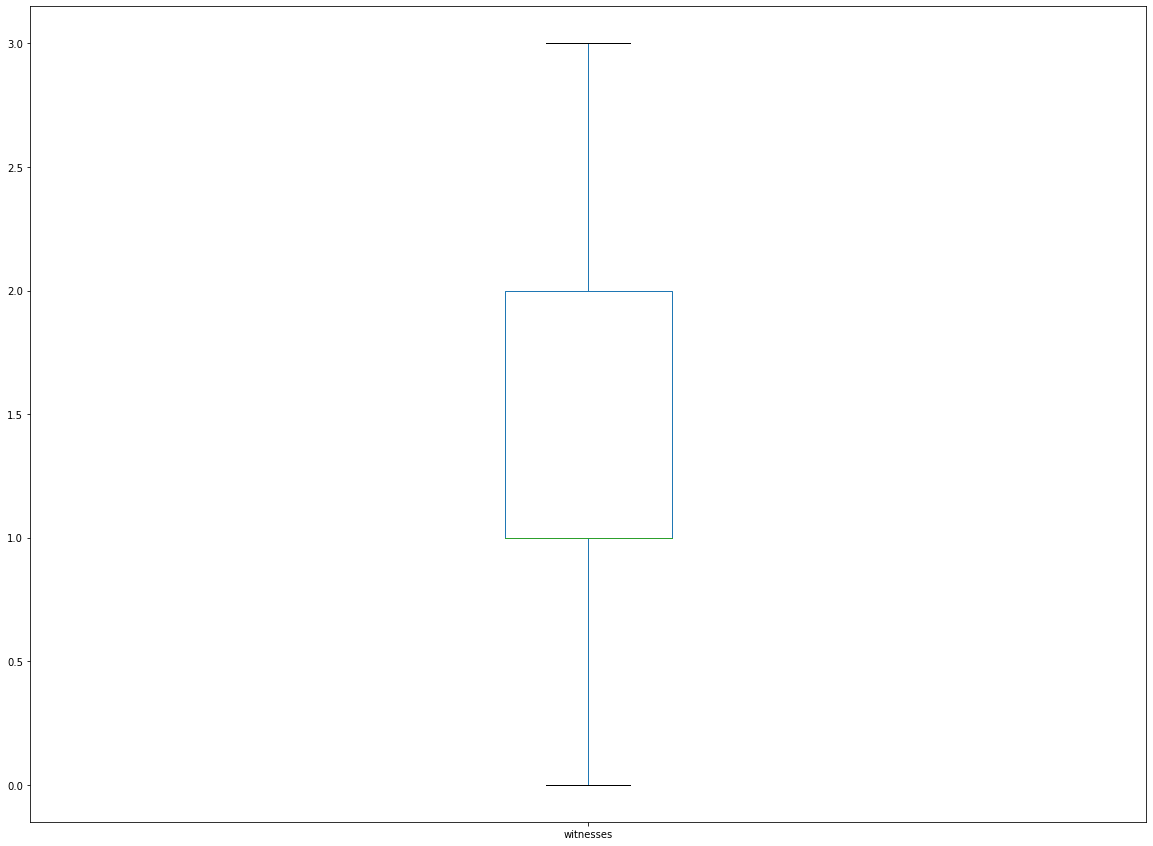

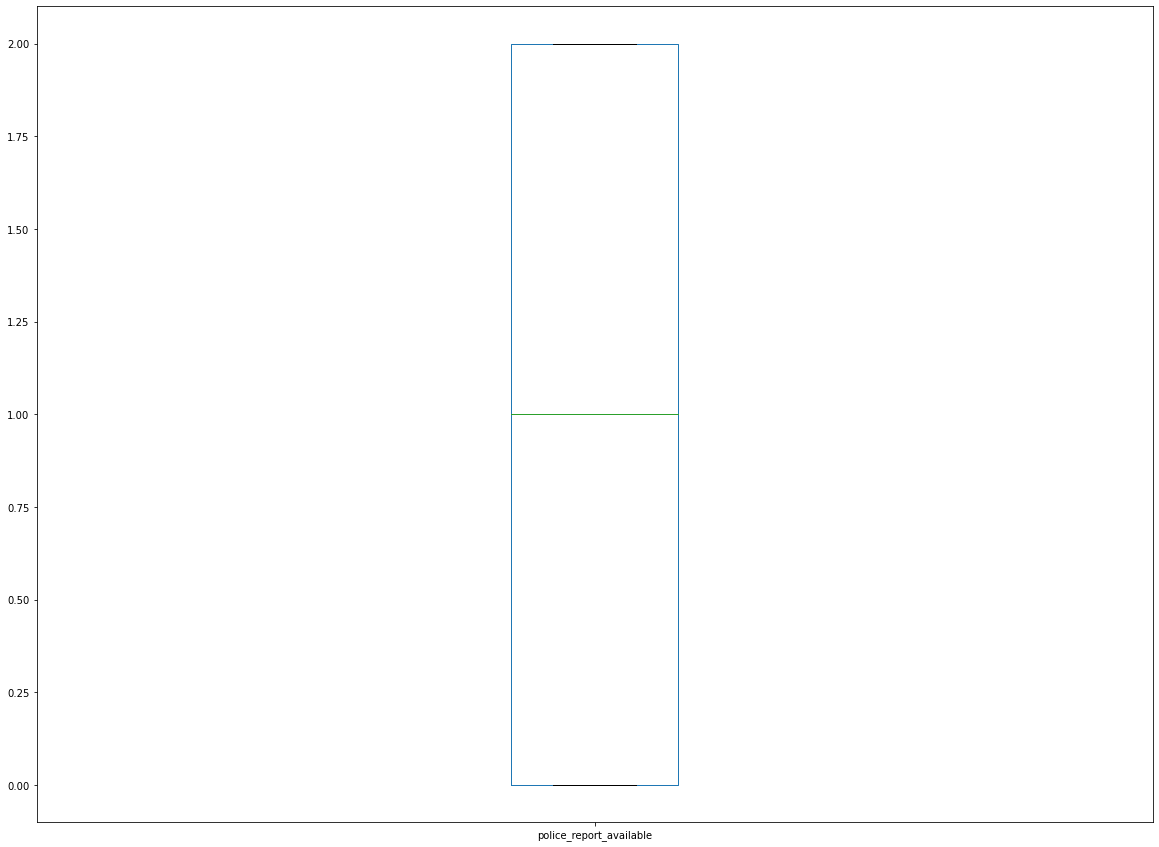

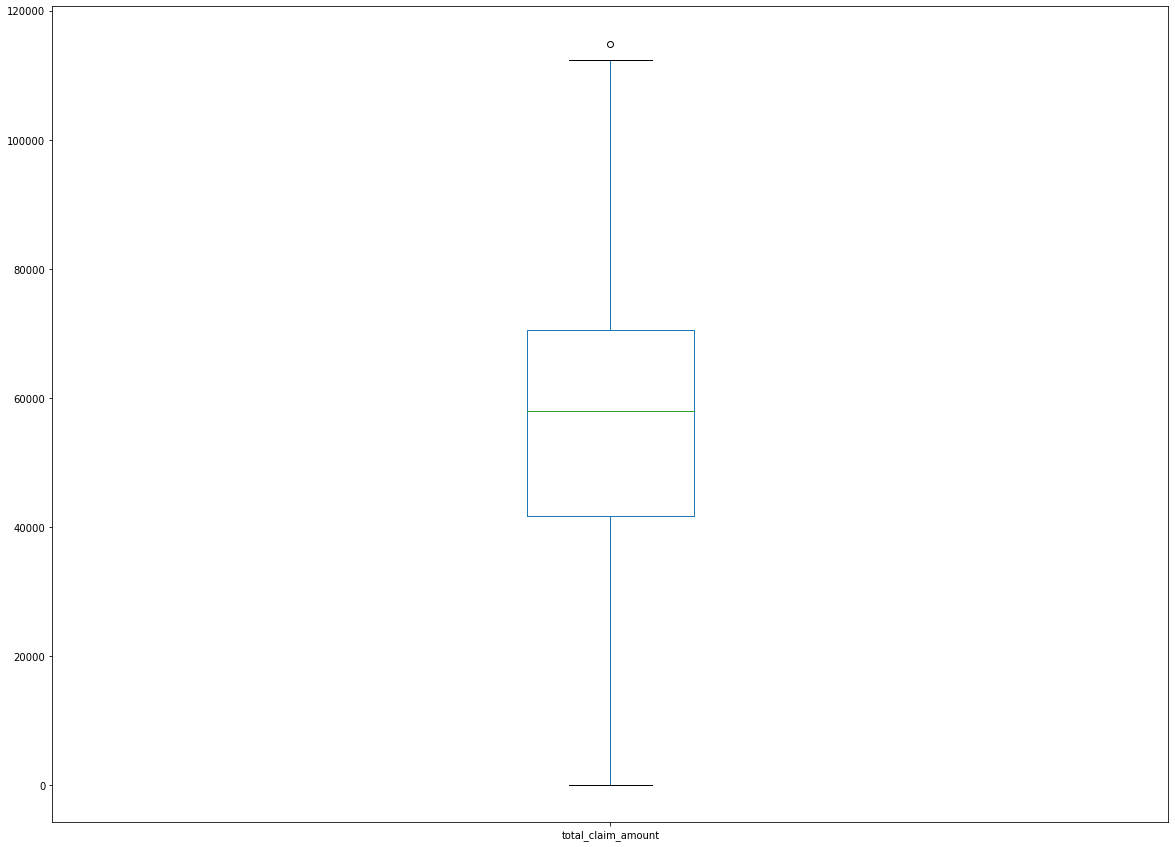

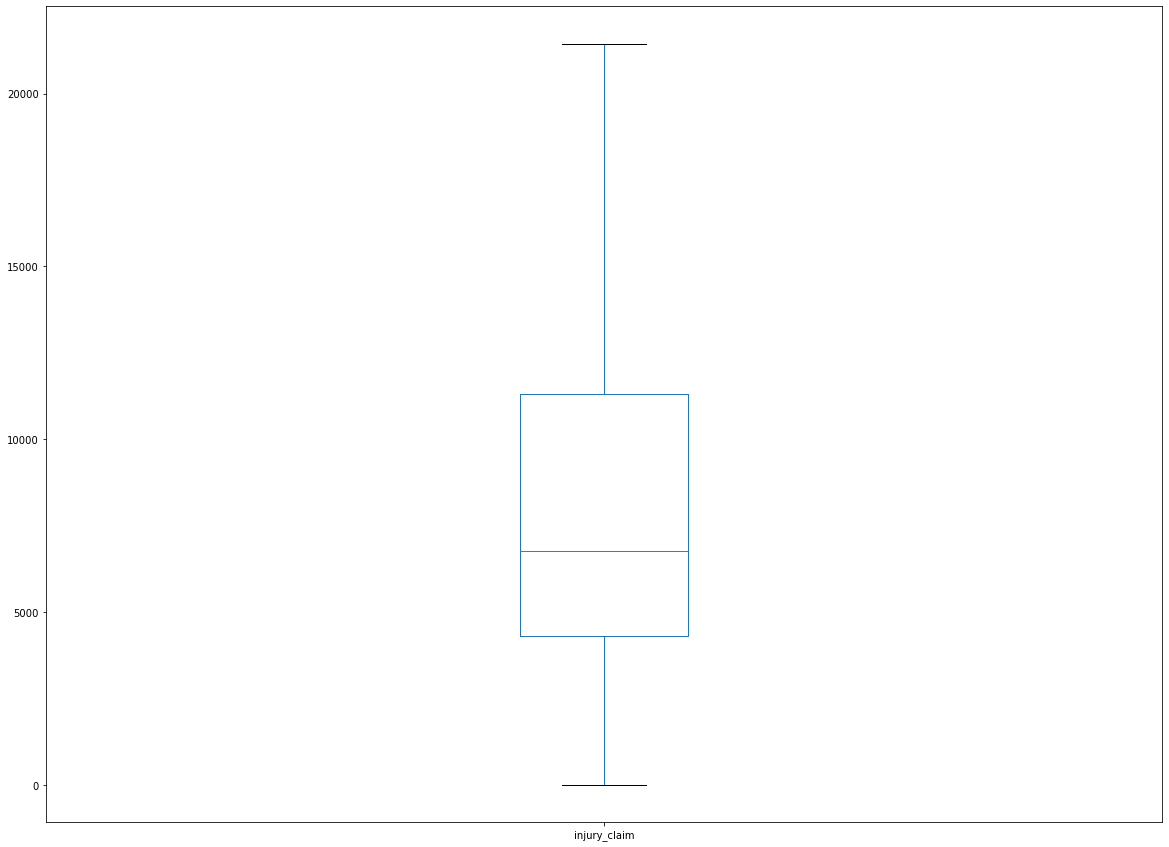

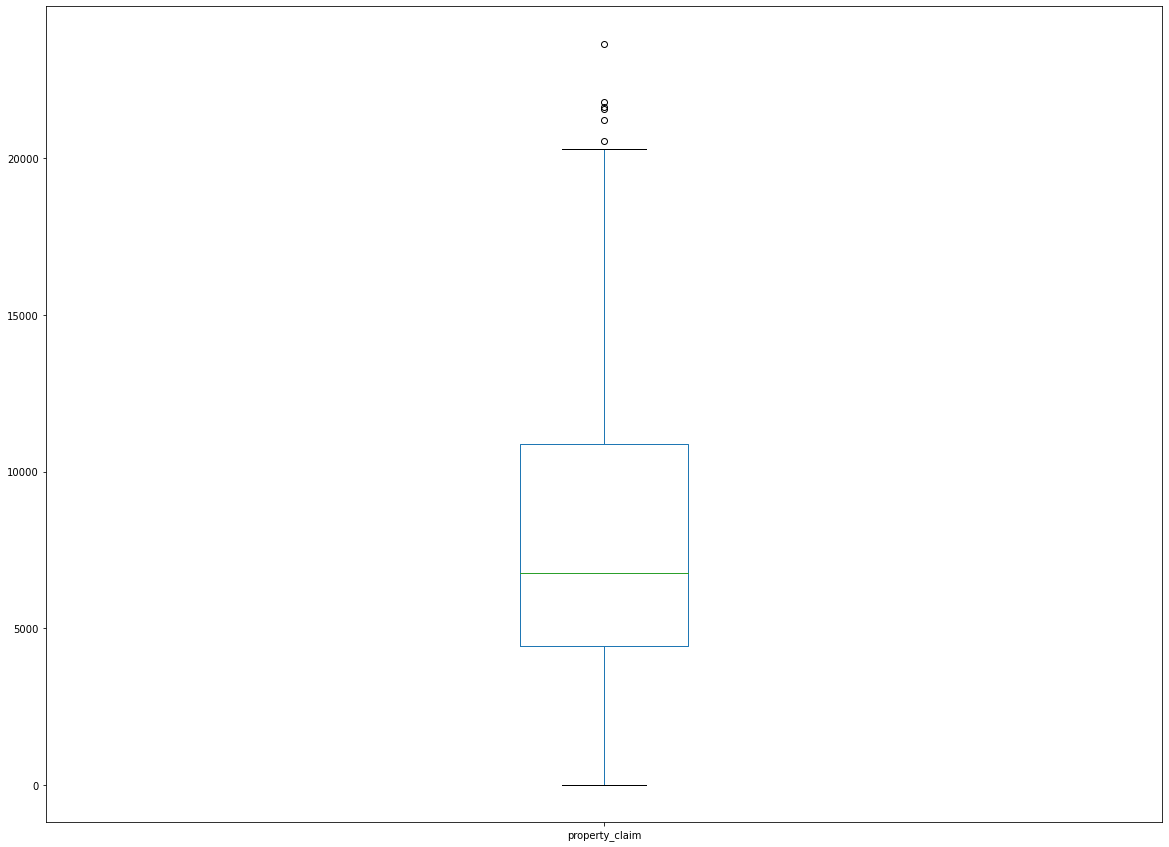

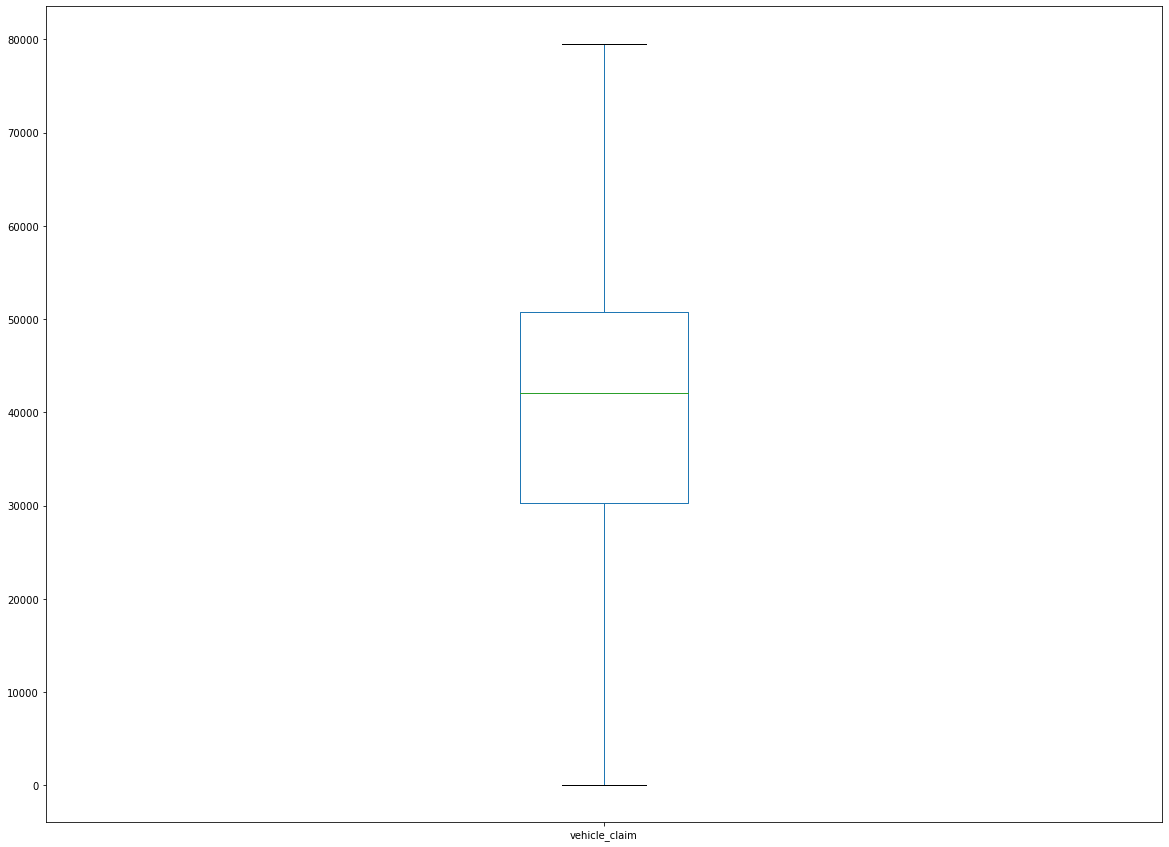

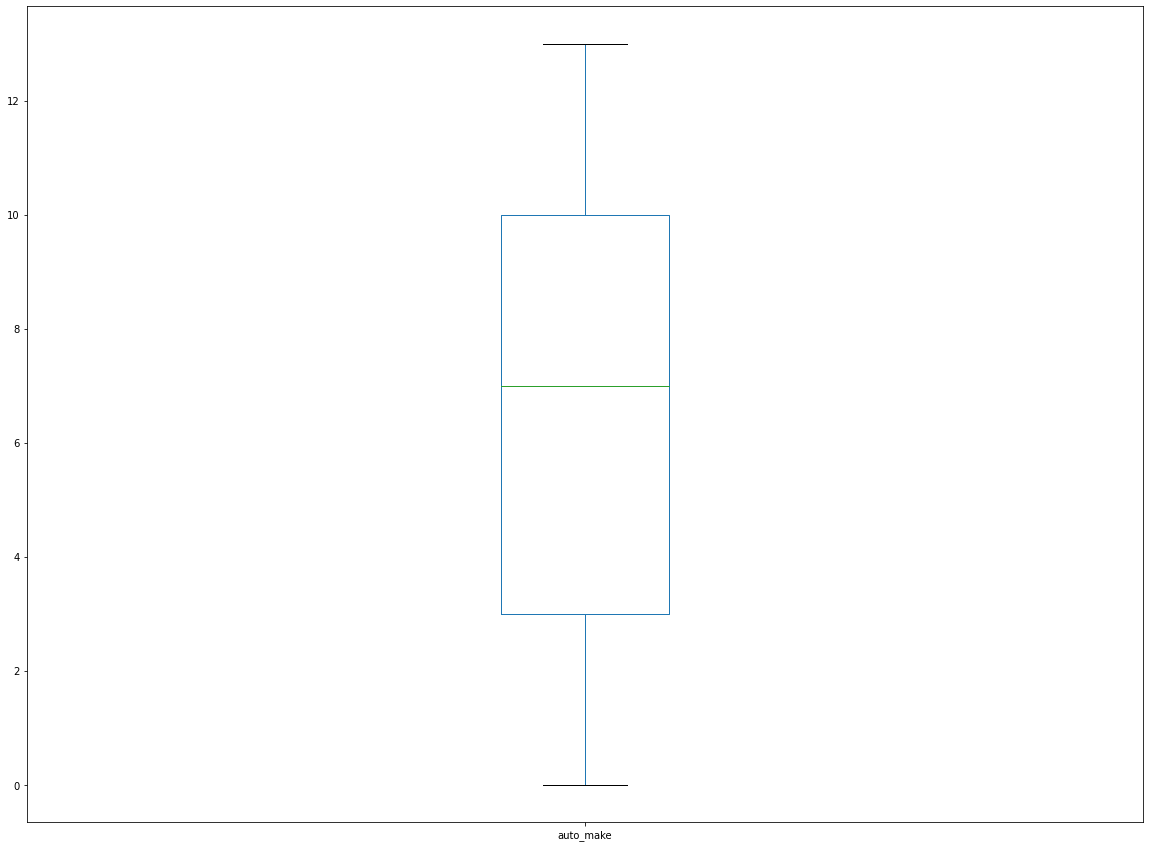

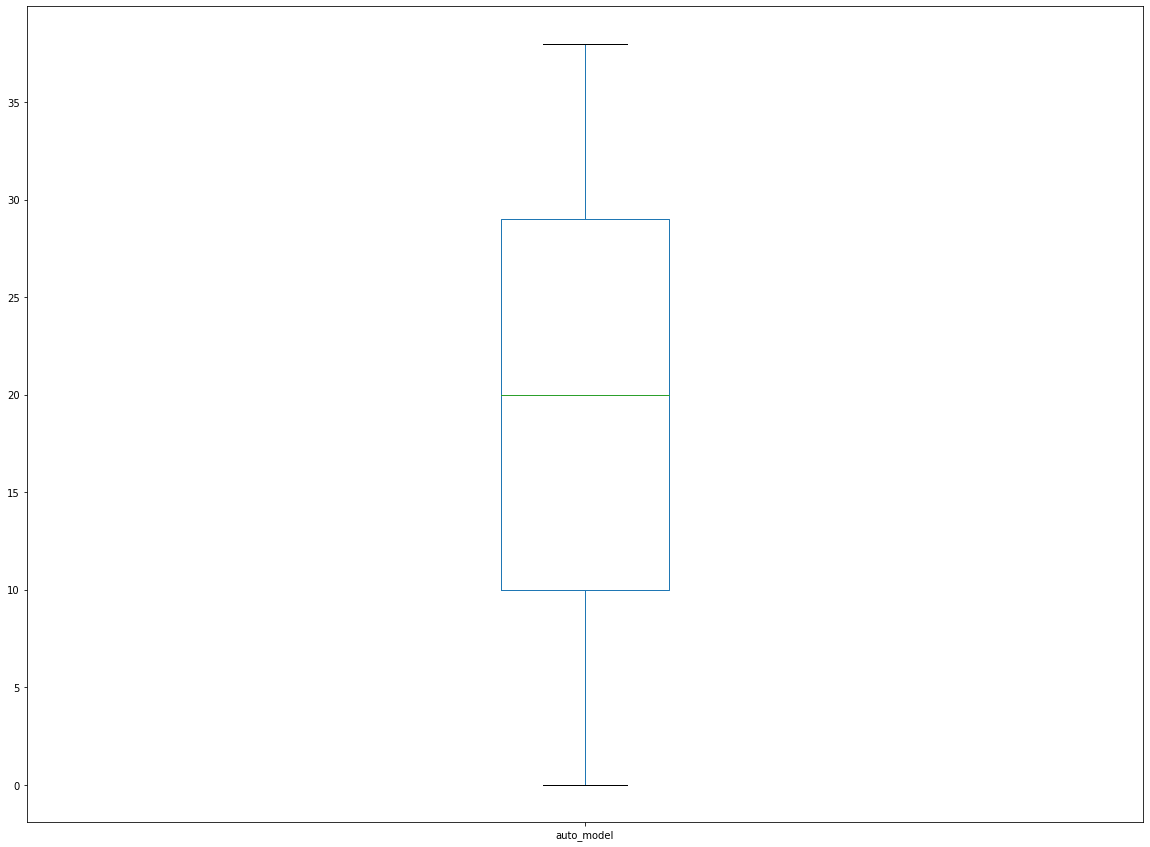

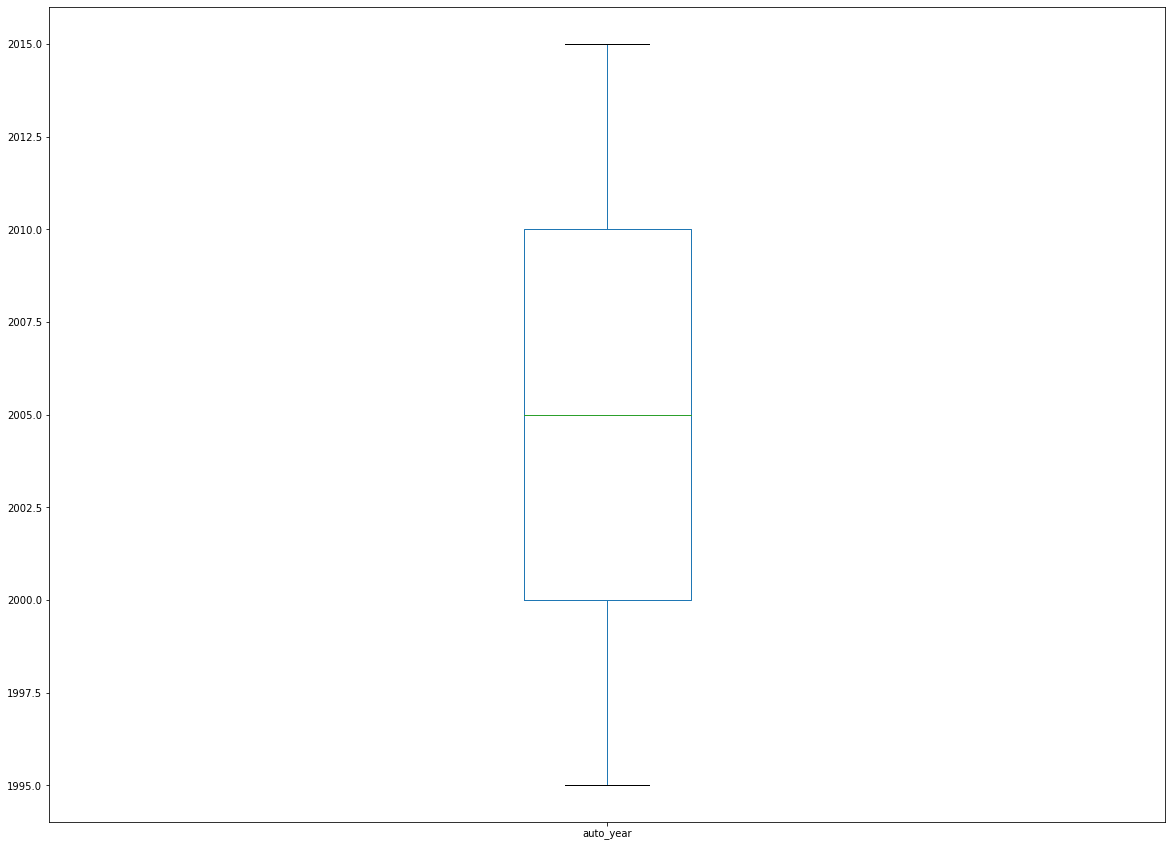

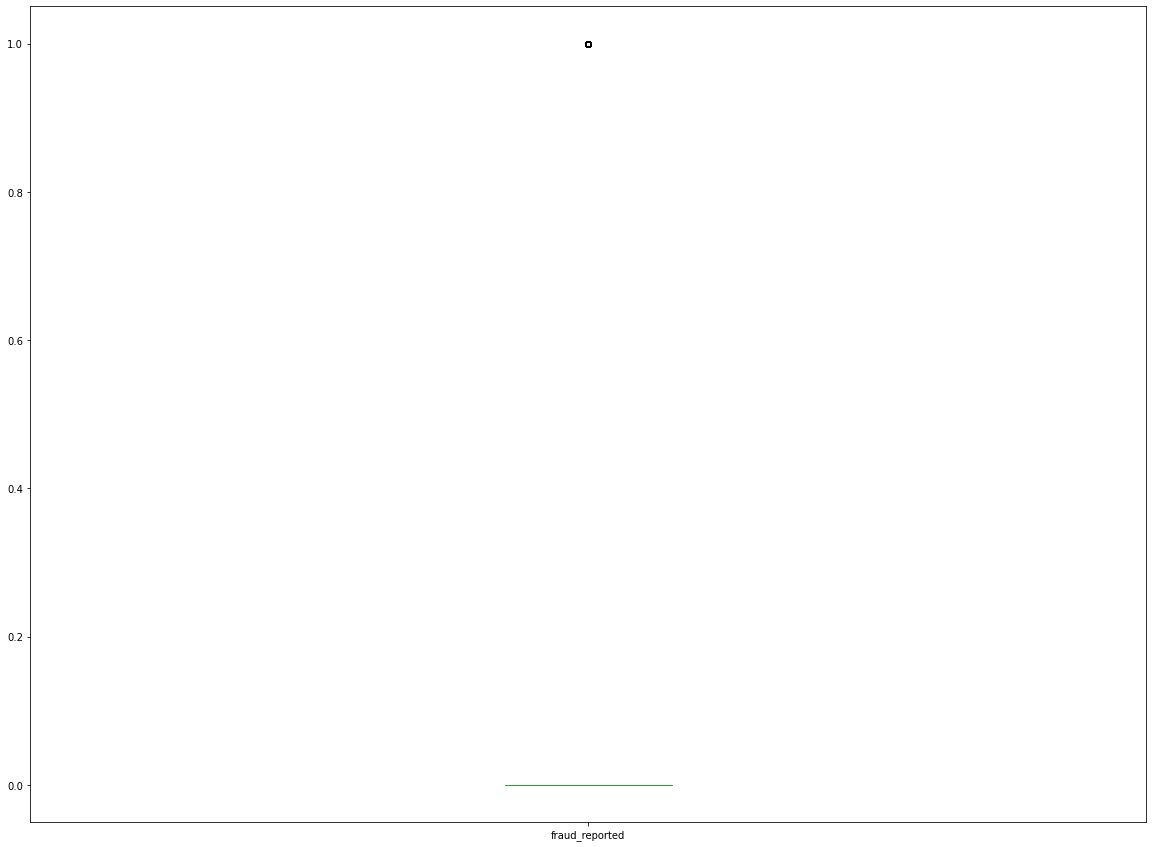

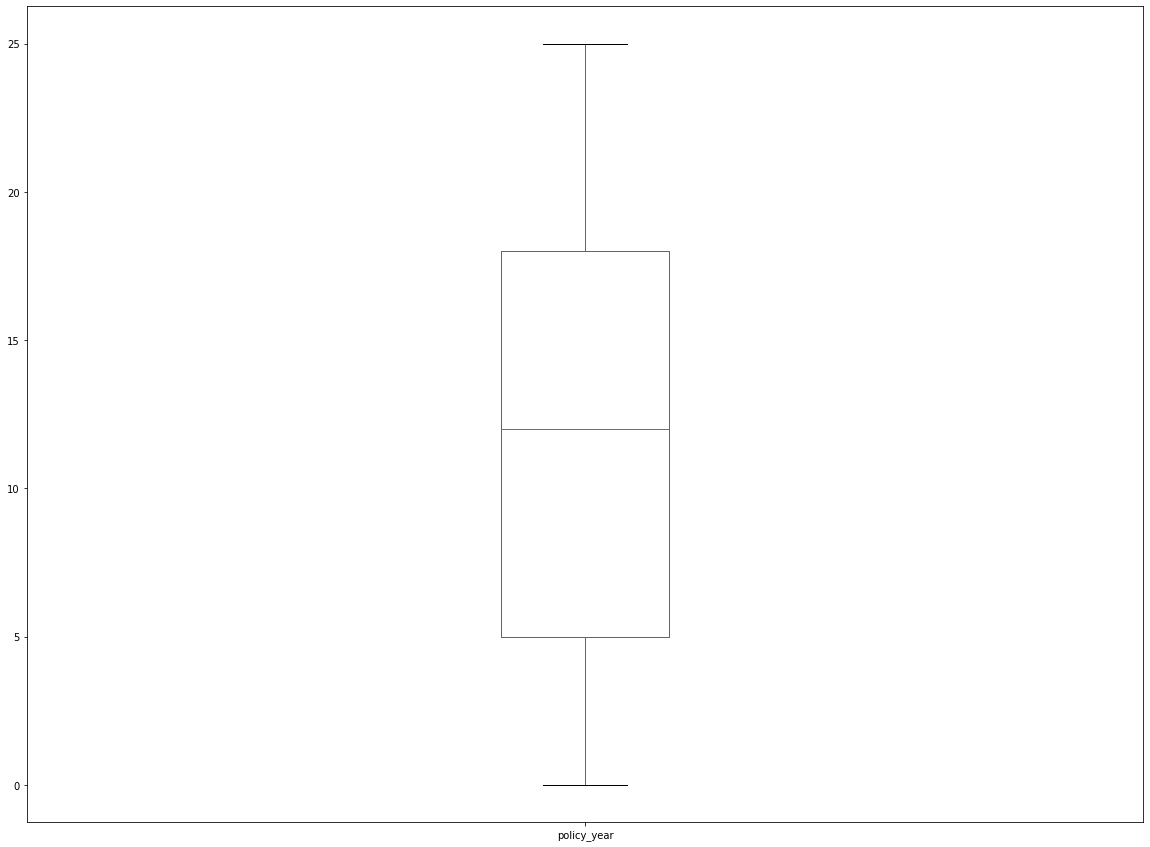

In [86]:
for i in df:
    plt.figure(figsize = (20, 15))
    df[i].plot.box()

# Removing the Outliers

In [33]:
df

months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                   328   48             2           1               1000   
1                   228   42             1           1               2000   
2                   134   29             2           0               2000   
3                   256   41             0           1               2000   
4                   228   44             0           2               1000   
..                  ...  ...           ...         ...                ...   
995                   3   38             2           2               1000   
996                 285   41             0           0               1000   
997                 130   34             2           1                500   
998                 458   62             0           2               2000   
999                 456   60             2           1               1000   

     policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0                  1406.91               0       466132            1   
1                  1197.22         5000000       468176            1   
2                  1413.14         5000000       430632            0   
3                  1415.74         6000000       608117            0   
4                  1583.91         6000000       610706            1   
..                     ...             ...          ...          ...   
995                1310.80               0       431289            0   
996                1436.79               0       608177            0   
997                1383.49         3000000       442797            0   
998                1356.92         5000000       441714            1   
999                 766.19               0       612260            0   

     insured_education_level  ...  police_report_available  \
0                          4  ...                        2   
1                          4  ...                        1   
2                          6  ...                        0   
3                          6  ...                        0   
4                          0  ...                        0   
..                       ...  ...                      ...   
995                        5  ...                        1   
996                        6  ...                        1   
997                        5  ...                        2   
998                        0  ...                        2   
999                        0  ...                        1   

     total_claim_amount  injury_claim  property_claim  vehicle_claim  \
0                 71610          6510           13020          52080   
1                  5070           780             780           3510   
2                 34650          7700            3850          23100   
3                 63400          6340            6340          50720   
4                  6500          1300             650           4550   
..                  ...           ...             ...            ...   
995               87200         17440            8720          61040   
996              108480         18080           18080          72320   
997               67500          7500            7500          52500   
998               46980          5220            5220          36540   
999                5060           460             920           3680   

     auto_make  auto_model  auto_year  fraud_reported  policy_year  
0           10           1       2004               1           24  
1            8          12       2007               1           16  
2            4          30       2007               0           10  
3            3          34       2014               1            0  
4            0          31       2009               0           24  
..         ...         ...        ...             ...          ...  
995          6           6       2006               0            1  
996         13          28       2015               0

In [34]:
df

months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                   328   48             2           1               1000   
1                   228   42             1           1               2000   
2                   134   29             2           0               2000   
3                   256   41             0           1               2000   
4                   228   44             0           2               1000   
..                  ...  ...           ...         ...                ...   
995                   3   38             2           2               1000   
996                 285   41             0           0               1000   
997                 130   34             2           1                500   
998                 458   62             0           2               2000   
999                 456   60             2           1               1000   

     policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0                  1406.91               0       466132            1   
1                  1197.22         5000000       468176            1   
2                  1413.14         5000000       430632            0   
3                  1415.74         6000000       608117            0   
4                  1583.91         6000000       610706            1   
..                     ...             ...          ...          ...   
995                1310.80               0       431289            0   
996                1436.79               0       608177            0   
997                1383.49         3000000       442797            0   
998                1356.92         5000000       441714            1   
999                 766.19               0       612260            0   

     insured_education_level  ...  police_report_available  \
0                          4  ...                        2   
1                          4  ...                        1   
2                          6  ...                        0   
3                          6  ...                        0   
4                          0  ...                        0   
..                       ...  ...                      ...   
995                        5  ...                        1   
996                        6  ...                        1   
997                        5  ...                        2   
998                        0  ...                        2   
999                        0  ...                        1   

     total_claim_amount  injury_claim  property_claim  vehicle_claim  \
0                 71610          6510           13020          52080   
1                  5070           780             780           3510   
2                 34650          7700            3850          23100   
3                 63400          6340            6340          50720   
4                  6500          1300             650           4550   
..                  ...           ...             ...            ...   
995               87200         17440            8720          61040   
996              108480         18080           18080          72320   
997               67500          7500            7500          52500   
998               46980          5220            5220          36540   
999                5060           460             920           3680   

     auto_make  auto_model  auto_year  fraud_reported  policy_year  
0           10           1       2004               1           24  
1            8          12       2007               1           16  
2            4          30       2007               0           10  
3            3          34       2014               1            0  
4            0          31       2009               0           24  
..         ...         ...        ...             ...          ...  
995          6           6       2006               0            1  
996         13          28       2015               0

In [35]:
from scipy.stats import zscore

feature = df
z=np.abs(zscore(feature))

z

array([[1.07813958, 0.99083647, 1.18717314, ..., 0.1834404 , 1.74601919,
        1.68499231],
       [0.2089946 , 0.33407345, 0.01685641, ..., 0.31549088, 1.74601919,
        0.59754971],
       [0.60800168, 1.08891308, 1.18717314, ..., 0.31549088, 0.57273139,
        0.21803224],
       ...,
       [0.64276748, 0.54161057, 1.18717314, ..., 1.5139238 , 0.57273139,
        0.18975873],
       [2.20802805, 2.52328351, 1.22088596, ..., 1.18130295, 0.57273139,
        1.27720133],
       [2.19064515, 2.3043625 , 1.18717314, ..., 0.31549088, 0.57273139,
        0.76175354]])

In [36]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                   328   48             2           1               1000   
1                   228   42             1           1               2000   
2                   134   29             2           0               2000   
3                   256   41             0           1               2000   
4                   228   44             0           2               1000   
..                  ...  ...           ...         ...                ...   
995                   3   38             2           2               1000   
996                 285   41             0           0               1000   
997                 130   34             2           1                500   
998                 458   62             0           2               2000   
999                 456   60             2           1               1000   

     policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0                  1406.91               0       466132            1   
1                  1197.22         5000000       468176            1   
2                  1413.14         5000000       430632            0   
3                  1415.74         6000000       608117            0   
4                  1583.91         6000000       610706            1   
..                     ...             ...          ...          ...   
995                1310.80               0       431289            0   
996                1436.79               0       608177            0   
997                1383.49         3000000       442797            0   
998                1356.92         5000000       441714            1   
999                 766.19               0       612260            0   

     insured_education_level  ...  police_report_available  \
0                          4  ...                        2   
1                          4  ...                        1   
2                          6  ...                        0   
3                          6  ...                        0   
4                          0  ...                        0   
..                       ...  ...                      ...   
995                        5  ...                        1   
996                        6  ...                        1   
997                        5  ...                        2   
998                        0  ...                        2   
999                        0  ...                        1   

     total_claim_amount  injury_claim  property_claim  vehicle_claim  \
0                 71610          6510           13020          52080   
1                  5070           780             780           3510   
2                 34650          7700            3850          23100   
3                 63400          6340            6340          50720   
4                  6500          1300             650           4550   
..                  ...           ...             ...            ...   
995               87200         17440            8720          61040   
996              108480         18080           18080          72320   
997               67500          7500            7500          52500   
998               46980          5220            5220          36540   
999                5060           460             920           3680   

     auto_make  auto_model  auto_year  fraud_reported  policy_year  
0           10           1       2004               1           24  
1            8          12       2007               1           16  
2            4          30       2007               0           10  
3            3          34       2014               1            0  
4            0          31       2009               0           24  
..         ...         ...        ...             ...          ...  
995          6           6       2006               0            1  
996         13          28       2015               0

In [38]:
print(df.shape)

#df dataframe without outliers
print(new_df.shape)

(1000, 36)
(980, 36)


In [40]:
new_df

months_as_customer  age  policy_state  policy_csl  policy_deductable  \
0                   328   48             2           1               1000   
1                   228   42             1           1               2000   
2                   134   29             2           0               2000   
3                   256   41             0           1               2000   
4                   228   44             0           2               1000   
..                  ...  ...           ...         ...                ...   
995                   3   38             2           2               1000   
996                 285   41             0           0               1000   
997                 130   34             2           1                500   
998                 458   62             0           2               2000   
999                 456   60             2           1               1000   

     policy_annual_premium  umbrella_limit  insured_zip  insured_sex  \
0                  1406.91               0       466132            1   
1                  1197.22         5000000       468176            1   
2                  1413.14         5000000       430632            0   
3                  1415.74         6000000       608117            0   
4                  1583.91         6000000       610706            1   
..                     ...             ...          ...          ...   
995                1310.80               0       431289            0   
996                1436.79               0       608177            0   
997                1383.49         3000000       442797            0   
998                1356.92         5000000       441714            1   
999                 766.19               0       612260            0   

     insured_education_level  ...  police_report_available  \
0                          4  ...                        2   
1                          4  ...                        1   
2                          6  ...                        0   
3                          6  ...                        0   
4                          0  ...                        0   
..                       ...  ...                      ...   
995                        5  ...                        1   
996                        6  ...                        1   
997                        5  ...                        2   
998                        0  ...                        2   
999                        0  ...                        1   

     total_claim_amount  injury_claim  property_claim  vehicle_claim  \
0                 71610          6510           13020          52080   
1                  5070           780             780           3510   
2                 34650          7700            3850          23100   
3                 63400          6340            6340          50720   
4                  6500          1300             650           4550   
..                  ...           ...             ...            ...   
995               87200         17440            8720          61040   
996              108480         18080           18080          72320   
997               67500          7500            7500          52500   
998               46980          5220            5220          36540   
999                5060           460             920           3680   

     auto_make  auto_model  auto_year  fraud_reported  policy_year  
0           10           1       2004               1           24  
1            8          12       2007               1           16  
2            4          30       2007               0           10  
3            3          34       2014               1            0  
4            0          31       2009               0           24  
..         ...         ...        ...             ...          ...  
995          6           6       2006               0            1  
996         13          28       2015               0

In [41]:
loss_percent=((1000-980)/1000)*100
loss_percent

2.0

2% Data Loss is acceptable

# Checking for the Skewness

In [43]:
new_df.skew().sort_values()

vehicle_claim                 -0.620936
total_claim_amount            -0.593593
capital-loss                  -0.376884
incident_state                -0.149255
authorities_contacted         -0.114044
auto_model                    -0.073462
insured_hobbies               -0.061488
insured_occupation            -0.055360
auto_year                     -0.054522
incident_hour_of_the_day      -0.039280
policy_state                  -0.038157
collision_type                -0.032778
auto_make                     -0.028739
bodily_injuries                0.003757
insured_education_level        0.006286
witnesses                      0.026211
policy_annual_premium          0.035964
incident_city                  0.043882
police_report_available        0.054188
property_damage                0.058818
policy_year                    0.065022
insured_relationship           0.078339
incident_type                  0.090563
policy_csl                     0.098248
insured_sex                    0.139324


In [44]:
new_df.dtypes

months_as_customer               int64
age                              int64
policy_state                     int32
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                  int32
bodily_injuries                  int64
witnesses                

# Seperating the X and Y variables

In [45]:
x = new_df.drop(['fraud_reported'],axis=1)
y = new_df['fraud_reported']

In [46]:
x.shape

(980, 35)

In [47]:
y.shape

(980,)

# Train and test Splitting

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [49]:
print("Length of Training Data: {}".format(len(x_train)))
print("Length of Testing Data: {}".format(len(x_test)))

Length of Training Data: 784
Length of Testing Data: 196


# Model Building

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    rf = RandomForestClassifier()
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8333333333333334  on Random_state  63


# Logistic Regression Model

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score


lr = LogisticRegression()
lr.fit(x_train,y_train)

# Prediction
predlr = lr.predict(x_test)

print(accuracy_score(y_test, predlr))
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test,predlr))

0.7857142857142857
[[231   1]
 [ 62   0]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       232
           1       0.00      0.00      0.00        62

    accuracy                           0.79       294
   macro avg       0.39      0.50      0.44       294
weighted avg       0.62      0.79      0.69       294



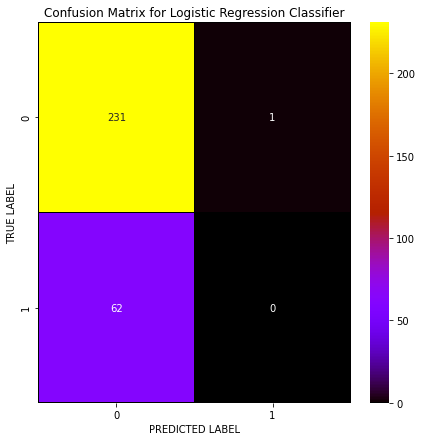

In [53]:
# Confusion matrix for Logistic Regression
cm = confusion_matrix(y_test,predlr)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sn.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

# Random Forest Classifier Model

In [54]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)

# Prediction
predrf = rf.predict(x_test)

print(accuracy_score(y_test, predrf))
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))

0.7925170068027211
[[215  17]
 [ 44  18]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       232
           1       0.51      0.29      0.37        62

    accuracy                           0.79       294
   macro avg       0.67      0.61      0.62       294
weighted avg       0.76      0.79      0.77       294



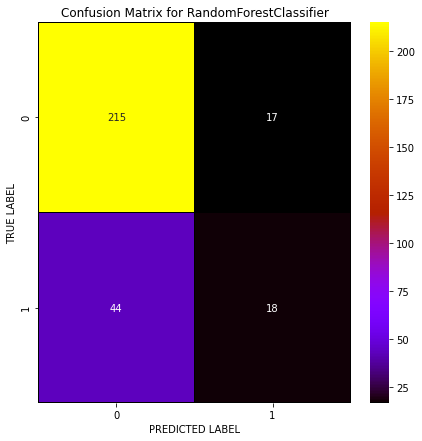

In [55]:
# Confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_test,predrf)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sn.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

# AdaBoost Classifier Model

In [56]:

# Checking accuracy for AdaBoost Classifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier

abc = AdaBoostClassifier()
abc.fit(x_train,y_train)

# Prediction
predabc = abc.predict(x_test)

print(accuracy_score(y_test, predabc))
print(confusion_matrix(y_test, predabc))
print(classification_report(y_test,predabc))

0.8435374149659864
[[213  19]
 [ 27  35]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       232
           1       0.65      0.56      0.60        62

    accuracy                           0.84       294
   macro avg       0.77      0.74      0.75       294
weighted avg       0.84      0.84      0.84       294



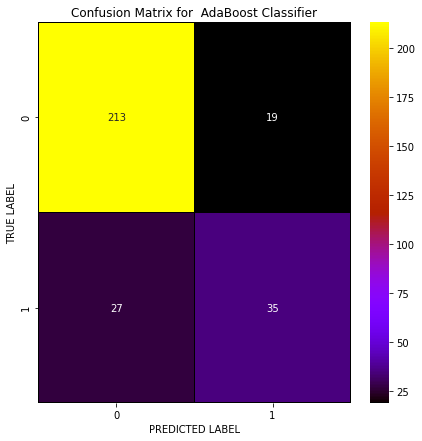

In [58]:
# Confusion matrix for  AdaBoost Classifier
cm = confusion_matrix(y_test,predabc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sn.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  AdaBoost Classifier')
plt.show()

# Gradient Boosting Classifier Model

In [59]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)

# Prediction
predgb = gb.predict(x_test)

print(accuracy_score(y_test, predgb))
print(confusion_matrix(y_test, predgb))
print(classification_report(y_test,predgb))

0.8571428571428571
[[206  26]
 [ 16  46]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       232
           1       0.64      0.74      0.69        62

    accuracy                           0.86       294
   macro avg       0.78      0.81      0.80       294
weighted avg       0.87      0.86      0.86       294



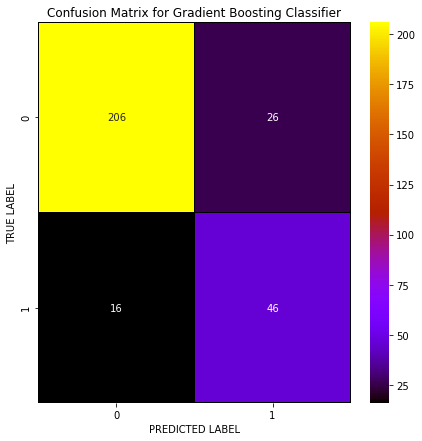

In [61]:
# Confusion matrix for Gradient Boosting Classifier
cm = confusion_matrix(y_test,predgb)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sn.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

# Cross Validation

In [63]:
from sklearn.model_selection import cross_val_score

# cv score for Logistic Regression
print('Logistic Regression:',cross_val_score(lr,x,y,cv=5).mean())

# cv score for Random Forest Classifier
print('Random Forest Classifier:',cross_val_score(rf,x,y,cv=5).mean())

# cv score for AdaBoosting Classifier
print('AdaBoosting Classifier:',cross_val_score(abc,x,y,cv=5).mean())

# cv score for Gradient Boosting Classifier
print('Gradient Boosting Classifier:',cross_val_score(gb,x,y,cv=5).mean())

Logistic Regression: 0.7540816326530612
Random Forest Classifier: 0.7693877551020407
AdaBoosting Classifier: 0.7908163265306123
Gradient Boosting Classifier: 0.8193877551020409


Thus we got the Gradient Boosting Classifier has highest Accuracy of 81.9%

# Hyper Parameter Tuning

In [64]:
# Gradient Boosting Classifier
parameters = {'criterion' : ['gini','entropy'],
              'random_state' : [10, 50, 1000],
              'max_depth' : [0, 10, 20],
              'n_jobs' : [-2, -1, 1],
              'n_estimators' : [50,100, 200, 300]}

In [65]:
from sklearn.model_selection import GridSearchCV

GCV=GridSearchCV(GradientBoostingClassifier(),parameters,cv=5)

In [ ]:
GCV.fit(x_train,y_train)

In [ ]:
GCV.best_params_

In [76]:
fraud_reported=RandomForestClassifier(criterion='gini', max_depth=20, n_estimators=200, n_jobs=-2, random_state=1000)
fraud_reported.fit(x_train, y_train)
pred = fraud_reported.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

80.95238095238095


# ROC-AUC Curve

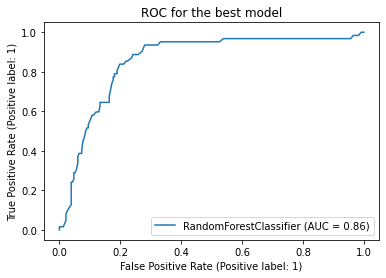

In [77]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(fraud_reported, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

# Saving the Best Model

In [79]:
import joblib
joblib.dump(fraud_reported,"Fraud_Prediction.pkl")

['Fraud_Prediction.pkl']